<a href="https://colab.research.google.com/github/subhashsomarouthu/Customer_Churn_Prediction/blob/main/ML_Assignment2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Customer Churn Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Group


# **Project Summary -**

# **Problem Statement**


The objective of this project is to predict whether a customer will churn (i.e., stop using the service) based on various features in the dataset. This prediction will help the business in understanding customer behavior, thereby allowing them to take proactive measures to reduce churn rates and improve customer retention.

### Import Libraries

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt#For visualizations
import itertools
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler, MinMaxScaler#for Scalling feature datas
from sklearn.impute import KNNImputer, SimpleImputer#for handling missing data

# Importing libraries for modelling and evaluation
from pandas.plotting import parallel_coordinates

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Importing libraries for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split#For train and test dataset splitting
from imblearn.over_sampling import SMOTE #for oversampling in case of class imbalance
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency

### Dataset Loading

In [ ]:
'''
churn_data_bank_df_url = 'https://drive.google.com/file/d/1b04fsu-hOPX_4hvHoEtT7R50r0PT_z7O/view?usp=drive_link'

churn_data_bank_df_id = churn_data_bank_df_url.split('/')[-2]
churn_data_dwnld_url = 'https://drive.google.com/uc?export=download&id=' + churn_data_bank_df_id
churn_data_bank_df = pd.read_csv(churn_data_dwnld_url)
churn_data_bank_df'''

"\nchurn_data_bank_df_url = 'https://drive.google.com/file/d/1b04fsu-hOPX_4hvHoEtT7R50r0PT_z7O/view?usp=drive_link'\n\nchurn_data_bank_df_id = churn_data_bank_df_url.split('/')[-2]\nchurn_data_dwnld_url = 'https://drive.google.com/uc?export=download&id=' + churn_data_bank_df_id\nchurn_data_bank_df = pd.read_csv(churn_data_dwnld_url)\nchurn_data_bank_df"

In [ ]:
'''
import io
import pandas as pd
churn_data_bank_df = pd.read_csv(io.BytesIO(file_name['bank_data_train.csv']))
print(churn_data_bank_df.sample(10))
'''

"\nimport io\nimport pandas as pd\nchurn_data_bank_df = pd.read_csv(io.BytesIO(file_name['bank_data_train.csv']))\nprint(churn_data_bank_df.sample(10))\n"

Load your dataset from your system

In [ ]:
# Load Dataset

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load your dataset from your google drive
churn_data_bank_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Loyalist/Machine_learning_Projects_Assignments/Week11_group_assignment2/bank_data_train.csv')
churn_data_bank_df.head()

ID  CR_PROD_CNT_IL  AMOUNT_RUB_CLO_PRC  PRC_ACCEPTS_A_EMAIL_LINK  \
0  146841               0            0.000000                       NaN   
1  146842               0            0.041033                       NaN   
2  146843               0            0.006915                       0.0   
3  146844               0            0.000000                       NaN   
4  146845               0            0.000000                       NaN   

   APP_REGISTR_RGN_CODE  PRC_ACCEPTS_A_POS  PRC_ACCEPTS_A_TK  \
0                   NaN                NaN               NaN   
1                   NaN                NaN               NaN   
2                   NaN                0.0               0.0   
3                   NaN                NaN               NaN   
4                   NaN                NaN               NaN   

   TURNOVER_DYNAMIC_IL_1M  CNT_TRAN_AUT_TENDENCY1M  SUM_TRAN_AUT_TENDENCY1M  \
0                     0.0                      NaN                      NaN   
1                     0.0                 0.166667                 0.186107   
2                     0.0                      NaN                      NaN   
3                     0.0                      NaN                      NaN   
4                     0.0                      NaN                      NaN   

   AMOUNT_RUB_SUP_PRC  PRC_ACCEPTS_A_AMOBILE  SUM_TRAN_AUT_TENDENCY3M  \
0            0.000000                    NaN                      NaN   
1            0.244678                    NaN                 0.670968   
2            0.000000                    0.0                      NaN   
3            0.000000                    NaN                      NaN   
4            0.000000                    NaN                      NaN   

  CLNT_TRUST_RELATION  PRC_ACCEPTS_TK  PRC_ACCEPTS_A_MTP  \
0                 NaN             NaN                NaN   
1                 NaN             NaN                NaN   
2                 NaN             0.0                0.0   
3                 NaN             NaN                NaN   
4                 NaN             NaN                NaN   

   REST_DYNAMIC_FDEP_1M  CNT_TRAN_AUT_TENDENCY3M  CNT_ACCEPTS_TK  \
0                   0.0                      NaN             NaN   
1                   0.0                 0.666667             NaN   
2                   0.0                      NaN             0.0   
3                   0.0                      NaN             NaN   
4                   0.0                      NaN             NaN   

  APP_MARITAL_STATUS  REST_DYNAMIC_SAVE_3M  CR_PROD_CNT_VCU   REST_AVG_CUR  \
0                NaN              0.541683                0  156067.339767   
1                NaN              0.000000                0    4278.845817   
2                NaN              0.000000                0  112837.062817   
3                NaN              0.005874                0   42902.902883   
4                NaN              0.000000                0   71906.476533   

   CNT_TRAN_MED_TENDENCY1M APP_KIND_OF_PROP_HABITATION CLNT_JOB_POSITION_TYPE  \
0                      NaN                         NaN                    NaN   
1                      NaN                         NaN                    NaN   
2                      NaN                         NaN                    NaN   
3                      NaN                         NaN                    NaN   
4                      NaN                         NaN                    NaN   

   AMOUNT_RUB_NAS_PRC     CLNT_JOB_POSITION APP_DRIVING_LICENSE  \
0                 0.0      начальник отдела                 NaN   
1                 0.0                   NaN                 NaN   
2                 0.0  ГЕНЕРАЛЬНЫЙ ДИРЕКТОР                 NaN   
3                 0.0          МЕНЕДЖЕР ИАО                 NaN   
4                 0.0                   NaN                 NaN   

   TRANS_COUNT_SUP_PRC APP_EDUCATION  CNT_TRAN_CLO_TENDENCY1M  \
0             0.000000           NaN                      NaN  

In [ ]:
# To display full rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Dataset First View

In [ ]:

churn_data_bank_df.head()

ID  CR_PROD_CNT_IL  AMOUNT_RUB_CLO_PRC  PRC_ACCEPTS_A_EMAIL_LINK  \
0  146841               0            0.000000                       NaN   
1  146842               0            0.041033                       NaN   
2  146843               0            0.006915                       0.0   
3  146844               0            0.000000                       NaN   
4  146845               0            0.000000                       NaN   

   APP_REGISTR_RGN_CODE  PRC_ACCEPTS_A_POS  PRC_ACCEPTS_A_TK  \
0                   NaN                NaN               NaN   
1                   NaN                NaN               NaN   
2                   NaN                0.0               0.0   
3                   NaN                NaN               NaN   
4                   NaN                NaN               NaN   

   TURNOVER_DYNAMIC_IL_1M  CNT_TRAN_AUT_TENDENCY1M  SUM_TRAN_AUT_TENDENCY1M  \
0                     0.0                      NaN                      NaN   
1                     0.0                 0.166667                 0.186107   
2                     0.0                      NaN                      NaN   
3                     0.0                      NaN                      NaN   
4                     0.0                      NaN                      NaN   

   AMOUNT_RUB_SUP_PRC  PRC_ACCEPTS_A_AMOBILE  SUM_TRAN_AUT_TENDENCY3M  \
0            0.000000                    NaN                      NaN   
1            0.244678                    NaN                 0.670968   
2            0.000000                    0.0                      NaN   
3            0.000000                    NaN                      NaN   
4            0.000000                    NaN                      NaN   

  CLNT_TRUST_RELATION  PRC_ACCEPTS_TK  PRC_ACCEPTS_A_MTP  \
0                 NaN             NaN                NaN   
1                 NaN             NaN                NaN   
2                 NaN             0.0                0.0   
3                 NaN             NaN                NaN   
4                 NaN             NaN                NaN   

   REST_DYNAMIC_FDEP_1M  CNT_TRAN_AUT_TENDENCY3M  CNT_ACCEPTS_TK  \
0                   0.0                      NaN             NaN   
1                   0.0                 0.666667             NaN   
2                   0.0                      NaN             0.0   
3                   0.0                      NaN             NaN   
4                   0.0                      NaN             NaN   

  APP_MARITAL_STATUS  REST_DYNAMIC_SAVE_3M  CR_PROD_CNT_VCU   REST_AVG_CUR  \
0                NaN              0.541683                0  156067.339767   
1                NaN              0.000000                0    4278.845817   
2                NaN              0.000000                0  112837.062817   
3                NaN              0.005874                0   42902.902883   
4                NaN              0.000000                0   71906.476533   

   CNT_TRAN_MED_TENDENCY1M APP_KIND_OF_PROP_HABITATION CLNT_JOB_POSITION_TYPE  \
0                      NaN                         NaN                    NaN   
1                      NaN                         NaN                    NaN   
2                      NaN                         NaN                    NaN   
3                      NaN                         NaN                    NaN   
4                      NaN                         NaN                    NaN   

   AMOUNT_RUB_NAS_PRC     CLNT_JOB_POSITION APP_DRIVING_LICENSE  \
0                 0.0      начальник отдела                 NaN   
1                 0.0                   NaN                 NaN   
2                 0.0  ГЕНЕРАЛЬНЫЙ ДИРЕКТОР                 NaN   
3                 0.0          МЕНЕДЖЕР ИАО                 NaN   
4                 0.0                   NaN                 NaN   

   TRANS_COUNT_SUP_PRC APP_EDUCATION  CNT_TRAN_CLO_TENDENCY1M  \
0             0.000000           NaN                      NaN  

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
churn_data_bank_df.shape

(355190, 116)

In [ ]:
churn_data_bank_df.columns

Index(['ID', 'CR_PROD_CNT_IL', 'AMOUNT_RUB_CLO_PRC',
       'PRC_ACCEPTS_A_EMAIL_LINK', 'APP_REGISTR_RGN_CODE', 'PRC_ACCEPTS_A_POS',
       'PRC_ACCEPTS_A_TK', 'TURNOVER_DYNAMIC_IL_1M', 'CNT_TRAN_AUT_TENDENCY1M',
       'SUM_TRAN_AUT_TENDENCY1M',
       ...
       'REST_DYNAMIC_CC_3M', 'MED_DEBT_PRC_YWZ', 'LDEAL_ACT_DAYS_PCT_TR3',
       'LDEAL_ACT_DAYS_PCT_AAVG', 'LDEAL_DELINQ_PER_MAXYWZ',
       'TURNOVER_DYNAMIC_CC_3M', 'LDEAL_ACT_DAYS_PCT_TR',
       'LDEAL_ACT_DAYS_PCT_TR4', 'LDEAL_ACT_DAYS_PCT_CURR', 'TARGET'],
      dtype='object', length=116)

### Dataset Information

In [ ]:
# Dataset Info
churn_data_bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355190 entries, 0 to 355189
Columns: 116 entries, ID to TARGET
dtypes: float64(94), int64(9), object(13)
memory usage: 314.3+ MB


In [ ]:

# Separating numerical columns (float64 and int64)
numerical_columns = [col for col in churn_data_bank_df.select_dtypes(include=['float64', 'int64']).columns if col != 'TARGET']

#categorical columns (object dtype)
categorical_columns = churn_data_bank_df.select_dtypes(include=['object']).columns

print("Numerical Columns:")
print(numerical_columns)
print("\nCategorical Columns:")
print(categorical_columns)

# numerical and categorical data in separate variables
numerical_data_df = churn_data_bank_df[numerical_columns]
categorical_data_df = churn_data_bank_df[categorical_columns]





Numerical Columns:
['ID', 'CR_PROD_CNT_IL', 'AMOUNT_RUB_CLO_PRC', 'PRC_ACCEPTS_A_EMAIL_LINK', 'APP_REGISTR_RGN_CODE', 'PRC_ACCEPTS_A_POS', 'PRC_ACCEPTS_A_TK', 'TURNOVER_DYNAMIC_IL_1M', 'CNT_TRAN_AUT_TENDENCY1M', 'SUM_TRAN_AUT_TENDENCY1M', 'AMOUNT_RUB_SUP_PRC', 'PRC_ACCEPTS_A_AMOBILE', 'SUM_TRAN_AUT_TENDENCY3M', 'PRC_ACCEPTS_TK', 'PRC_ACCEPTS_A_MTP', 'REST_DYNAMIC_FDEP_1M', 'CNT_TRAN_AUT_TENDENCY3M', 'CNT_ACCEPTS_TK', 'REST_DYNAMIC_SAVE_3M', 'CR_PROD_CNT_VCU', 'REST_AVG_CUR', 'CNT_TRAN_MED_TENDENCY1M', 'AMOUNT_RUB_NAS_PRC', 'TRANS_COUNT_SUP_PRC', 'CNT_TRAN_CLO_TENDENCY1M', 'SUM_TRAN_MED_TENDENCY1M', 'PRC_ACCEPTS_A_ATM', 'PRC_ACCEPTS_MTP', 'TRANS_COUNT_NAS_PRC', 'CNT_ACCEPTS_MTP', 'CR_PROD_CNT_TOVR', 'CR_PROD_CNT_PIL', 'SUM_TRAN_CLO_TENDENCY1M', 'TURNOVER_CC', 'TRANS_COUNT_ATM_PRC', 'AMOUNT_RUB_ATM_PRC', 'TURNOVER_PAYM', 'AGE', 'CNT_TRAN_MED_TENDENCY3M', 'CR_PROD_CNT_CC', 'SUM_TRAN_MED_TENDENCY3M', 'REST_DYNAMIC_FDEP_3M', 'REST_DYNAMIC_IL_1M', 'SUM_TRAN_CLO_TENDENCY3M', 'LDEAL_TENOR_MAX'

In [ ]:
# keeping track of columns that can be removed for modeling
columns_that_can_be_removed=['ID']


#### Duplicate Values

In [ ]:
# Duplicate Value Count

len(churn_data_bank_df[churn_data_bank_df.duplicated()])


0

#### Missing Values/Null Values

In [ ]:
# percentage of missing values in categorical columns
missing_percentages_categorical = categorical_data_df.isnull().sum() / len(categorical_data_df) * 100


missing_percentages_df_cat = pd.DataFrame({'Column': categorical_data_df.columns, 'Missing Percentage': missing_percentages_categorical})
missing_percentages_df_cat.sort_values(by='Missing Percentage', ascending=False, inplace=True)


missing_percentages_df_cat[missing_percentages_df_cat['Missing Percentage'] > 0]

Column  Missing Percentage
CLNT_JOB_POSITION_TYPE            CLNT_JOB_POSITION_TYPE           87.392382
APP_CAR                                          APP_CAR           83.880177
APP_DRIVING_LICENSE                  APP_DRIVING_LICENSE           83.879895
APP_TRAVEL_PASS                          APP_TRAVEL_PASS           83.879895
APP_KIND_OF_PROP_HABITATION  APP_KIND_OF_PROP_HABITATION           83.287536
APP_POSITION_TYPE                      APP_POSITION_TYPE           82.954194
APP_EMP_TYPE                                APP_EMP_TYPE           81.034939
APP_COMP_TYPE                              APP_COMP_TYPE           81.034939
APP_EDUCATION                              APP_EDUCATION           80.826037
APP_MARITAL_STATUS                    APP_MARITAL_STATUS           80.789437
CLNT_TRUST_RELATION                  CLNT_TRUST_RELATION           80.455249
CLNT_JOB_POSITION                      CLNT_JOB_POSITION           40.648385

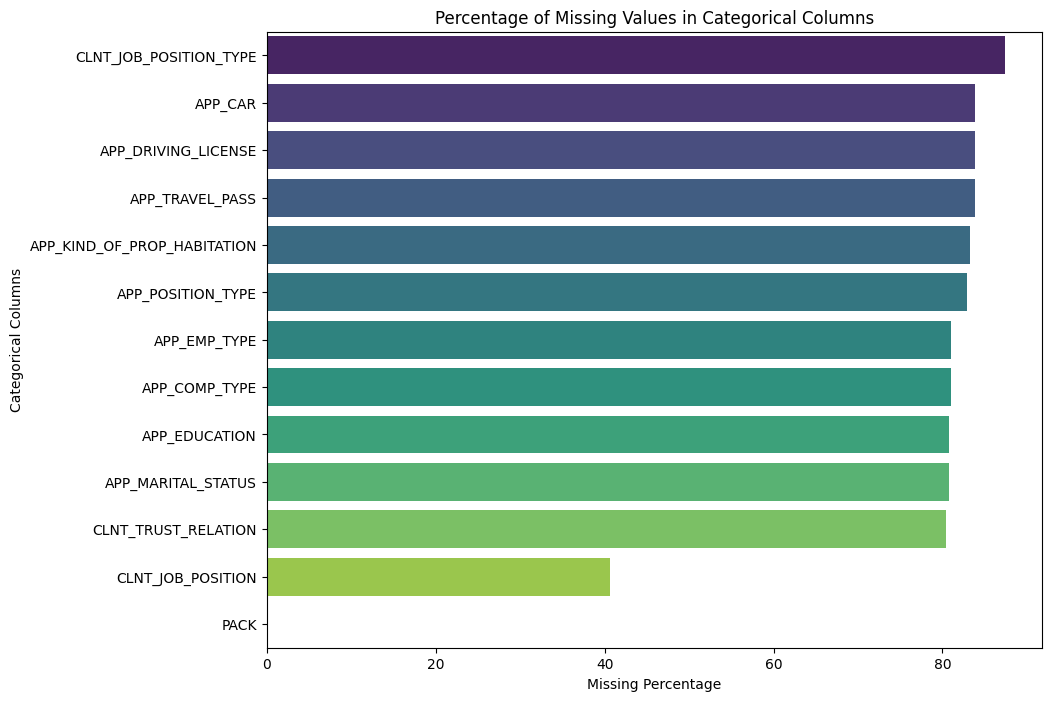

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Missing Percentage', y='Column', data=missing_percentages_df_cat, palette='viridis')

plt.title('Percentage of Missing Values in Categorical Columns')
plt.xlabel('Missing Percentage')
plt.ylabel('Categorical Columns')
plt.show()

In [ ]:
# percentage of missing values in each column
missing_percentages_numerical = numerical_data_df.isnull().sum() / len(numerical_data_df) * 100


missing_percentages_df_num = pd.DataFrame({'Column': numerical_data_df.columns, 'Missing Percentage': missing_percentages_numerical})
missing_percentages_df_num.sort_values(by='Missing Percentage', ascending=False, inplace=True)

missing_num_80=missing_percentages_df_num[missing_percentages_df_num['Missing Percentage'] > 80]

missing_percentages_df_num[missing_percentages_df_num['Missing Percentage'] > 0]


Column  Missing Percentage
CLNT_SALARY_VALUE                    CLNT_SALARY_VALUE           99.799544
LDEAL_YQZ_COM                            LDEAL_YQZ_COM           99.650891
LDEAL_YQZ_CHRG                          LDEAL_YQZ_CHRG           99.650610
AVG_PCT_MONTH_TO_PCLOSE        AVG_PCT_MONTH_TO_PCLOSE           99.541654
MAX_PCLOSE_DATE                        MAX_PCLOSE_DATE           99.470424
AVG_PCT_DEBT_TO_DEAL_AMT      AVG_PCT_DEBT_TO_DEAL_AMT           99.468454
LDEAL_AMT_MONTH                        LDEAL_AMT_MONTH           99.468454
LDEAL_YQZ_PC                              LDEAL_YQZ_PC           99.209437
DEAL_YQZ_IR_MIN                        DEAL_YQZ_IR_MIN           97.747403
LDEAL_TENOR_MAX                        LDEAL_TENOR_MAX           97.747403
LDEAL_USED_AMT_AVG_YQZ          LDEAL_USED_AMT_AVG_YQZ           97.747403
DEAL_YQZ_IR_MAX                        DEAL_YQZ_IR_MAX           97.747403
MED_DEBT_PRC_YQZ                      MED_DEBT_PRC_YQZ           97.747403
LDEAL_TENOR_MIN                        LDEAL_TENOR_MIN           97.747403
LDEAL_DELINQ_PER_MAXYQZ        LDEAL_DELINQ_PER_MAXYQZ           97.747403
APP_REGISTR_RGN_CODE              APP_REGISTR_RGN_CODE           82.952786
CNT_TRAN_CLO_TENDENCY1M        CNT_TRAN_CLO_TENDENCY1M           81.335060
SUM_TRAN_CLO_TENDENCY1M        SUM_TRAN_CLO_TENDENCY1M           81.335060
CNT_TRAN_MED_TENDENCY1M        CNT_TRAN_MED_TENDENCY1M           80.583068
SUM_TRAN_MED_TENDENCY1M        SUM_TRAN_MED_TENDENCY1M           80.583068
DEAL_GRACE_DAYS_ACC_MAX        DEAL_GRACE_DAYS_ACC_MAX           80.451871
DEAL_GRACE_DAYS_ACC_AVG        DEAL_GRACE_DAYS_ACC_AVG           80.451871
DEAL_GRACE_DAYS_ACC_S1X1      DEAL_GRACE_DAYS_ACC_S1X1           80.165827
SUM_TRAN_AUT_TENDENCY1M        SUM_TRAN_AUT_TENDENCY1M           78.289929
CNT_TRAN_AUT_TENDENCY1M        CNT_TRAN_AUT_TENDENCY1M           78.289929
LDEAL_ACT_DAYS_PCT_TR3          LDEAL_ACT_DAYS_PCT_TR3           73.690701
LDEAL_ACT_DAYS_ACC_PCT_AVG  LDEAL_ACT_DAYS_ACC_PCT_AVG           73.690701
LDEAL_ACT_DAYS_PCT_CURR        LDEAL_ACT_DAYS_PCT_CURR           73.690701
LDEAL_ACT_DAYS_PCT_TR            LDEAL_ACT_DAYS_PCT_TR           73.690701
LDEAL_ACT_DAYS_PCT_TR4          LDEAL_ACT_DAYS_PCT_TR4           73.690701
DEAL_YWZ_IR_MAX                        DEAL_YWZ_IR_MAX           73.053014
MED_DEBT_PRC_YWZ                      MED_DEBT_PRC_YWZ           73.053014
DEAL_YWZ_IR_MIN                        DEAL_YWZ_IR_MIN           73.053014
LDEAL_DELINQ_PER_MAXYWZ        LDEAL_DELINQ_PER_MAXYWZ           73.053014
LDEAL_USED_AMT_AVG_YWZ          LDEAL_USED_AMT_AVG_YWZ           73.053014
LDEAL_ACT_DAYS_PCT_AAVG        LDEAL_ACT_DAYS_PCT_AAVG           72.359864
SUM_TRAN_AUT_TENDENCY3M        SUM_TRAN_AUT_TENDENCY3M           68.734480
CNT_TRAN_AUT_TENDENCY3M        CNT_TRAN_AUT_TENDENCY3M           68.734480
SUM_TRAN_CLO_TENDENCY3M        SUM_TRAN_CLO_TENDENCY3M           67.651679
CNT_TRAN_CLO_TENDENCY3M        CNT_TRAN_CLO_TENDENCY3M           67.651679
SUM_TRAN_MED_TENDENCY3M        SUM_TRAN_MED_TENDENCY3M           67.376052
CNT_TRAN_MED_TENDENCY3M        CNT_TRAN_MED_TENDENCY3M           67.376052
PRC_ACCEPTS_A_AMOBILE            PRC_ACCEPTS_A_AMOBILE           56.315493
PRC_ACCEPTS_A_TK                      PRC_ACCEPTS_A_TK           56.315493
PRC_ACCEPTS_A_POS                    PRC_ACCEPTS_A_POS           56.315493
CNT_ACCEPTS_MTP                        CNT_ACCEPTS_MTP           56.315493
PRC_ACCEPTS_A_EMAIL_LINK      PRC_ACCEPTS_A_EMAIL_LINK           56.315493
PRC_ACCEPTS_A_MTP                    PRC_ACCEPTS_A_MTP           56.315493
PRC_ACCEPTS_TK                          PRC_ACCEPTS_TK           56.315493
CNT_ACCEPTS_TK                          CNT_ACCEPTS_TK           56.315493
PRC_ACCEPTS_MTP                        PRC_ACCEPTS_MTP           56.315493
PRC_ACCEPTS_A_ATM                    PRC_ACCEPTS_A_ATM           56.315493
CNT_TRAN_SUP_TENDENCY1M        CNT_TRAN_SUP_TENDENCY1M           56.08125

In [ ]:
print(churn_data_bank_df.shape)
print(numerical_data_df.shape)
print(categorical_data_df.shape)

(355190, 116)
(355190, 102)
(355190, 13)


### About the dataset?

1. The dataset contains information customers of a bank. It consists of 355190 rows and 116 columns.
2. I observed that there are no duplicate values and a lot of  misssing values/null values in the dataset. There are 115 Independent features and 'Target' is the target variable.
3. There are 102 numerical features(int and float data type) and 13 categorical features(object). This need not be true and need to investigate each variable to understand theit true data type.

## ***2. Understanding  Variables***







In [ ]:
# Dataset Columns
churn_data_bank_df.columns

Index(['ID', 'CR_PROD_CNT_IL', 'AMOUNT_RUB_CLO_PRC',
       'PRC_ACCEPTS_A_EMAIL_LINK', 'APP_REGISTR_RGN_CODE', 'PRC_ACCEPTS_A_POS',
       'PRC_ACCEPTS_A_TK', 'TURNOVER_DYNAMIC_IL_1M', 'CNT_TRAN_AUT_TENDENCY1M',
       'SUM_TRAN_AUT_TENDENCY1M',
       ...
       'REST_DYNAMIC_CC_3M', 'MED_DEBT_PRC_YWZ', 'LDEAL_ACT_DAYS_PCT_TR3',
       'LDEAL_ACT_DAYS_PCT_AAVG', 'LDEAL_DELINQ_PER_MAXYWZ',
       'TURNOVER_DYNAMIC_CC_3M', 'LDEAL_ACT_DAYS_PCT_TR',
       'LDEAL_ACT_DAYS_PCT_TR4', 'LDEAL_ACT_DAYS_PCT_CURR', 'TARGET'],
      dtype='object', length=116)

In [ ]:
# Sorting columns alphabetically to group features into one variable to analyse them separately.
churn_data_bank_df_sorted_alphabetically = churn_data_bank_df[sorted(churn_data_bank_df.columns)]

churn_data_bank_df_sorted_alphabetically.head()


AGE  AMOUNT_RUB_ATM_PRC  AMOUNT_RUB_CLO_PRC  AMOUNT_RUB_NAS_PRC  \
0  660            1.000000            0.000000                 0.0   
1  552            0.410691            0.041033                 0.0   
2  420            0.925140            0.006915                 0.0   
3  372            1.000000            0.000000                 0.0   
4  288            1.000000            0.000000                 0.0   

   AMOUNT_RUB_SUP_PRC APP_CAR APP_COMP_TYPE APP_DRIVING_LICENSE APP_EDUCATION  \
0            0.000000     NaN           NaN                 NaN           NaN   
1            0.244678     NaN           NaN                 NaN           NaN   
2            0.000000     NaN           NaN                 NaN           NaN   
3            0.000000     NaN           NaN                 NaN           NaN   
4            0.000000     NaN           NaN                 NaN           NaN   

  APP_EMP_TYPE APP_KIND_OF_PROP_HABITATION APP_MARITAL_STATUS  \
0          NaN                         NaN                NaN   
1          NaN                         NaN                NaN   
2          NaN                         NaN                NaN   
3          NaN                         NaN                NaN   
4          NaN                         NaN                NaN   

  APP_POSITION_TYPE  APP_REGISTR_RGN_CODE APP_TRAVEL_PASS  \
0               NaN                   NaN             NaN   
1               NaN                   NaN             NaN   
2               NaN                   NaN             NaN   
3               NaN                   NaN             NaN   
4               NaN                   NaN             NaN   

   AVG_PCT_DEBT_TO_DEAL_AMT  AVG_PCT_MONTH_TO_PCLOSE     CLNT_JOB_POSITION  \
0                       NaN                      NaN      начальник отдела   
1                       NaN                      NaN                   NaN   
2                       NaN                      NaN  ГЕНЕРАЛЬНЫЙ ДИРЕКТОР   
3                       NaN                      NaN          МЕНЕДЖЕР ИАО   
4                       NaN                      NaN                   NaN   

  CLNT_JOB_POSITION_TYPE  CLNT_SALARY_VALUE  CLNT_SETUP_TENOR  \
0                    NaN                NaN          1.593023   
1                    NaN                NaN          1.587647   
2                    NaN                NaN          1.587647   
3                    NaN                NaN          1.583333   
4                    NaN                NaN          1.583333   

  CLNT_TRUST_RELATION  CNT_ACCEPTS_MTP  CNT_ACCEPTS_TK  \
0                 NaN              NaN             NaN   
1                 NaN              NaN             NaN   
2                 NaN              0.0             0.0   
3                 NaN              NaN             NaN   
4                 NaN              NaN             NaN   

   CNT_TRAN_ATM_TENDENCY1M  CNT_TRAN_ATM_TENDENCY3M  CNT_TRAN_AUT_TENDENCY1M  \
0                 0.101695                 0.406780                      NaN   
1                 0.166667                 0.333333                 0.166667   
2                 0.133333                 0.366667                      NaN   
3                      NaN                      NaN                      NaN   
4                 0.172414                 0.620690                      NaN   

   CNT_TRAN_AUT_TENDENCY3M  CNT_TRAN_CLO_TENDENCY1M  CNT_TRAN_CLO_TENDENCY3M  \
0                      NaN                      NaN                      NaN   
1                 0.666667                      NaN                      NaN   
2                      NaN                      NaN                      NaN   
3                      NaN                      NaN                      NaN   
4                      NaN                      NaN                      NaN   

   CNT_TRAN_MED_TENDENCY1M  CNT_TRAN_MED_TENDENCY3M  CNT_TRAN_SUP_TENDENCY1M  \
0                      NaN                      NaN                      NaN   
1     

In [ ]:
# CLNT_JOB_POSITION is a categorical column and has 40% of missing values and there seems to be dataa entry errors in that column.
columns_that_can_be_removed.append('CLNT_JOB_POSITION')

In [ ]:
numerical_columns


['ID',
 'CR_PROD_CNT_IL',
 'AMOUNT_RUB_CLO_PRC',
 'PRC_ACCEPTS_A_EMAIL_LINK',
 'APP_REGISTR_RGN_CODE',
 'PRC_ACCEPTS_A_POS',
 'PRC_ACCEPTS_A_TK',
 'TURNOVER_DYNAMIC_IL_1M',
 'CNT_TRAN_AUT_TENDENCY1M',
 'SUM_TRAN_AUT_TENDENCY1M',
 'AMOUNT_RUB_SUP_PRC',
 'PRC_ACCEPTS_A_AMOBILE',
 'SUM_TRAN_AUT_TENDENCY3M',
 'PRC_ACCEPTS_TK',
 'PRC_ACCEPTS_A_MTP',
 'REST_DYNAMIC_FDEP_1M',
 'CNT_TRAN_AUT_TENDENCY3M',
 'CNT_ACCEPTS_TK',
 'REST_DYNAMIC_SAVE_3M',
 'CR_PROD_CNT_VCU',
 'REST_AVG_CUR',
 'CNT_TRAN_MED_TENDENCY1M',
 'AMOUNT_RUB_NAS_PRC',
 'TRANS_COUNT_SUP_PRC',
 'CNT_TRAN_CLO_TENDENCY1M',
 'SUM_TRAN_MED_TENDENCY1M',
 'PRC_ACCEPTS_A_ATM',
 'PRC_ACCEPTS_MTP',
 'TRANS_COUNT_NAS_PRC',
 'CNT_ACCEPTS_MTP',
 'CR_PROD_CNT_TOVR',
 'CR_PROD_CNT_PIL',
 'SUM_TRAN_CLO_TENDENCY1M',
 'TURNOVER_CC',
 'TRANS_COUNT_ATM_PRC',
 'AMOUNT_RUB_ATM_PRC',
 'TURNOVER_PAYM',
 'AGE',
 'CNT_TRAN_MED_TENDENCY3M',
 'CR_PROD_CNT_CC',
 'SUM_TRAN_MED_TENDENCY3M',
 'REST_DYNAMIC_FDEP_3M',
 'REST_DYNAMIC_IL_1M',
 'SUM_TRAN_CLO_TENDEN

In [ ]:
categorical_columns

Index(['CLNT_TRUST_RELATION', 'APP_MARITAL_STATUS',
       'APP_KIND_OF_PROP_HABITATION', 'CLNT_JOB_POSITION_TYPE',
       'CLNT_JOB_POSITION', 'APP_DRIVING_LICENSE', 'APP_EDUCATION',
       'APP_TRAVEL_PASS', 'APP_CAR', 'APP_POSITION_TYPE', 'APP_EMP_TYPE',
       'APP_COMP_TYPE', 'PACK'],
      dtype='object')

In [ ]:
churn_data_bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355190 entries, 0 to 355189
Columns: 116 entries, ID to TARGET
dtypes: float64(94), int64(9), object(13)
memory usage: 314.3+ MB


### Variables Description

The dataset contains various columns related to customer transactions, acceptance rates, turnover dynamics, and other financial metrics. Here's a summary of the columns and their descriptions:

- ID: Unique identifier for each entry.
- CR_PROD_CNT_IL, CR_PROD_CNT_VCU, CR_PROD_CNT_TOVR, CR_PROD_CNT_PIL, CR_PROD_CNT_CC, CR_PROD_CNT_CCFP: Counts of different credit products.

- AMOUNT_RUB_CLO_PRC, AMOUNT_RUB_SUP_PRC, AMOUNT_RUB_NAS_PRC, AMOUNT_RUB_ATM_PRC: The fraction of transactions with MCC to the whole amount of transactions in the period(rub).

- PRC_ACCEPTS_A_EMAIL_LINK, PRC_ACCEPTS_A_POS, PRC_ACCEPTS_A_TK, PRC_ACCEPTS_A_AMOBILE, PRC_ACCEPTS_A_MTP, PRC_ACCEPTS_A_ATM, PRC_ACCEPTS_MTP: %  of accepts in channels / product groups.

- TURNOVER_DYNAMIC_IL_1M, TURNOVER_DYNAMIC_IL_3M, TURNOVER_CC, TURNOVER_DYNAMIC_CUR_1M, TURNOVER_DYNAMIC_CUR_3M, TURNOVER_DYNAMIC_PAYM_1M, TURNOVER_DYNAMIC_PAYM_3M, TURNOVER_DYNAMIC_CC_1M, TURNOVER_DYNAMIC_CC_3M: Turnover dynamics over 1 month and 3 month periods and for different types of transactions.

-TURNOVER_PAYM - Average turnover of salary accounts.

- CNT_TRAN_AUT_TENDENCY1M, CNT_TRAN_AUT_TENDENCY3M, CNT_TRAN_MED_TENDENCY1M, CNT_TRAN_MED_TENDENCY3M, CNT_TRAN_CLO_TENDENCY1M, CNT_TRAN_CLO_TENDENCY3M, CNT_TRAN_SUP_TENDENCY1M, CNT_TRAN_SUP_TENDENCY3M, CNT_TRAN_ATM_TENDENCY1M, CNT_TRAN_ATM_TENDENCY3M: Trend of transactions number by the MCC type with tendencies over 1 and 3 month periods.

- SUM_TRAN_AUT_TENDENCY1M, SUM_TRAN_AUT_TENDENCY3M, SUM_TRAN_MED_TENDENCY1M, SUM_TRAN_MED_TENDENCY3M, SUM_TRAN_CLO_TENDENCY1M, SUM_TRAN_CLO_TENDENCY3M, SUM_TRAN_SUP_TENDENCY1M, SUM_TRAN_SUP_TENDENCY3M, SUM_TRAN_ATM_TENDENCY1M, SUM_TRAN_ATM_TENDENCY3M: Trend of transactions amounts per MCC with tendencies over 1 and 3 month periods.

- REST_DYNAMIC_FDEP_1M, REST_DYNAMIC_FDEP_3M, REST_DYNAMIC_IL_1M, REST_DYNAMIC_IL_3M, REST_DYNAMIC_CUR_1M, REST_DYNAMIC_CUR_3M, REST_DYNAMIC_SAVE_3M, REST_DYNAMIC_PAYM_1M, REST_DYNAMIC_PAYM_3M, REST_DYNAMIC_CC_1M, REST_DYNAMIC_CC_3M: Trend of monthly average account balances per products (1 or 3 months).

- TRANS_COUNT_SUP_PRC, TRANS_COUNT_NAS_PRC, TRANS_COUNT_ATM_PRC: Ratio of MCC transactions to the all transactions in the period.

- AGE: Age of the customer.

- LDEAL_TENOR_MAX, LDEAL_TENOR_MIN: Maximum and minimum deal tenor.

- LDEAL_USED_AMT_AVG_YQZ, LDEAL_USED_AMT_AVG_YWZ: Average deal amount used.

- LDEAL_AMT_MONTH, LDEAL_YQZ_CHRG, LDEAL_YQZ_COM, LDEAL_YQZ_PC, LDEAL_GRACE_DAYS_PCT_MED, LDEAL_DELINQ_PER_MAXYQZ, LDEAL_DELINQ_PER_MAXYWZ: Other product Metrics in the period(credit contracts)


- DEAL_GRACE_DAYS_ACC_S1X1, DEAL_GRACE_DAYS_ACC_AVG, DEAL_GRACE_DAYS_ACC_MAX: Grace Metrics

- DEAL_YQZ_IR_MAX, DEAL_YQZ_IR_MIN, DEAL_YWZ_IR_MAX, DEAL_YWZ_IR_MIN: Maximum and minumum interest rates for revolvers and annuities.

- REST_AVG_CUR, REST_AVG_PAYM: Average current account balances and average salart account balances.

- CNT_ACCEPTS_TK, CNT_ACCEPTS_MTP: Count of acceptances for different campaign channels.

- MAX_PCLOSE_DATE: number of months until planned credit close date( Maximum with annuities)

- CLNT_SETUP_TENOR: Months of being a customer.

- CLNT_SALARY_VALUE: Client salary value.

- TRANS_AMOUNT_TENDENCY3M: ratio between transaction sum in the last 3 months to the 6 months.

- TRANS_CNT_TENDENCY3M: ration between transaction number in the last 3 months to the 6 months.

- MED_DEBT_PRC_YQZ, MED_DEBT_PRC_YWZ: Median debt percentages for annuities and revolvers.


- AVG_PCT_DEBT_TO_DEAL_AMT - Average percentage of debt to deal amount (average annuity)

-  AVG_PCT_MONTH_TO_PCLOSE: Average percentage of the credit term left.

- LDEAL_ACT_DAYS_ACC_PCT_AVG, LDEAL_ACT_DAYS_PCT_TR3, LDEAL_ACT_DAYS_PCT_AAVG, LDEAL_ACT_DAYS_PCT_TR, LDEAL_ACT_DAYS_PCT_TR4, LDEAL_ACT_DAYS_PCT_CURR: Metrics of activity in the period (credit contracts).



In the context of financial terms:

- **Revolvers**: These are individuals who carry a balance on their credit cards from month to month, rather than paying it off entirely. They typically pay interest on the remaining balance.

- **Annuities**: In the financial context, annuities usually refer to financial products sold by insurance companies, designed to provide regular payments to the holder, often starting at retirement.

##Categorical

Sure, here are the variable descriptions for the columns in your dataset:

1. **APP_CAR**: Indicates whether the applicant owns a car.
2. **APP_COMP_TYPE**: Type of company where the applicant works.
3. **APP_DRIVING_LICENSE**: Indicates whether the applicant has a driving license.
4. **APP_EDUCATION**: Education level of the applicant.
5. **APP_EMP_TYPE**: Type of employment of the applicant.
6. **APP_KIND_OF_PROP_HABITATION**: Type of property where the applicant lives.
7. **APP_MARITAL_STATUS**: Marital status of the applicant.
8. **APP_POSITION_TYPE**: Job position type of the applicant.
9. **APP_TRAVEL_PASS**: International passport
10. **CLNT_JOB_POSITION**: Specific job position of the client.
11. **CLNT_JOB_POSITION_TYPE**: General job position type of the client.
12. **CLNT_TRUST_RELATION**: Type of trust relationship with the client.
13. **PACK**: Type of service package the client has.


- **TARGET**: Target variable indicating the outcome (churn or not).




In [ ]:
# Credit Products Count
credit_products_count = [
    'CR_PROD_CNT_IL', 'CR_PROD_CNT_VCU', 'CR_PROD_CNT_TOVR',
    'CR_PROD_CNT_PIL', 'CR_PROD_CNT_CC', 'CR_PROD_CNT_CCFP'
]

# Amounts in Rubles for Transaction Types
amounts_rub_transaction_types = [
    'AMOUNT_RUB_CLO_PRC', 'AMOUNT_RUB_SUP_PRC',
    'AMOUNT_RUB_NAS_PRC', 'AMOUNT_RUB_ATM_PRC'
]

# Acceptance Percentages for Services
acceptance_percentages = [
    'PRC_ACCEPTS_A_EMAIL_LINK', 'PRC_ACCEPTS_A_POS', 'PRC_ACCEPTS_A_TK',
    'PRC_ACCEPTS_A_AMOBILE', 'PRC_ACCEPTS_A_MTP', 'PRC_ACCEPTS_A_ATM',
    'PRC_ACCEPTS_MTP','PRC_ACCEPTS_TK'
]

# Turnover Dynamics
turnover_dynamics = [
    'TURNOVER_DYNAMIC_IL_1M', 'TURNOVER_DYNAMIC_IL_3M', 'TURNOVER_CC',
    'TURNOVER_DYNAMIC_CUR_1M', 'TURNOVER_DYNAMIC_CUR_3M',
    'TURNOVER_DYNAMIC_PAYM_1M', 'TURNOVER_DYNAMIC_PAYM_3M',
    'TURNOVER_DYNAMIC_CC_1M', 'TURNOVER_DYNAMIC_CC_3M', 'TURNOVER_PAYM'
]

# Transaction Trend Counts by MCC Type
transaction_trend_counts = [
    'CNT_TRAN_AUT_TENDENCY1M', 'CNT_TRAN_AUT_TENDENCY3M',
    'CNT_TRAN_MED_TENDENCY1M', 'CNT_TRAN_MED_TENDENCY3M',
    'CNT_TRAN_CLO_TENDENCY1M', 'CNT_TRAN_CLO_TENDENCY3M',
    'CNT_TRAN_SUP_TENDENCY1M', 'CNT_TRAN_SUP_TENDENCY3M',
    'CNT_TRAN_ATM_TENDENCY1M', 'CNT_TRAN_ATM_TENDENCY3M'
]

# Transaction Trend Sums by MCC Type
transaction_trend_sums_per_MCC = [
    'SUM_TRAN_AUT_TENDENCY1M', 'SUM_TRAN_AUT_TENDENCY3M',
    'SUM_TRAN_MED_TENDENCY1M', 'SUM_TRAN_MED_TENDENCY3M',
    'SUM_TRAN_CLO_TENDENCY1M', 'SUM_TRAN_CLO_TENDENCY3M',
    'SUM_TRAN_SUP_TENDENCY1M', 'SUM_TRAN_SUP_TENDENCY3M',
    'SUM_TRAN_ATM_TENDENCY1M', 'SUM_TRAN_ATM_TENDENCY3M'
]

# Monthly Average Account Balances
monthly_avg_balances_per_products = [
    'REST_DYNAMIC_FDEP_1M', 'REST_DYNAMIC_FDEP_3M',
    'REST_DYNAMIC_IL_1M', 'REST_DYNAMIC_IL_3M',
    'REST_DYNAMIC_CUR_1M', 'REST_DYNAMIC_CUR_3M',
    'REST_DYNAMIC_SAVE_3M', 'REST_DYNAMIC_PAYM_1M',
    'REST_DYNAMIC_PAYM_3M', 'REST_DYNAMIC_CC_1M',
    'REST_DYNAMIC_CC_3M'
]

# Transaction Ratio by MCC Type
transaction_ratio_mcc = [
    'TRANS_COUNT_SUP_PRC', 'TRANS_COUNT_NAS_PRC', 'TRANS_COUNT_ATM_PRC'
]

# Customer Demographics and Characteristics
customer_characteristics = [
    'AGE',

     'REST_AVG_CUR', 'REST_AVG_PAYM',
    'CNT_ACCEPTS_TK', 'CNT_ACCEPTS_MTP', 'MAX_PCLOSE_DATE',
    'CLNT_SETUP_TENOR', 'CLNT_SALARY_VALUE',
    'TRANS_AMOUNT_TENDENCY3M', 'TRANS_CNT_TENDENCY3M',
    'MED_DEBT_PRC_YQZ', 'MED_DEBT_PRC_YWZ',
    'AVG_PCT_DEBT_TO_DEAL_AMT', 'AVG_PCT_MONTH_TO_PCLOSE'

]

#Product_metrics_credit_contracts
Product_metrics_credit_contracts=['LDEAL_ACT_DAYS_ACC_PCT_AVG', 'LDEAL_ACT_DAYS_PCT_TR3',
    'LDEAL_ACT_DAYS_PCT_AAVG', 'LDEAL_ACT_DAYS_PCT_TR',
    'LDEAL_ACT_DAYS_PCT_TR4', 'LDEAL_ACT_DAYS_PCT_CURR', 'LDEAL_TENOR_MAX', 'LDEAL_TENOR_MIN',
    'LDEAL_USED_AMT_AVG_YQZ', 'LDEAL_USED_AMT_AVG_YWZ',
    'LDEAL_YQZ_CHRG', 'LDEAL_YQZ_COM', 'LDEAL_YQZ_PC',
    'LDEAL_GRACE_DAYS_PCT_MED','LDEAL_DELINQ_PER_MAXYQZ', 'LDEAL_DELINQ_PER_MAXYWZ', 'LDEAL_AMT_MONTH']


#Grace Metrics

Grace_metrics=['DEAL_GRACE_DAYS_ACC_S1X1','DEAL_GRACE_DAYS_ACC_AVG', 'DEAL_GRACE_DAYS_ACC_MAX', ]



#Max_Min_interest_rate_revolvers_annuities

Max_Min_interest_rate_revolvers_annuities=['DEAL_YQZ_IR_MAX', 'DEAL_YQZ_IR_MIN', 'DEAL_YWZ_IR_MAX',
    'DEAL_YWZ_IR_MIN']









In [ ]:
for i in acceptance_percentages:
  print(f"Value counts for {i}:\n{numerical_data_df[i].value_counts()}\n")

Value counts for PRC_ACCEPTS_A_EMAIL_LINK:
PRC_ACCEPTS_A_EMAIL_LINK
0.0    155163
Name: count, dtype: int64

Value counts for PRC_ACCEPTS_A_POS:
PRC_ACCEPTS_A_POS
0.0    155163
Name: count, dtype: int64

Value counts for PRC_ACCEPTS_A_TK:
PRC_ACCEPTS_A_TK
0.0    155163
Name: count, dtype: int64

Value counts for PRC_ACCEPTS_A_AMOBILE:
PRC_ACCEPTS_A_AMOBILE
0.0    155163
Name: count, dtype: int64

Value counts for PRC_ACCEPTS_A_MTP:
PRC_ACCEPTS_A_MTP
0.0    155163
Name: count, dtype: int64

Value counts for PRC_ACCEPTS_A_ATM:
PRC_ACCEPTS_A_ATM
0.0    155163
Name: count, dtype: int64

Value counts for PRC_ACCEPTS_MTP:
PRC_ACCEPTS_MTP
0.0    155163
Name: count, dtype: int64

Value counts for PRC_ACCEPTS_TK:
PRC_ACCEPTS_TK
0.0    155163
Name: count, dtype: int64



Percentage of acceptance in channels/ product groups seems to 0 percent and half are null values. These columns can be removed after further investigation.


In [ ]:
# updating my list.
# Run this cell only once.
columns_that_can_be_removed.extend(acceptance_percentages)

In [ ]:
# Value counts for credit_products_count
# DataFrame to store value counts
value_counts_df = pd.DataFrame(columns=['Variable', 'Value', 'Count'])

#
for var in credit_products_count:

    counts = numerical_data_df[var].value_counts().reset_index()
    counts.columns = ['Value', 'Count']


    counts['Variable'] = var


    value_counts_df = pd.concat([value_counts_df, counts], ignore_index=True)

# Display the result
print(value_counts_df)


            Variable Value   Count
0     CR_PROD_CNT_IL     0  328025
1     CR_PROD_CNT_IL     1   20533
2     CR_PROD_CNT_IL     2    4484
3     CR_PROD_CNT_IL     3    1313
4     CR_PROD_CNT_IL     4     508
5     CR_PROD_CNT_IL     5     189
6     CR_PROD_CNT_IL     6      73
7     CR_PROD_CNT_IL     7      34
8     CR_PROD_CNT_IL     9      14
9     CR_PROD_CNT_IL     8       9
10    CR_PROD_CNT_IL    10       4
11    CR_PROD_CNT_IL    11       4
12   CR_PROD_CNT_VCU     0  344721
13   CR_PROD_CNT_VCU     1    9878
14   CR_PROD_CNT_VCU     2     565
15   CR_PROD_CNT_VCU     3      25
16   CR_PROD_CNT_VCU     4       1
17  CR_PROD_CNT_TOVR     0  263991
18  CR_PROD_CNT_TOVR     1   75945
19  CR_PROD_CNT_TOVR     2   12327
20  CR_PROD_CNT_TOVR     3    2403
21  CR_PROD_CNT_TOVR     4     418
22  CR_PROD_CNT_TOVR     5      78
23  CR_PROD_CNT_TOVR     6      10
24  CR_PROD_CNT_TOVR     8       6
25  CR_PROD_CNT_TOVR     7       5
26  CR_PROD_CNT_TOVR     9       3
27  CR_PROD_CNT_TOVR

It can be seen that above features are categorical variables representing count of each product type. I will add these into categorical columns.

In [ ]:
categorical_columns=list(categorical_columns)

In [ ]:
# run this cell only once
categorical_columns.extend(credit_products_count)

In [ ]:
# Number of accepts in different campaign channels
print(numerical_data_df['CNT_ACCEPTS_TK'].value_counts())
print(numerical_data_df['CNT_ACCEPTS_MTP'].value_counts())


CNT_ACCEPTS_TK
0.0    155163
Name: count, dtype: int64
CNT_ACCEPTS_MTP
0.0    155163
Name: count, dtype: int64


The variables CNT_ACCEPTS_TK and CNT_ACCEPTS_MTP represent the count of accepts in different campaign channels.

CNT_ACCEPTS_TK: The value 0.0 appears 155163 times, indicating that in a significant number of entries, there were no accepts in the campaign channel identified as TK.

CNT_ACCEPTS_MTP: Similarly, the value 0.0 appears 155163 times, suggesting that there were no accepts in the campaign channel identified as MTP in the same set of entries.

This could be either a lack of usage or no recorded accepts in these specific campaign channels for those entries in your dataset.

Also, these can be considered as categorical features rather than numerical.

In [ ]:
# appending to categorical columns
# run this cell only once.
categorical_columns.append('CNT_ACCEPTS_TK')
categorical_columns.append('CNT_ACCEPTS_MTP')

In [ ]:
categorical_columns

['CLNT_TRUST_RELATION',
 'APP_MARITAL_STATUS',
 'APP_KIND_OF_PROP_HABITATION',
 'CLNT_JOB_POSITION_TYPE',
 'CLNT_JOB_POSITION',
 'APP_DRIVING_LICENSE',
 'APP_EDUCATION',
 'APP_TRAVEL_PASS',
 'APP_CAR',
 'APP_POSITION_TYPE',
 'APP_EMP_TYPE',
 'APP_COMP_TYPE',
 'PACK',
 'CR_PROD_CNT_IL',
 'CR_PROD_CNT_VCU',
 'CR_PROD_CNT_TOVR',
 'CR_PROD_CNT_PIL',
 'CR_PROD_CNT_CC',
 'CR_PROD_CNT_CCFP',
 'CNT_ACCEPTS_TK',
 'CNT_ACCEPTS_MTP']

In [ ]:
numerical_data_df.head()

ID  CR_PROD_CNT_IL  AMOUNT_RUB_CLO_PRC  PRC_ACCEPTS_A_EMAIL_LINK  \
0  146841               0            0.000000                       NaN   
1  146842               0            0.041033                       NaN   
2  146843               0            0.006915                       0.0   
3  146844               0            0.000000                       NaN   
4  146845               0            0.000000                       NaN   

   APP_REGISTR_RGN_CODE  PRC_ACCEPTS_A_POS  PRC_ACCEPTS_A_TK  \
0                   NaN                NaN               NaN   
1                   NaN                NaN               NaN   
2                   NaN                0.0               0.0   
3                   NaN                NaN               NaN   
4                   NaN                NaN               NaN   

   TURNOVER_DYNAMIC_IL_1M  CNT_TRAN_AUT_TENDENCY1M  SUM_TRAN_AUT_TENDENCY1M  \
0                     0.0                      NaN                      NaN   
1                     0.0                 0.166667                 0.186107   
2                     0.0                      NaN                      NaN   
3                     0.0                      NaN                      NaN   
4                     0.0                      NaN                      NaN   

   AMOUNT_RUB_SUP_PRC  PRC_ACCEPTS_A_AMOBILE  SUM_TRAN_AUT_TENDENCY3M  \
0            0.000000                    NaN                      NaN   
1            0.244678                    NaN                 0.670968   
2            0.000000                    0.0                      NaN   
3            0.000000                    NaN                      NaN   
4            0.000000                    NaN                      NaN   

   PRC_ACCEPTS_TK  PRC_ACCEPTS_A_MTP  REST_DYNAMIC_FDEP_1M  \
0             NaN                NaN                   0.0   
1             NaN                NaN                   0.0   
2             0.0                0.0                   0.0   
3             NaN                NaN                   0.0   
4             NaN                NaN                   0.0   

   CNT_TRAN_AUT_TENDENCY3M  CNT_ACCEPTS_TK  REST_DYNAMIC_SAVE_3M  \
0                      NaN             NaN              0.541683   
1                 0.666667             NaN              0.000000   
2                      NaN             0.0              0.000000   
3                      NaN             NaN              0.005874   
4                      NaN             NaN              0.000000   

   CR_PROD_CNT_VCU   REST_AVG_CUR  CNT_TRAN_MED_TENDENCY1M  \
0                0  156067.339767                      NaN   
1                0    4278.845817                      NaN   
2                0  112837.062817                      NaN   
3                0   42902.902883                      NaN   
4                0   71906.476533                      NaN   

   AMOUNT_RUB_NAS_PRC  TRANS_COUNT_SUP_PRC  CNT_TRAN_CLO_TENDENCY1M  \
0                 0.0             0.000000                      NaN   
1                 0.0             0.454545                      NaN   
2                 0.0             0.000000                      NaN   
3                 0.0             0.000000                      NaN   
4                 0.0             0.000000                      NaN   

   SUM_TRAN_MED_TENDENCY1M  PRC_ACCEPTS_A_ATM  PRC_ACCEPTS_MTP  \
0                      NaN                NaN              NaN   
1                      NaN                NaN              NaN   
2                      NaN                0.0              0.0   
3                      NaN                NaN              NaN   
4                      NaN                NaN              NaN   

   TRANS_COUNT_NAS_PRC  CNT_ACCEPTS_MTP  CR_PROD_CNT_TOVR  CR_PROD_CNT_PIL  \
0                  0.0              NaN                 0                0   
1                  0.0              NaN                 0                0   
2                  0.0              0.0     

In [ ]:
# Run this cell only once.
numerical_data_df.drop(columns=credit_products_count,inplace=True)
numerical_data_df.drop(columns=['CNT_ACCEPTS_TK','CNT_ACCEPTS_MTP'],inplace=True)


In [ ]:
# updated Categorical column

#
categorical_columns = [
    'APP_CAR', 'APP_COMP_TYPE', 'APP_DRIVING_LICENSE', 'APP_EDUCATION',
    'APP_EMP_TYPE', 'APP_KIND_OF_PROP_HABITATION', 'APP_MARITAL_STATUS',
    'APP_POSITION_TYPE', 'APP_TRAVEL_PASS', 'CLNT_JOB_POSITION',
    'CLNT_JOB_POSITION_TYPE', 'CLNT_TRUST_RELATION', 'PACK',
    'CR_PROD_CNT_IL', 'CR_PROD_CNT_VCU', 'CR_PROD_CNT_TOVR',
    'CR_PROD_CNT_PIL', 'CR_PROD_CNT_CC', 'CR_PROD_CNT_CCFP',
    'CNT_ACCEPTS_TK', 'CNT_ACCEPTS_MTP'
]


updated_categorical_df = churn_data_bank_df[categorical_columns].copy()

updated_categorical_df.head()


APP_CAR APP_COMP_TYPE APP_DRIVING_LICENSE APP_EDUCATION APP_EMP_TYPE  \
0     NaN           NaN                 NaN           NaN          NaN   
1     NaN           NaN                 NaN           NaN          NaN   
2     NaN           NaN                 NaN           NaN          NaN   
3     NaN           NaN                 NaN           NaN          NaN   
4     NaN           NaN                 NaN           NaN          NaN   

  APP_KIND_OF_PROP_HABITATION APP_MARITAL_STATUS APP_POSITION_TYPE  \
0                         NaN                NaN               NaN   
1                         NaN                NaN               NaN   
2                         NaN                NaN               NaN   
3                         NaN                NaN               NaN   
4                         NaN                NaN               NaN   

  APP_TRAVEL_PASS     CLNT_JOB_POSITION CLNT_JOB_POSITION_TYPE  \
0             NaN      начальник отдела                    NaN   
1             NaN                   NaN                    NaN   
2             NaN  ГЕНЕРАЛЬНЫЙ ДИРЕКТОР                    NaN   
3             NaN          МЕНЕДЖЕР ИАО                    NaN   
4             NaN                   NaN                    NaN   

  CLNT_TRUST_RELATION PACK  CR_PROD_CNT_IL  CR_PROD_CNT_VCU  CR_PROD_CNT_TOVR  \
0                 NaN  K01               0                0                 0   
1                 NaN  102               0                0                 0   
2                 NaN  102               0                0                 0   
3                 NaN  K01               0                0                 0   
4                 NaN  102               0                0                 0   

   CR_PROD_CNT_PIL  CR_PROD_CNT_CC  CR_PROD_CNT_CCFP  CNT_ACCEPTS_TK  \
0                0               0                 0             NaN   
1                0               0                 0             NaN   
2                0               0                 0             0.0   
3                0               0                 0             NaN   
4                0               0                 0             NaN   

   CNT_ACCEPTS_MTP  
0              NaN  
1              NaN  
2              0.0  
3              NaN  
4              NaN

In [ ]:
updated_categorical_df.shape

(355190, 21)

### Check Unique Values for each categorical variable.

In [ ]:
# Check Unique Values for each variable.
for i in updated_categorical_df.columns.tolist():
  print('unique values in ',i, 'are', updated_categorical_df[i].nunique())



unique values in  APP_CAR are 2
unique values in  APP_COMP_TYPE are 4
unique values in  APP_DRIVING_LICENSE are 2
unique values in  APP_EDUCATION are 17
unique values in  APP_EMP_TYPE are 4
unique values in  APP_KIND_OF_PROP_HABITATION are 5
unique values in  APP_MARITAL_STATUS are 13
unique values in  APP_POSITION_TYPE are 4
unique values in  APP_TRAVEL_PASS are 2
unique values in  CLNT_JOB_POSITION are 19588
unique values in  CLNT_JOB_POSITION_TYPE are 4
unique values in  CLNT_TRUST_RELATION are 21
unique values in  PACK are 12
unique values in  CR_PROD_CNT_IL are 12
unique values in  CR_PROD_CNT_VCU are 5
unique values in  CR_PROD_CNT_TOVR are 13
unique values in  CR_PROD_CNT_PIL are 9
unique values in  CR_PROD_CNT_CC are 8
unique values in  CR_PROD_CNT_CCFP are 5
unique values in  CNT_ACCEPTS_TK are 1
unique values in  CNT_ACCEPTS_MTP are 1


In [ ]:
# CLNT_JOB_POSITION seems to have more values being a categorical variable. It seems it is a text column of job position names in inappropriate format. we will remove this column.
columns_that_can_be_removed.append('CLNT_JOB_POSITION')


In [ ]:

columns_to_count = [
     'APP_MARITAL_STATUS', 'APP_KIND_OF_PROP_HABITATION', 'CLNT_JOB_POSITION_TYPE',
    'APP_DRIVING_LICENSE', 'APP_EDUCATION', 'APP_TRAVEL_PASS', 'APP_CAR',
    'APP_POSITION_TYPE', 'APP_EMP_TYPE', 'APP_COMP_TYPE', 'PACK'
]


value_counts_dict = {}


for column in columns_to_count:
    value_counts_dict[column] = churn_data_bank_df[column].value_counts()


for column, value_counts in value_counts_dict.items():
    print(f"Value counts for {column}:\n{value_counts}\n")


Value counts for APP_MARITAL_STATUS:
APP_MARITAL_STATUS
M    30724
V    22207
D     7379
T     3224
m     1461
N      936
v      868
W      646
d      398
t      168
C      155
w       51
        17
Name: count, dtype: int64

Value counts for APP_KIND_OF_PROP_HABITATION:
APP_KIND_OF_PROP_HABITATION
SO         28056
JO         14153
OTHER      11316
RENT        3223
NPRIVAT     2613
Name: count, dtype: int64

Value counts for CLNT_JOB_POSITION_TYPE:
CLNT_JOB_POSITION_TYPE
SPECIALIST     25123
MANAGER         9396
TOP_MANAGER     7262
SELF_EMPL       3000
Name: count, dtype: int64

Value counts for APP_DRIVING_LICENSE:
APP_DRIVING_LICENSE
N    36332
Y    20925
Name: count, dtype: int64

Value counts for APP_EDUCATION:
APP_EDUCATION
H     42459
SS    10235
UH     6254
S      3275
HH     1930
h      1911
s       605
A       536
i       380
US      201
I       195
HI       52
a        36
e        14
E         9
AC        7
AV        5
Name: count, dtype: int64

Value counts for APP_TRAVEL_P

Columns like APP_MARITAL_STATUS, APP_KIND_OF_PROP_HABITATION, CLNT_JOB_POSITION_TYPE have distinct categorical values.

Some columns like APP_MARITAL_STATUS and APP_EDUCATION have variations in the same category, indicating possible data entry inconsistencies. Need to adjust this.

Binary Categories:
Columns like APP_DRIVING_LICENSE, APP_TRAVEL_PASS, and APP_CAR are binary, representing 'Yes' or 'No

In [ ]:
# Handling data inconsistencies in APP_MARITAL_STATUS, APP_Education

#  mappings for APP_MARITAL_STATUS
marital_status_mapping = {
    'M': 'Married', 'm': 'Married',
    'V': 'Single', 'v': 'Single',
    'D': 'Divorced', 'd': 'Divorced',
    'T': 'Widowed', 't': 'Widowed',
    'W': 'Widowed', 'w': 'Widowed',
    'C': 'Civil Union',
    'N': 'Not Specified',
    '': 'Not Specified'
}

#  mappings for APP_EDUCATION
education_mapping = {
    'H': 'High School', 'h': 'High School',
    'SS': 'Some School',
    'UH': 'Undergraduate', 'uH': 'Undergraduate',
    'S': 'Secondary School', 's': 'Secondary School',
    'HH': 'Higher Education', 'HI': 'Higher Education',
    'i': 'Incomplete Higher', 'I': 'Incomplete Higher',
    'A': 'Associate Degree', 'a': 'Associate Degree',
    'e': 'Elementary', 'E': 'Elementary',
    'AC': 'Academic Degree', 'AV': 'Advanced Degree'
}

#
churn_data_bank_df['APP_MARITAL_STATUS'] = churn_data_bank_df['APP_MARITAL_STATUS'].map(marital_status_mapping)
churn_data_bank_df['APP_EDUCATION'] = churn_data_bank_df['APP_EDUCATION'].map(education_mapping)

# remaining missing values with 'Not Specified' for both columns
churn_data_bank_df['APP_MARITAL_STATUS'].fillna('Not Specified', inplace=True)
churn_data_bank_df['APP_EDUCATION'].fillna('Not Specified', inplace=True)


##  ***EDA***

In [ ]:
# Write your code to make your dataset analysis ready.
#let me save my original dataset by making a copy

EDA_churn_data_bank_df=churn_data_bank_df.copy()

EDA_churn_data_bank_df.head()

ID  CR_PROD_CNT_IL  AMOUNT_RUB_CLO_PRC  PRC_ACCEPTS_A_EMAIL_LINK  \
0  146841               0            0.000000                       NaN   
1  146842               0            0.041033                       NaN   
2  146843               0            0.006915                       0.0   
3  146844               0            0.000000                       NaN   
4  146845               0            0.000000                       NaN   

   APP_REGISTR_RGN_CODE  PRC_ACCEPTS_A_POS  PRC_ACCEPTS_A_TK  \
0                   NaN                NaN               NaN   
1                   NaN                NaN               NaN   
2                   NaN                0.0               0.0   
3                   NaN                NaN               NaN   
4                   NaN                NaN               NaN   

   TURNOVER_DYNAMIC_IL_1M  CNT_TRAN_AUT_TENDENCY1M  SUM_TRAN_AUT_TENDENCY1M  \
0                     0.0                      NaN                      NaN   
1                     0.0                 0.166667                 0.186107   
2                     0.0                      NaN                      NaN   
3                     0.0                      NaN                      NaN   
4                     0.0                      NaN                      NaN   

   AMOUNT_RUB_SUP_PRC  PRC_ACCEPTS_A_AMOBILE  SUM_TRAN_AUT_TENDENCY3M  \
0            0.000000                    NaN                      NaN   
1            0.244678                    NaN                 0.670968   
2            0.000000                    0.0                      NaN   
3            0.000000                    NaN                      NaN   
4            0.000000                    NaN                      NaN   

  CLNT_TRUST_RELATION  PRC_ACCEPTS_TK  PRC_ACCEPTS_A_MTP  \
0                 NaN             NaN                NaN   
1                 NaN             NaN                NaN   
2                 NaN             0.0                0.0   
3                 NaN             NaN                NaN   
4                 NaN             NaN                NaN   

   REST_DYNAMIC_FDEP_1M  CNT_TRAN_AUT_TENDENCY3M  CNT_ACCEPTS_TK  \
0                   0.0                      NaN             NaN   
1                   0.0                 0.666667             NaN   
2                   0.0                      NaN             0.0   
3                   0.0                      NaN             NaN   
4                   0.0                      NaN             NaN   

  APP_MARITAL_STATUS  REST_DYNAMIC_SAVE_3M  CR_PROD_CNT_VCU   REST_AVG_CUR  \
0      Not Specified              0.541683                0  156067.339767   
1      Not Specified              0.000000                0    4278.845817   
2      Not Specified              0.000000                0  112837.062817   
3      Not Specified              0.005874                0   42902.902883   
4      Not Specified              0.000000                0   71906.476533   

   CNT_TRAN_MED_TENDENCY1M APP_KIND_OF_PROP_HABITATION CLNT_JOB_POSITION_TYPE  \
0                      NaN                         NaN                    NaN   
1                      NaN                         NaN                    NaN   
2                      NaN                         NaN                    NaN   
3                      NaN                         NaN                    NaN   
4                      NaN                         NaN                    NaN   

   AMOUNT_RUB_NAS_PRC     CLNT_JOB_POSITION APP_DRIVING_LICENSE  \
0                 0.0      начальник отдела                 NaN   
1                 0.0                   NaN                 NaN   
2                 0.0  ГЕНЕРАЛЬНЫЙ ДИРЕКТОР                 NaN   
3                 0.0          МЕНЕДЖЕР ИАО                 NaN   
4                 0.0                   NaN                 NaN   

   TRANS_COUNT_SUP_PRC  APP_EDUCATION  CNT_TRAN_CLO_TENDENCY1M  \
0             0.000000  Not Specified                      NaN

In [ ]:
EDA_churn_data_bank_df.shape

(355190, 116)

In [ ]:
numerical_data_df.describe(include='all')

ID  AMOUNT_RUB_CLO_PRC  PRC_ACCEPTS_A_EMAIL_LINK  \
count  355190.000000       316867.000000                  155163.0   
mean   368794.674875            0.044045                       0.0   
std    128148.804566            0.108449                       0.0   
min    146841.000000            0.000000                       0.0   
25%    257846.250000            0.000000                       0.0   
50%    368778.500000            0.000000                       0.0   
75%    479737.750000            0.036608                       0.0   
max    590828.000000            1.000000                       0.0   

       APP_REGISTR_RGN_CODE  PRC_ACCEPTS_A_POS  PRC_ACCEPTS_A_TK  \
count          60550.000000           155163.0          155163.0   
mean              50.947498                0.0               0.0   
std               21.777855                0.0               0.0   
min                0.000000                0.0               0.0   
25%               33.000000                0.0               0.0   
50%               54.000000                0.0               0.0   
75%               72.000000                0.0               0.0   
max               89.000000                0.0               0.0   

       TURNOVER_DYNAMIC_IL_1M  CNT_TRAN_AUT_TENDENCY1M  \
count           355190.000000             77112.000000   
mean                 0.001305                 0.416896   
std                  0.029118                 0.316493   
min                  0.000000                 0.006944   
25%                  0.000000                 0.166667   
50%                  0.000000                 0.300000   
75%                  0.000000                 0.571429   
max                  1.000000                 1.000000   

       SUM_TRAN_AUT_TENDENCY1M  AMOUNT_RUB_SUP_PRC  PRC_ACCEPTS_A_AMOBILE  \
count             77112.000000       316867.000000               155163.0   
mean                  0.414572            0.085249                    0.0   
std                   0.338612            0.142310                    0.0   
min                   0.000000            0.000000                    0.0   
25%                   0.139645            0.000000                    0.0   
50%                   0.285714            0.027117                    0.0   
75%                   0.661195            0.110005                    0.0   
max                   1.000000            1.000000                    0.0   

       SUM_TRAN_AUT_TENDENCY3M  PRC_ACCEPTS_TK  PRC_ACCEPTS_A_MTP  \
count            111052.000000        155163.0           155163.0   
mean                  0.689080             0.0                0.0   
std                   0.301725             0.0                0.0   
min                   0.000002             0.0                0.0   
25%                   0.446269             0.0                0.0   
50%                   0.722985             0.0                0.0   
75%                   1.000000             0.0                0.0   
max                   1.000000             0.0                0.0   

       REST_DYNAMIC_FDEP_1M  CNT_TRAN_AUT_TENDENCY3M  REST_DYNAMIC_SAVE_3M  \
count         355190.000000            111052.000000         355190.000000   
mean               0.000723                 0.691702              0.063400   
std                0.014081                 0.276582              0.202963   
min                0.000000                 0.008000              0.000000   
25%                0.000000                 0.500000              0.000000   
50%                0.000000                 0.666667              0.000000   
75%                0.000000                 1.000000              0.000000   
max                1.000000                 1.000000              1.000000   

       REST_AVG_CUR  CNT_TRAN_MED_TENDENCY1M  AMOUNT_RUB_NAS_PRC  \
count  3.551900e+05             68967.000000       316867.000000   
mean   6.635854e+04                 0.443912            0.023971   
std    1.878598e+05         

### Insights from the Summary Statistics:

#### Age:
- **Range:** The age ranges from 168 to 1128(months). Age of customers given in months. Meaning from 14 years of age to 94.

- **Mean:** 38 years customers are most.
- **Standard Deviation:** The standard deviation of 11 years indicates a wide spread in the age data.


#### Transaction Amounts (ATM, CLO, NAS, SUP):
- **ATM (Automated Teller Machine):**
  - Mean transaction amount proportion (`AMOUNT_RUB_ATM_PRC`) is 0.598 with a standard deviation of 0.364.
  - 75% of values are below 0.955.
- **CLO (Closed Loop):**
  - Mean transaction amount proportion (`AMOUNT_RUB_CLO_PRC`) is 0.044 with a standard deviation of 0.108.
  - 75% of values are 0, indicating many users do not use CLO.
- **NAS (Non-Automated Services):**
  - Mean transaction amount proportion (`AMOUNT_RUB_NAS_PRC`) is 0.024 with a standard deviation of 0.091.
  - 75% of values are 0, indicating many users do not use NAS.
- **SUP (Support):**
  - Mean transaction amount proportion (`AMOUNT_RUB_SUP_PRC`) is 0.085 with a standard deviation of 0.142.
  - 75% of values are below 0.110.

#### App Registration Region Code (`APP_REGISTR_RGN_CODE`):
- **Range:** From 0 to 89, with a mean of 50.95.
- **Standard Deviation:** 21.78, indicating a wide range of region codes.

#### Client Salary Value (`CLNT_SALARY_VALUE`):
- **Range:** From 0.75 to 487300, with a mean of 37060.53.
- **Standard Deviation:** 55084.11, indicating high variability in client salary values.


#### Client Setup Tenor (`CLNT_SETUP_TENOR`):
- **Range:** From 0.346 to 13.75 years.
- **Mean:** 4.38 years.
- **Standard Deviation:** 2.94 years.
Further analysis can be performed on customer tenure to understand customer loyalty.

#### Transaction Tendencies (1M and 3M):
- **ATM Tendency (1M and 3M):**
  - **1M Mean:** 0.327
  - **3M Mean:** 0.628
  - Indicates increasing usage over a three-month period.
- **Automated Transactions (AUT), Closed Loop (CLO), Medium (MED), and Support (SUP) show similar increasing trends from 1M to 3M.
- Can Explore these tendencies to understand customer engagement over time.

#### Deal Grace Days and Interest Rates:
- **Grace Days:**
  - **Average:** 0.024 days.
  - **Maximum:** 9.071 days.
- **Interest Rates (YQZ and YWZ):**
  - **YQZ Max:** 94, Min: 6
  - **YWZ Max:** 59.9, Min: 0
-we can  Examine the impact of grace days and interest rates on customer behavior.


#### Transaction and Turnover Dynamics (1M and 3M):
- **ATM Transactions:**
  - **1M Mean:** 0.327
  - **3M Mean:** 0.628
- **Turnover Dynamics (1M and 3M):**
  - **Mean:** Very small values, indicating turnover dynamics might be more relevant in specific customer segments.
- We can assess these dynamics to track changes in customer transaction patterns.

#### Acceptance Percentages (`PRC_ACCEPTS_*`):
- **Mobile, ATM, Email Link, MTP, POS, TK:**
  - Most values are 0, indicating low acceptance rates across these channels.
  - we can remove these columns as also 80% of data is missing.

#### Rest Dynamics and Sum Transaction Tendencies:
- **Rest Dynamics:**
  - Vary significantly over 1M and 3M.
- **Sum Transaction Tendencies:**
  - Generally increase from 1M to 3M.


#### Summary:

- **High Variability:** Significant variability in salary values, deal amounts, and transaction tendencies.
- **Zero Values:** Many columns have a large number of zero values, indicating non-usage or low acceptance in certain channels.
- **Temporal Trends:** Increase in transaction tendencies from 1M to 3M suggests growing customer engagement over time.


In [ ]:
updated_categorical_df.describe(include='all')

APP_CAR APP_COMP_TYPE APP_DRIVING_LICENSE APP_EDUCATION APP_EMP_TYPE  \
count    57256         67362               57257         68104        67362   
unique       2             4                   2            17            4   
top          N       PRIVATE                   N             H      PRIVATE   
freq     32843         59087               36332         42459        59087   
mean       NaN           NaN                 NaN           NaN          NaN   
std        NaN           NaN                 NaN           NaN          NaN   
min        NaN           NaN                 NaN           NaN          NaN   
25%        NaN           NaN                 NaN           NaN          NaN   
50%        NaN           NaN                 NaN           NaN          NaN   
75%        NaN           NaN                 NaN           NaN          NaN   
max        NaN           NaN                 NaN           NaN          NaN   

       APP_KIND_OF_PROP_HABITATION APP_MARITAL_STATUS APP_POSITION_TYPE  \
count                        59361              68234             60545   
unique                           5                 13                 4   
top                             SO                  M        SPECIALIST   
freq                         28056              30724             36622   
mean                           NaN                NaN               NaN   
std                            NaN                NaN               NaN   
min                            NaN                NaN               NaN   
25%                            NaN                NaN               NaN   
50%                            NaN                NaN               NaN   
75%                            NaN                NaN               NaN   
max                            NaN                NaN               NaN   

       APP_TRAVEL_PASS CLNT_JOB_POSITION CLNT_JOB_POSITION_TYPE  \
count            57257            210811                  44781   
unique               2             19588                      4   
top                  N          ДИРЕКТОР             SPECIALIST   
freq             52750             11200                  25123   
mean               NaN               NaN                    NaN   
std                NaN               NaN                    NaN   
min                NaN               NaN                    NaN   
25%                NaN               NaN                    NaN   
50%                NaN               NaN                    NaN   
75%                NaN               NaN                    NaN   
max                NaN               NaN                    NaN   

       CLNT_TRUST_RELATION    PACK  CR_PROD_CNT_IL  CR_PROD_CNT_VCU  \
count                69421  355190   355190.000000    355190.000000   
unique                  21      12             NaN              NaN   
top                 FRIEND     102             NaN              NaN   
freq                 24896  116986             NaN              NaN   
mean                   NaN     NaN        0.105225         0.031214   
std                    NaN     NaN        0.431372         0.184059   
min                    NaN     NaN        0.000000         0.000000   
25%                    NaN     NaN        0.000000         0.000000   
50%                    NaN     NaN        0.000000         0.000000   
75%                    NaN     NaN        0.000000         0.000000   
max                    NaN     NaN       11.000000         4.000000   

        CR_PROD_CNT_TOVR  CR_PROD_CNT_PIL  CR_PROD_CNT_CC  CR_PROD_CNT_CCFP  \
count      355190.000000    355190.000000   355190.000000     355190.000000   
unique               NaN              NaN             NaN               NaN   
top                  NaN              NaN             NaN               NaN   
freq                 NaN              NaN             NaN               NaN   
mean            0.309930         0.056863        0.071531          0.004944   
std             0.588759 

In [ ]:
updated_categorical_df['APP_POSITION_TYPE'].value_counts()

APP_POSITION_TYPE
SPECIALIST     36622
MANAGER        11706
TOP_MANAGER     8481
SELF_EMPL       3736
Name: count, dtype: int64



### statistical summmary

1. **APP_CAR**: Binary, values include 'N' and 'Y. Top being N meaning, most applicants dont have a car.

2. **APP_COMP_TYPE**: 4 unique types, with the most common being 'PRIVATE' company
.
3. **APP_DRIVING_LICENSE**: Most applicants do not have driving license.

4. **APP_EDUCATION**: 17 unique types, with the most common being 'H' meaning high school.

5. **APP_EMP_TYPE**: 4 unique types, with the most common being 'PRIVATE'.

6. **APP_KIND_OF_PROP_HABITATION**: 5 unique types, with the most common being 'SO'.

The values in the `APP_KIND_OF_PROP_HABITATION` column represent different types of property habitation.

1. **SO**: Could stand for "Self-Owned" or "Sole Ownership," indicating that the individual owns the property themselves.
2. **JO**: Likely stands for "Joint Ownership," meaning the property is owned jointly by the individual and someone else.

3. **NPRIVAT** meaning the property is niether owned nor rented, it can be a property given by company or government.


- **SO (Self-Owned/Sole Ownership)**: 28,056 entries
- **JO (Joint Ownership)**: 14,153 entries
- **OTHER**: 11,316 entries
- **RENT**: 3,223 entries
- **NPRIVAT**: 2,613 entries


7. **APP_MARITAL_STATUS**: 13 unique types, with the most common being 'M'(married).

8. **APP_POSITION_TYPE**: 4 unique position types, with the most common being 'SPECIALIST'.

9. **APP_TRAVEL_PASS**: Most applicants do not have international passport.

10. **CLNT_JOB_POSITION**: 19,588 unique types, with the most common being 'ДИРЕКТОР' (Director). There are lot of categories and also not much relevant, we are considering removing it.

11. **CLNT_JOB_POSITION_TYPE**: 4 unique types, with the most common being 'SPECIALIST'.
12. **CLNT_TRUST_RELATION**: 21 unique types, with the most common being 'FRIEND'.
13. **PACK**: 12 unique types, with the most common being '102'.


### Observations
1. The categorical columns have varying numbers of unique values, with `CLNT_JOB_POSITION` having an extremely high number of unique values (19,588).

3. The columns `CNT_ACCEPTS_TK` and `CNT_ACCEPTS_MTP` are completely 0, which might indicate no accepts in these channels for the entries.


I made a copy for my original dataset and change my column names to the names that are easy to intrepret. I also changed the values of columns sex, marriage and education(all categorical values) to their original form as per the variable description for better understanding in visualization.

Now my dataset is ready for visualization

## ***Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
Visualize_data_df=EDA_churn_data_bank_df.copy()
Visualize_data_df.head()

ID  CR_PROD_CNT_IL  AMOUNT_RUB_CLO_PRC  PRC_ACCEPTS_A_EMAIL_LINK  \
0  146841               0            0.000000                       NaN   
1  146842               0            0.041033                       NaN   
2  146843               0            0.006915                       0.0   
3  146844               0            0.000000                       NaN   
4  146845               0            0.000000                       NaN   

   APP_REGISTR_RGN_CODE  PRC_ACCEPTS_A_POS  PRC_ACCEPTS_A_TK  \
0                   NaN                NaN               NaN   
1                   NaN                NaN               NaN   
2                   NaN                0.0               0.0   
3                   NaN                NaN               NaN   
4                   NaN                NaN               NaN   

   TURNOVER_DYNAMIC_IL_1M  CNT_TRAN_AUT_TENDENCY1M  SUM_TRAN_AUT_TENDENCY1M  \
0                     0.0                      NaN                      NaN   
1                     0.0                 0.166667                 0.186107   
2                     0.0                      NaN                      NaN   
3                     0.0                      NaN                      NaN   
4                     0.0                      NaN                      NaN   

   AMOUNT_RUB_SUP_PRC  PRC_ACCEPTS_A_AMOBILE  SUM_TRAN_AUT_TENDENCY3M  \
0            0.000000                    NaN                      NaN   
1            0.244678                    NaN                 0.670968   
2            0.000000                    0.0                      NaN   
3            0.000000                    NaN                      NaN   
4            0.000000                    NaN                      NaN   

  CLNT_TRUST_RELATION  PRC_ACCEPTS_TK  PRC_ACCEPTS_A_MTP  \
0                 NaN             NaN                NaN   
1                 NaN             NaN                NaN   
2                 NaN             0.0                0.0   
3                 NaN             NaN                NaN   
4                 NaN             NaN                NaN   

   REST_DYNAMIC_FDEP_1M  CNT_TRAN_AUT_TENDENCY3M  CNT_ACCEPTS_TK  \
0                   0.0                      NaN             NaN   
1                   0.0                 0.666667             NaN   
2                   0.0                      NaN             0.0   
3                   0.0                      NaN             NaN   
4                   0.0                      NaN             NaN   

  APP_MARITAL_STATUS  REST_DYNAMIC_SAVE_3M  CR_PROD_CNT_VCU   REST_AVG_CUR  \
0      Not Specified              0.541683                0  156067.339767   
1      Not Specified              0.000000                0    4278.845817   
2      Not Specified              0.000000                0  112837.062817   
3      Not Specified              0.005874                0   42902.902883   
4      Not Specified              0.000000                0   71906.476533   

   CNT_TRAN_MED_TENDENCY1M APP_KIND_OF_PROP_HABITATION CLNT_JOB_POSITION_TYPE  \
0                      NaN                         NaN                    NaN   
1                      NaN                         NaN                    NaN   
2                      NaN                         NaN                    NaN   
3                      NaN                         NaN                    NaN   
4                      NaN                         NaN                    NaN   

   AMOUNT_RUB_NAS_PRC     CLNT_JOB_POSITION APP_DRIVING_LICENSE  \
0                 0.0      начальник отдела                 NaN   
1                 0.0                   NaN                 NaN   
2                 0.0  ГЕНЕРАЛЬНЫЙ ДИРЕКТОР                 NaN   
3                 0.0          МЕНЕДЖЕР ИАО                 NaN   
4                 0.0                   NaN                 NaN   

   TRANS_COUNT_SUP_PRC  APP_EDUCATION  CNT_TRAN_CLO_TENDENCY1M  \
0             0.000000  Not Specified                      NaN

In [ ]:

# Amounts in Rubles for Transaction Types
amounts_rub_transaction_types = [
    'AMOUNT_RUB_CLO_PRC', 'AMOUNT_RUB_SUP_PRC',
    'AMOUNT_RUB_NAS_PRC', 'AMOUNT_RUB_ATM_PRC'
]

# Acceptance Percentages for Services
acceptance_percentages = [
    'PRC_ACCEPTS_A_EMAIL_LINK', 'PRC_ACCEPTS_A_POS', 'PRC_ACCEPTS_A_TK',
    'PRC_ACCEPTS_A_AMOBILE', 'PRC_ACCEPTS_A_MTP', 'PRC_ACCEPTS_A_ATM',
    'PRC_ACCEPTS_MTP','PRC_ACCEPTS_TK'
]

# Turnover Dynamics
turnover_dynamics = [
    'TURNOVER_DYNAMIC_IL_1M', 'TURNOVER_DYNAMIC_IL_3M', 'TURNOVER_CC',
    'TURNOVER_DYNAMIC_CUR_1M', 'TURNOVER_DYNAMIC_CUR_3M',
    'TURNOVER_DYNAMIC_PAYM_1M', 'TURNOVER_DYNAMIC_PAYM_3M',
    'TURNOVER_DYNAMIC_CC_1M', 'TURNOVER_DYNAMIC_CC_3M', 'TURNOVER_PAYM'
]

# Transaction Trend Counts by MCC Type
transaction_trend_counts = [
    'CNT_TRAN_AUT_TENDENCY1M', 'CNT_TRAN_AUT_TENDENCY3M',
    'CNT_TRAN_MED_TENDENCY1M', 'CNT_TRAN_MED_TENDENCY3M',
    'CNT_TRAN_CLO_TENDENCY1M', 'CNT_TRAN_CLO_TENDENCY3M',
    'CNT_TRAN_SUP_TENDENCY1M', 'CNT_TRAN_SUP_TENDENCY3M',
    'CNT_TRAN_ATM_TENDENCY1M', 'CNT_TRAN_ATM_TENDENCY3M'
]

# Transaction Trend Sums by MCC Type
transaction_trend_sums_per_MCC = [
    'SUM_TRAN_AUT_TENDENCY1M', 'SUM_TRAN_AUT_TENDENCY3M',
    'SUM_TRAN_MED_TENDENCY1M', 'SUM_TRAN_MED_TENDENCY3M',
    'SUM_TRAN_CLO_TENDENCY1M', 'SUM_TRAN_CLO_TENDENCY3M',
    'SUM_TRAN_SUP_TENDENCY1M', 'SUM_TRAN_SUP_TENDENCY3M',
    'SUM_TRAN_ATM_TENDENCY1M', 'SUM_TRAN_ATM_TENDENCY3M'
]

# Monthly Average Account Balances
monthly_avg_balances_per_products = [
    'REST_DYNAMIC_FDEP_1M', 'REST_DYNAMIC_FDEP_3M',
    'REST_DYNAMIC_IL_1M', 'REST_DYNAMIC_IL_3M',
    'REST_DYNAMIC_CUR_1M', 'REST_DYNAMIC_CUR_3M',
    'REST_DYNAMIC_SAVE_3M', 'REST_DYNAMIC_PAYM_1M',
    'REST_DYNAMIC_PAYM_3M', 'REST_DYNAMIC_CC_1M',
    'REST_DYNAMIC_CC_3M'
]

# Transaction Ratio by MCC Type
transaction_ratio_mcc = [
    'TRANS_COUNT_SUP_PRC', 'TRANS_COUNT_NAS_PRC', 'TRANS_COUNT_ATM_PRC'
]

# Customer Demographics and Characteristics
customer_characteristics = [
    'AGE',

     'REST_AVG_CUR', 'REST_AVG_PAYM',
    'CNT_ACCEPTS_TK', 'CNT_ACCEPTS_MTP', 'MAX_PCLOSE_DATE',
    'CLNT_SETUP_TENOR', 'CLNT_SALARY_VALUE',
    'TRANS_AMOUNT_TENDENCY3M', 'TRANS_CNT_TENDENCY3M',
    'MED_DEBT_PRC_YQZ', 'MED_DEBT_PRC_YWZ',
    'AVG_PCT_DEBT_TO_DEAL_AMT', 'AVG_PCT_MONTH_TO_PCLOSE'

]

#Product_metrics_credit_contracts
Product_metrics_credit_contracts=['LDEAL_ACT_DAYS_ACC_PCT_AVG', 'LDEAL_ACT_DAYS_PCT_TR3',
    'LDEAL_ACT_DAYS_PCT_AAVG', 'LDEAL_ACT_DAYS_PCT_TR',
    'LDEAL_ACT_DAYS_PCT_TR4', 'LDEAL_ACT_DAYS_PCT_CURR', 'LDEAL_TENOR_MAX', 'LDEAL_TENOR_MIN',
    'LDEAL_USED_AMT_AVG_YQZ', 'LDEAL_USED_AMT_AVG_YWZ',
    'LDEAL_YQZ_CHRG', 'LDEAL_YQZ_COM', 'LDEAL_YQZ_PC',
    'LDEAL_GRACE_DAYS_PCT_MED','LDEAL_DELINQ_PER_MAXYQZ', 'LDEAL_DELINQ_PER_MAXYWZ', 'LDEAL_AMT_MONTH']


#Grace Metrics

Grace_metrics=['DEAL_GRACE_DAYS_ACC_S1X1','DEAL_GRACE_DAYS_ACC_AVG', 'DEAL_GRACE_DAYS_ACC_MAX', ]



#Max_Min_interest_rate_revolvers_annuities

Max_Min_interest_rate_revolvers_annuities=['DEAL_YQZ_IR_MAX', 'DEAL_YQZ_IR_MIN', 'DEAL_YWZ_IR_MAX',
    'DEAL_YWZ_IR_MIN']





In [ ]:
# making a copy for visualization
numerical_data_df_visualize=numerical_data_df.copy()

categorical_df_visualize=updated_categorical_df.copy()


In [ ]:
categorical_df_visualize.head()

APP_CAR APP_COMP_TYPE APP_DRIVING_LICENSE APP_EDUCATION APP_EMP_TYPE  \
0     NaN           NaN                 NaN           NaN          NaN   
1     NaN           NaN                 NaN           NaN          NaN   
2     NaN           NaN                 NaN           NaN          NaN   
3     NaN           NaN                 NaN           NaN          NaN   
4     NaN           NaN                 NaN           NaN          NaN   

  APP_KIND_OF_PROP_HABITATION APP_MARITAL_STATUS APP_POSITION_TYPE  \
0                         NaN                NaN               NaN   
1                         NaN                NaN               NaN   
2                         NaN                NaN               NaN   
3                         NaN                NaN               NaN   
4                         NaN                NaN               NaN   

  APP_TRAVEL_PASS     CLNT_JOB_POSITION CLNT_JOB_POSITION_TYPE  \
0             NaN      начальник отдела                    NaN   
1             NaN                   NaN                    NaN   
2             NaN  ГЕНЕРАЛЬНЫЙ ДИРЕКТОР                    NaN   
3             NaN          МЕНЕДЖЕР ИАО                    NaN   
4             NaN                   NaN                    NaN   

  CLNT_TRUST_RELATION PACK  CR_PROD_CNT_IL  CR_PROD_CNT_VCU  CR_PROD_CNT_TOVR  \
0                 NaN  K01               0                0                 0   
1                 NaN  102               0                0                 0   
2                 NaN  102               0                0                 0   
3                 NaN  K01               0                0                 0   
4                 NaN  102               0                0                 0   

   CR_PROD_CNT_PIL  CR_PROD_CNT_CC  CR_PROD_CNT_CCFP  CNT_ACCEPTS_TK  \
0                0               0                 0             NaN   
1                0               0                 0             NaN   
2                0               0                 0             0.0   
3                0               0                 0             NaN   
4                0               0                 0             NaN   

   CNT_ACCEPTS_MTP  
0              NaN  
1              NaN  
2              0.0  
3              NaN  
4              NaN

#Univariate Analyses

<Axes: xlabel='TARGET', ylabel='count'>

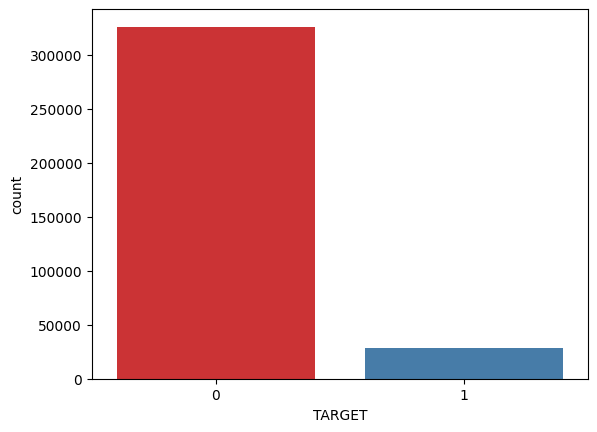

In [ ]:
# Exploring Target value


sns.countplot(x='TARGET',data=Visualize_data_df,palette='Set1')




It seems that the dataset is imbalanced.There are less customers who churn, however we need to handle this using techniques like SMOTE before training the model for better accuracy.

#Analyzing each Categorical variable separately.

In [ ]:
categorical_columns

['APP_CAR',
 'APP_COMP_TYPE',
 'APP_DRIVING_LICENSE',
 'APP_EDUCATION',
 'APP_EMP_TYPE',
 'APP_KIND_OF_PROP_HABITATION',
 'APP_MARITAL_STATUS',
 'APP_POSITION_TYPE',
 'APP_TRAVEL_PASS',
 'CLNT_JOB_POSITION',
 'CLNT_JOB_POSITION_TYPE',
 'CLNT_TRUST_RELATION',
 'PACK',
 'CR_PROD_CNT_IL',
 'CR_PROD_CNT_VCU',
 'CR_PROD_CNT_TOVR',
 'CR_PROD_CNT_PIL',
 'CR_PROD_CNT_CC',
 'CR_PROD_CNT_CCFP',
 'CNT_ACCEPTS_TK',
 'CNT_ACCEPTS_MTP']

In [ ]:
['APP_CAR',
 'APP_COMP_TYPE',
 'APP_DRIVING_LICENSE',
 'APP_EDUCATION',
 'APP_EMP_TYPE',
 'APP_KIND_OF_PROP_HABITATION',
 'APP_MARITAL_STATUS',
 'APP_POSITION_TYPE',
 'APP_TRAVEL_PASS',
 'CLNT_JOB_POSITION_TYPE',
 'PACK']

['APP_CAR',
 'APP_COMP_TYPE',
 'APP_DRIVING_LICENSE',
 'APP_EDUCATION',
 'APP_EMP_TYPE',
 'APP_KIND_OF_PROP_HABITATION',
 'APP_MARITAL_STATUS',
 'APP_POSITION_TYPE',
 'APP_TRAVEL_PASS',
 'CLNT_JOB_POSITION_TYPE',
 'PACK']

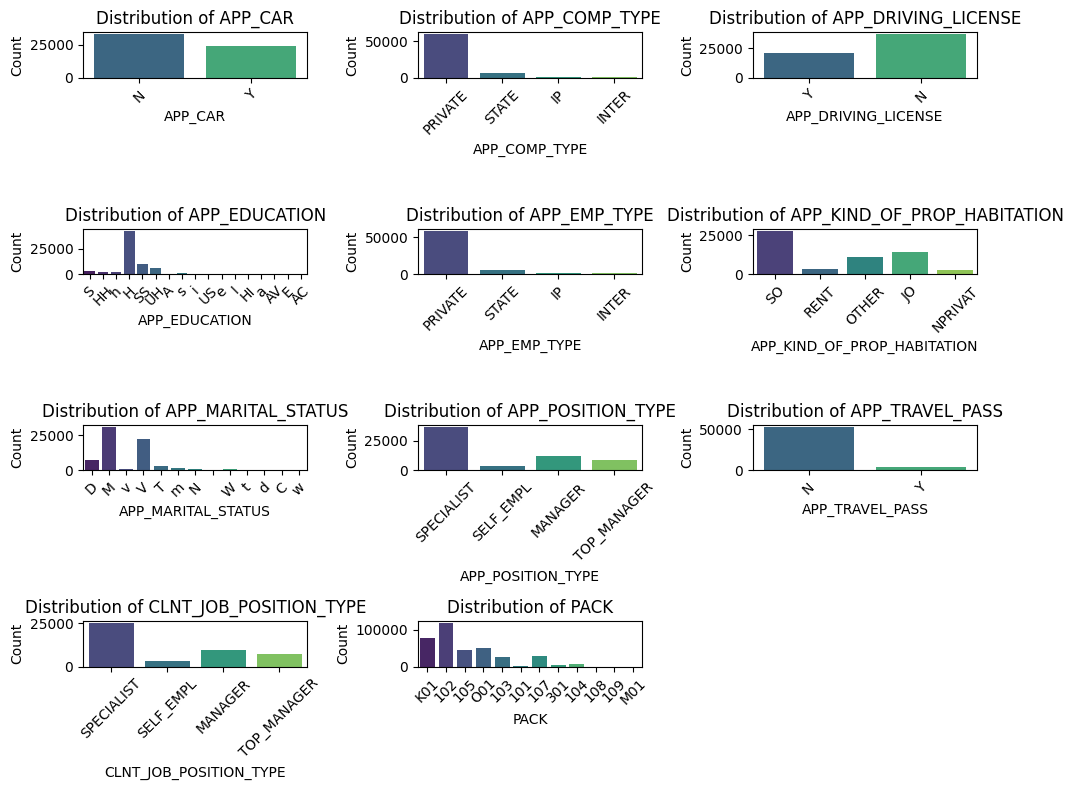

In [ ]:

categorical_columns_to_plot = [
    'APP_CAR', 'APP_COMP_TYPE', 'APP_DRIVING_LICENSE', 'APP_EDUCATION',
    'APP_EMP_TYPE', 'APP_KIND_OF_PROP_HABITATION', 'APP_MARITAL_STATUS',
    'APP_POSITION_TYPE', 'APP_TRAVEL_PASS', 'CLNT_JOB_POSITION_TYPE', 'PACK'
]


num_vars = len(categorical_columns_to_plot)
num_cols = 3
num_rows = math.ceil(num_vars / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))
axes = axes.flatten()

for idx, column in enumerate(categorical_columns_to_plot):
    sns.countplot(data=categorical_df_visualize, x=column, ax=axes[idx], palette="viridis")
    axes[idx].set_title(f'Distribution of {column}')
    axes[idx].set_xlabel(column)
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', rotation=45)

# removing any empty subplots
for ax in axes[num_vars:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()


**Insights**

1. Majority customers have no driving license and as well as no car and no international passport.

2. Most customers are working a private job for a private employer. The columns APP_COMP_TYPE and APP_EMP_TYPE represent same information. So, we will remove **APP_EMP_TYPE** column(type of employer because they also have 80% missing values)

3. **APP_POSITION_TYPE** and CLNT_JOB_POSITION_TYPE represent same thing like job position type of customer. Most customers are in specialist positions.

4. Service package 102 is being used by majority customers. We do not know for sure what service package represents what.

5. There are more married people and high school customers for the bank and there are more customers living in a solo ownership(own houses).

In [ ]:
# run this cell only once
columns_that_can_be_removed.extend(['APP_EMP_TYPE', 'APP_POSITION_TYPE'])

In [ ]:
columns_that_can_be_removed

['ID',
 'CLNT_JOB_POSITION',
 'PRC_ACCEPTS_A_EMAIL_LINK',
 'PRC_ACCEPTS_A_POS',
 'PRC_ACCEPTS_A_TK',
 'PRC_ACCEPTS_A_AMOBILE',
 'PRC_ACCEPTS_A_MTP',
 'PRC_ACCEPTS_A_ATM',
 'PRC_ACCEPTS_MTP',
 'PRC_ACCEPTS_TK',
 'CLNT_JOB_POSITION',
 'APP_EMP_TYPE',
 'APP_POSITION_TYPE']

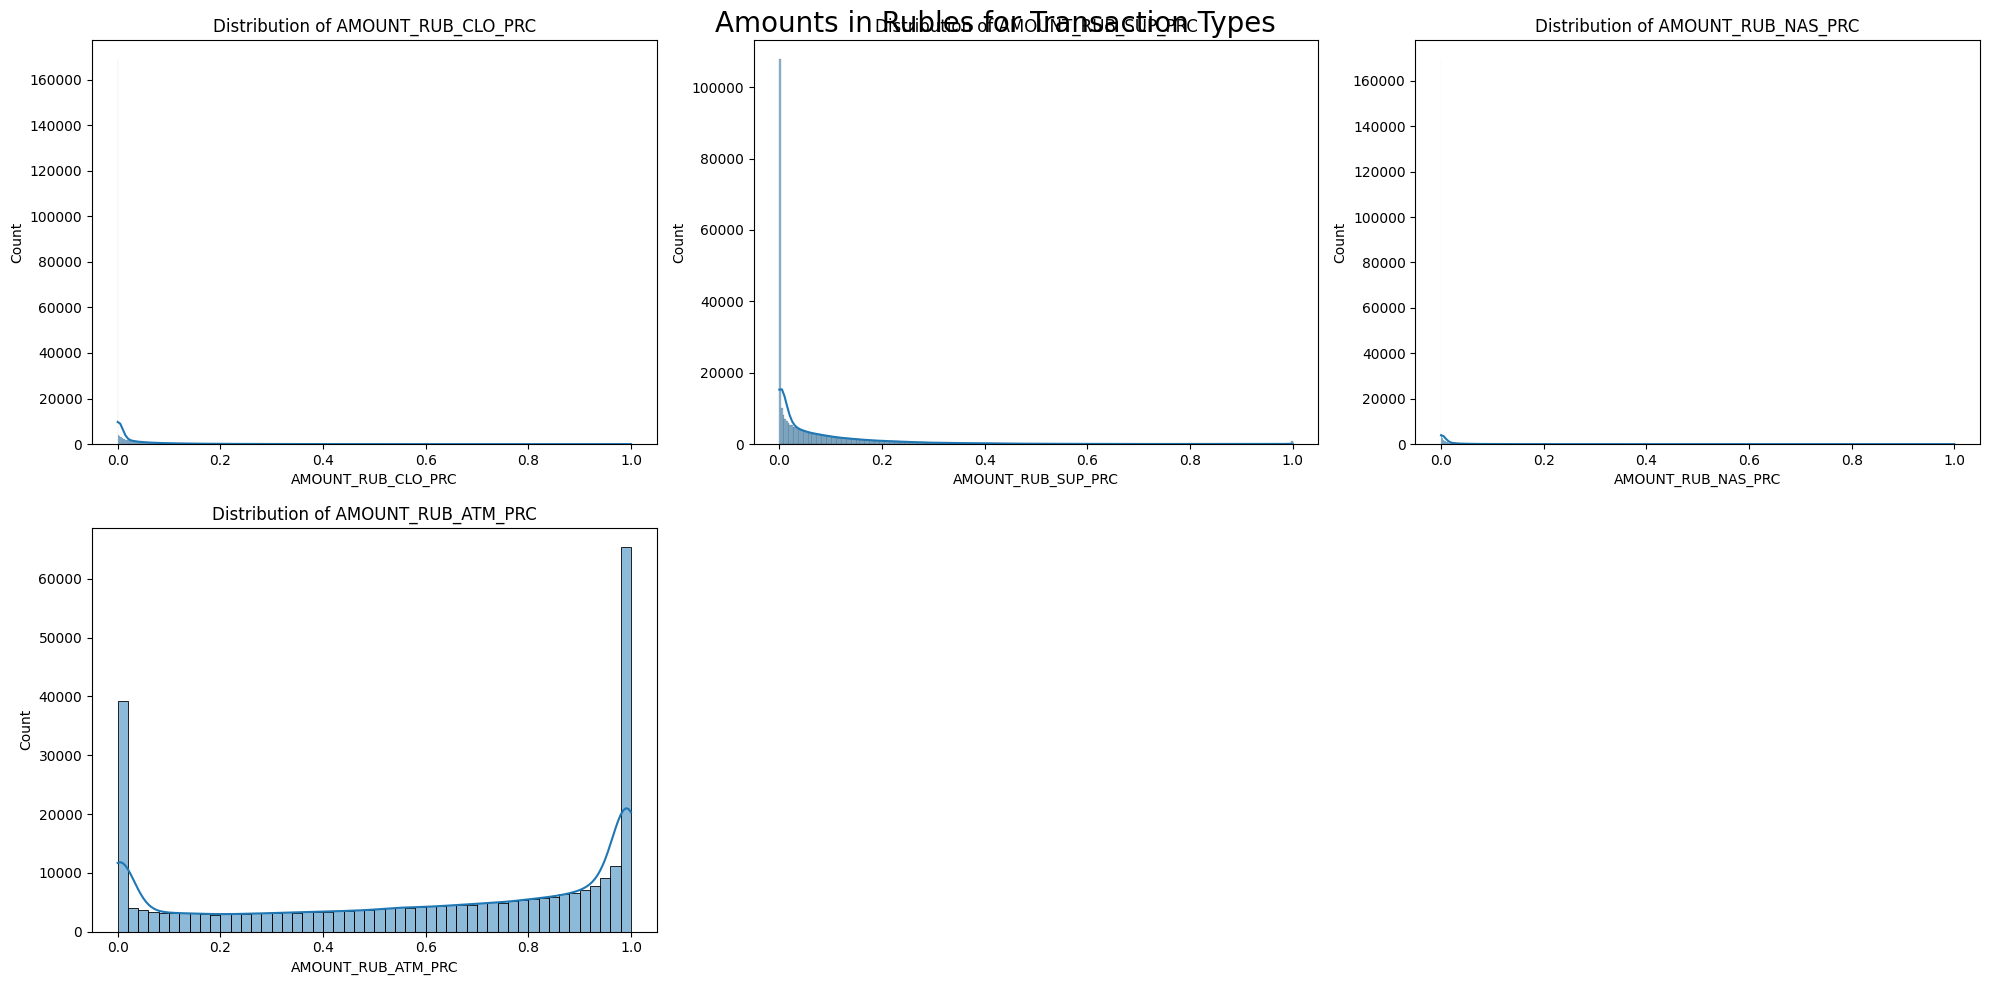

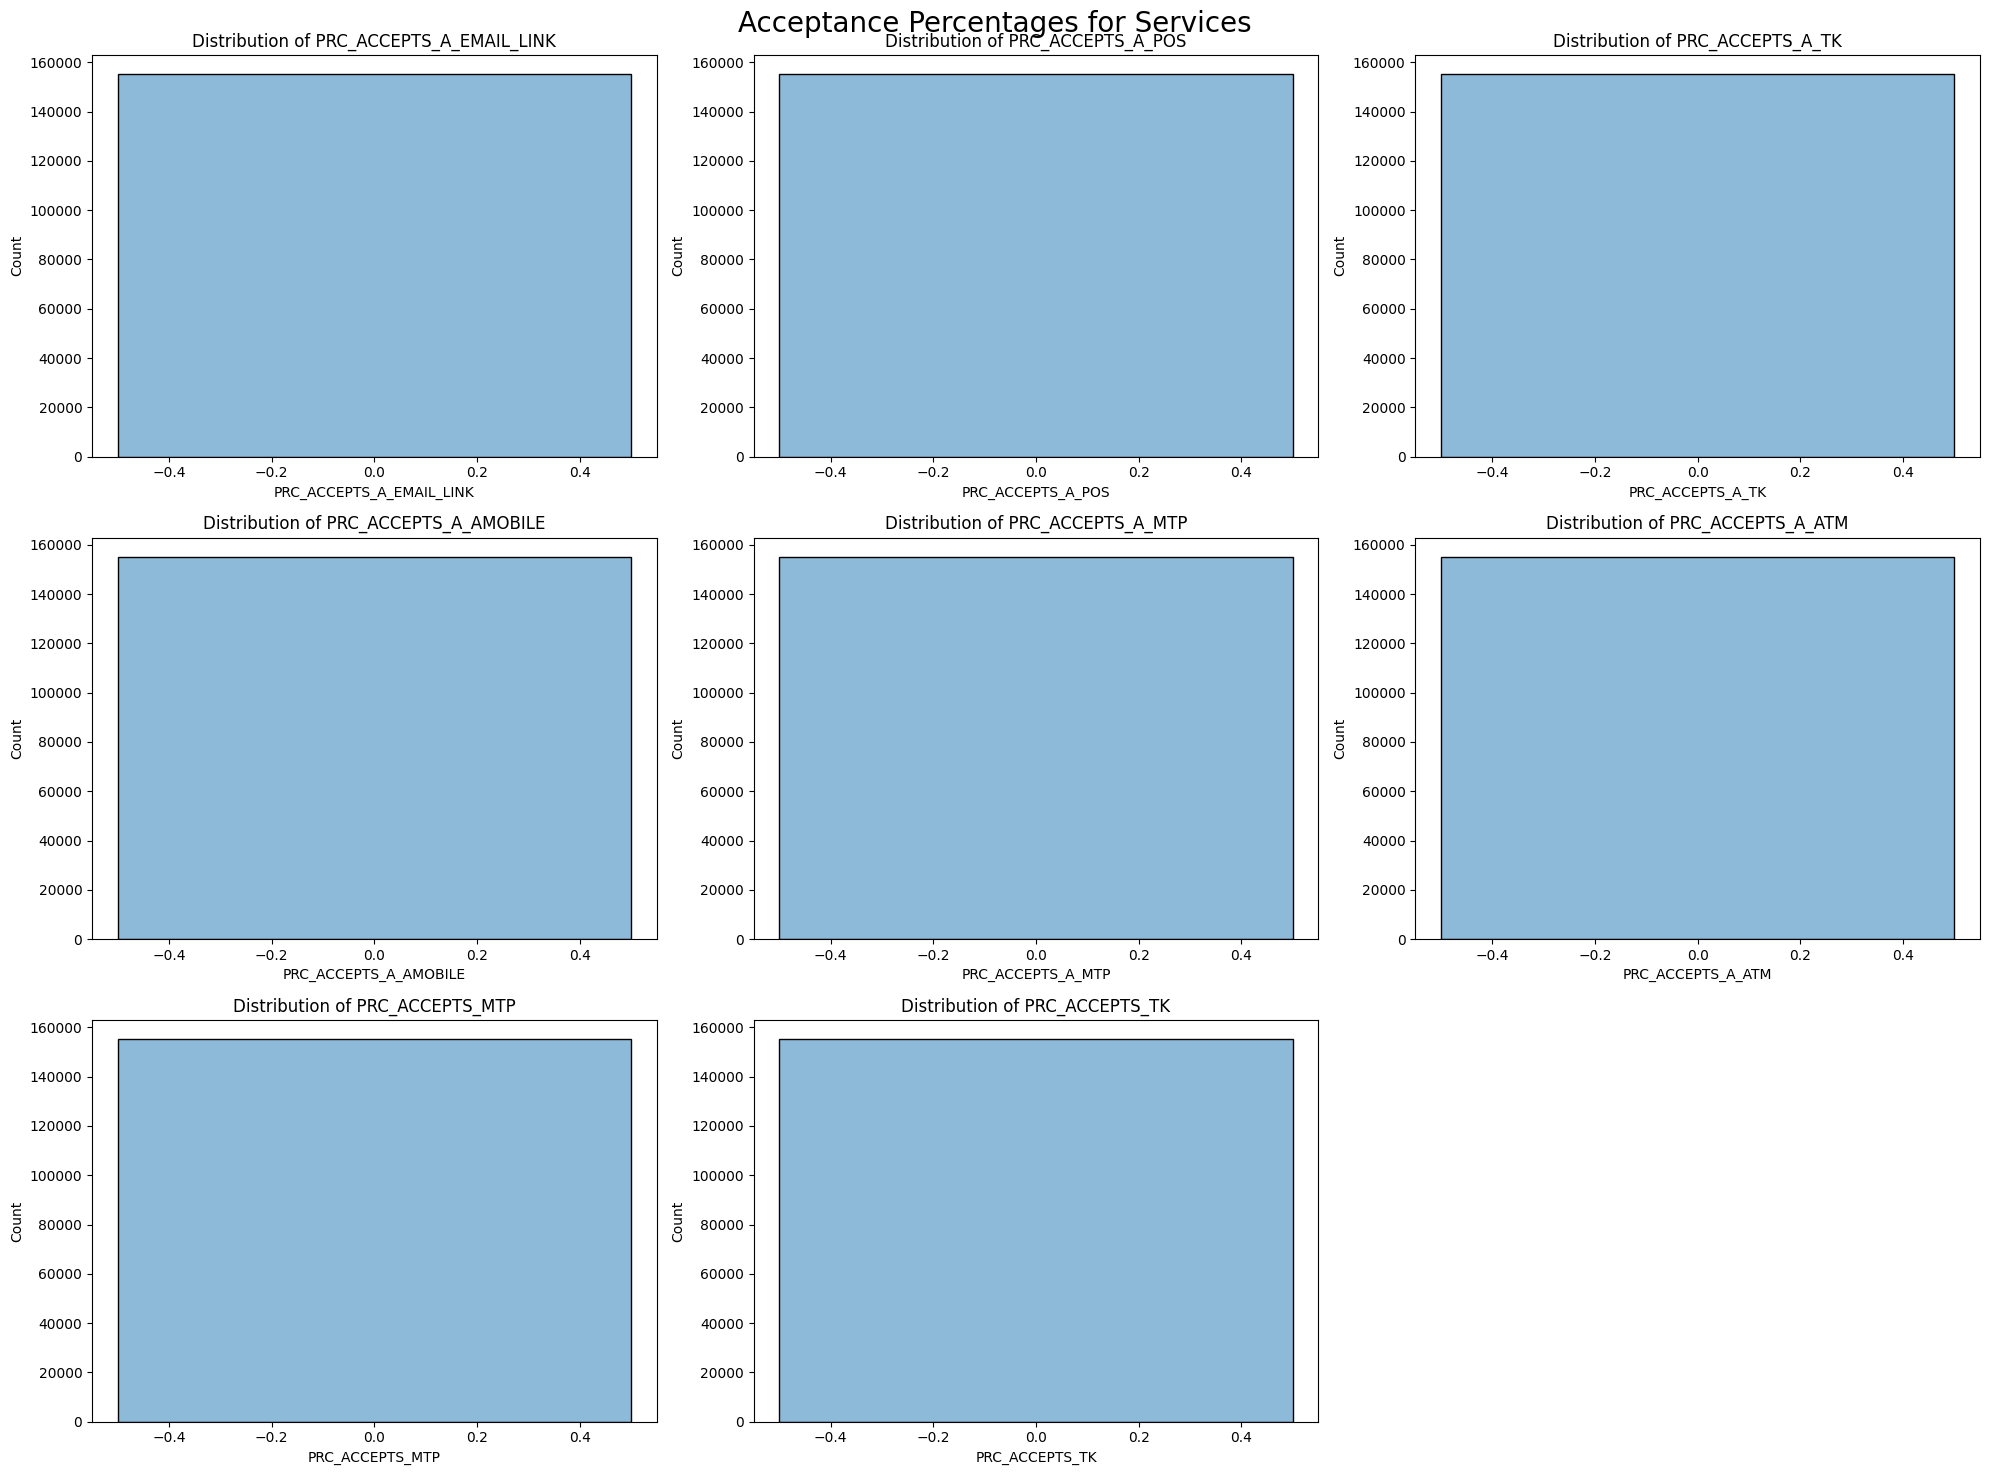

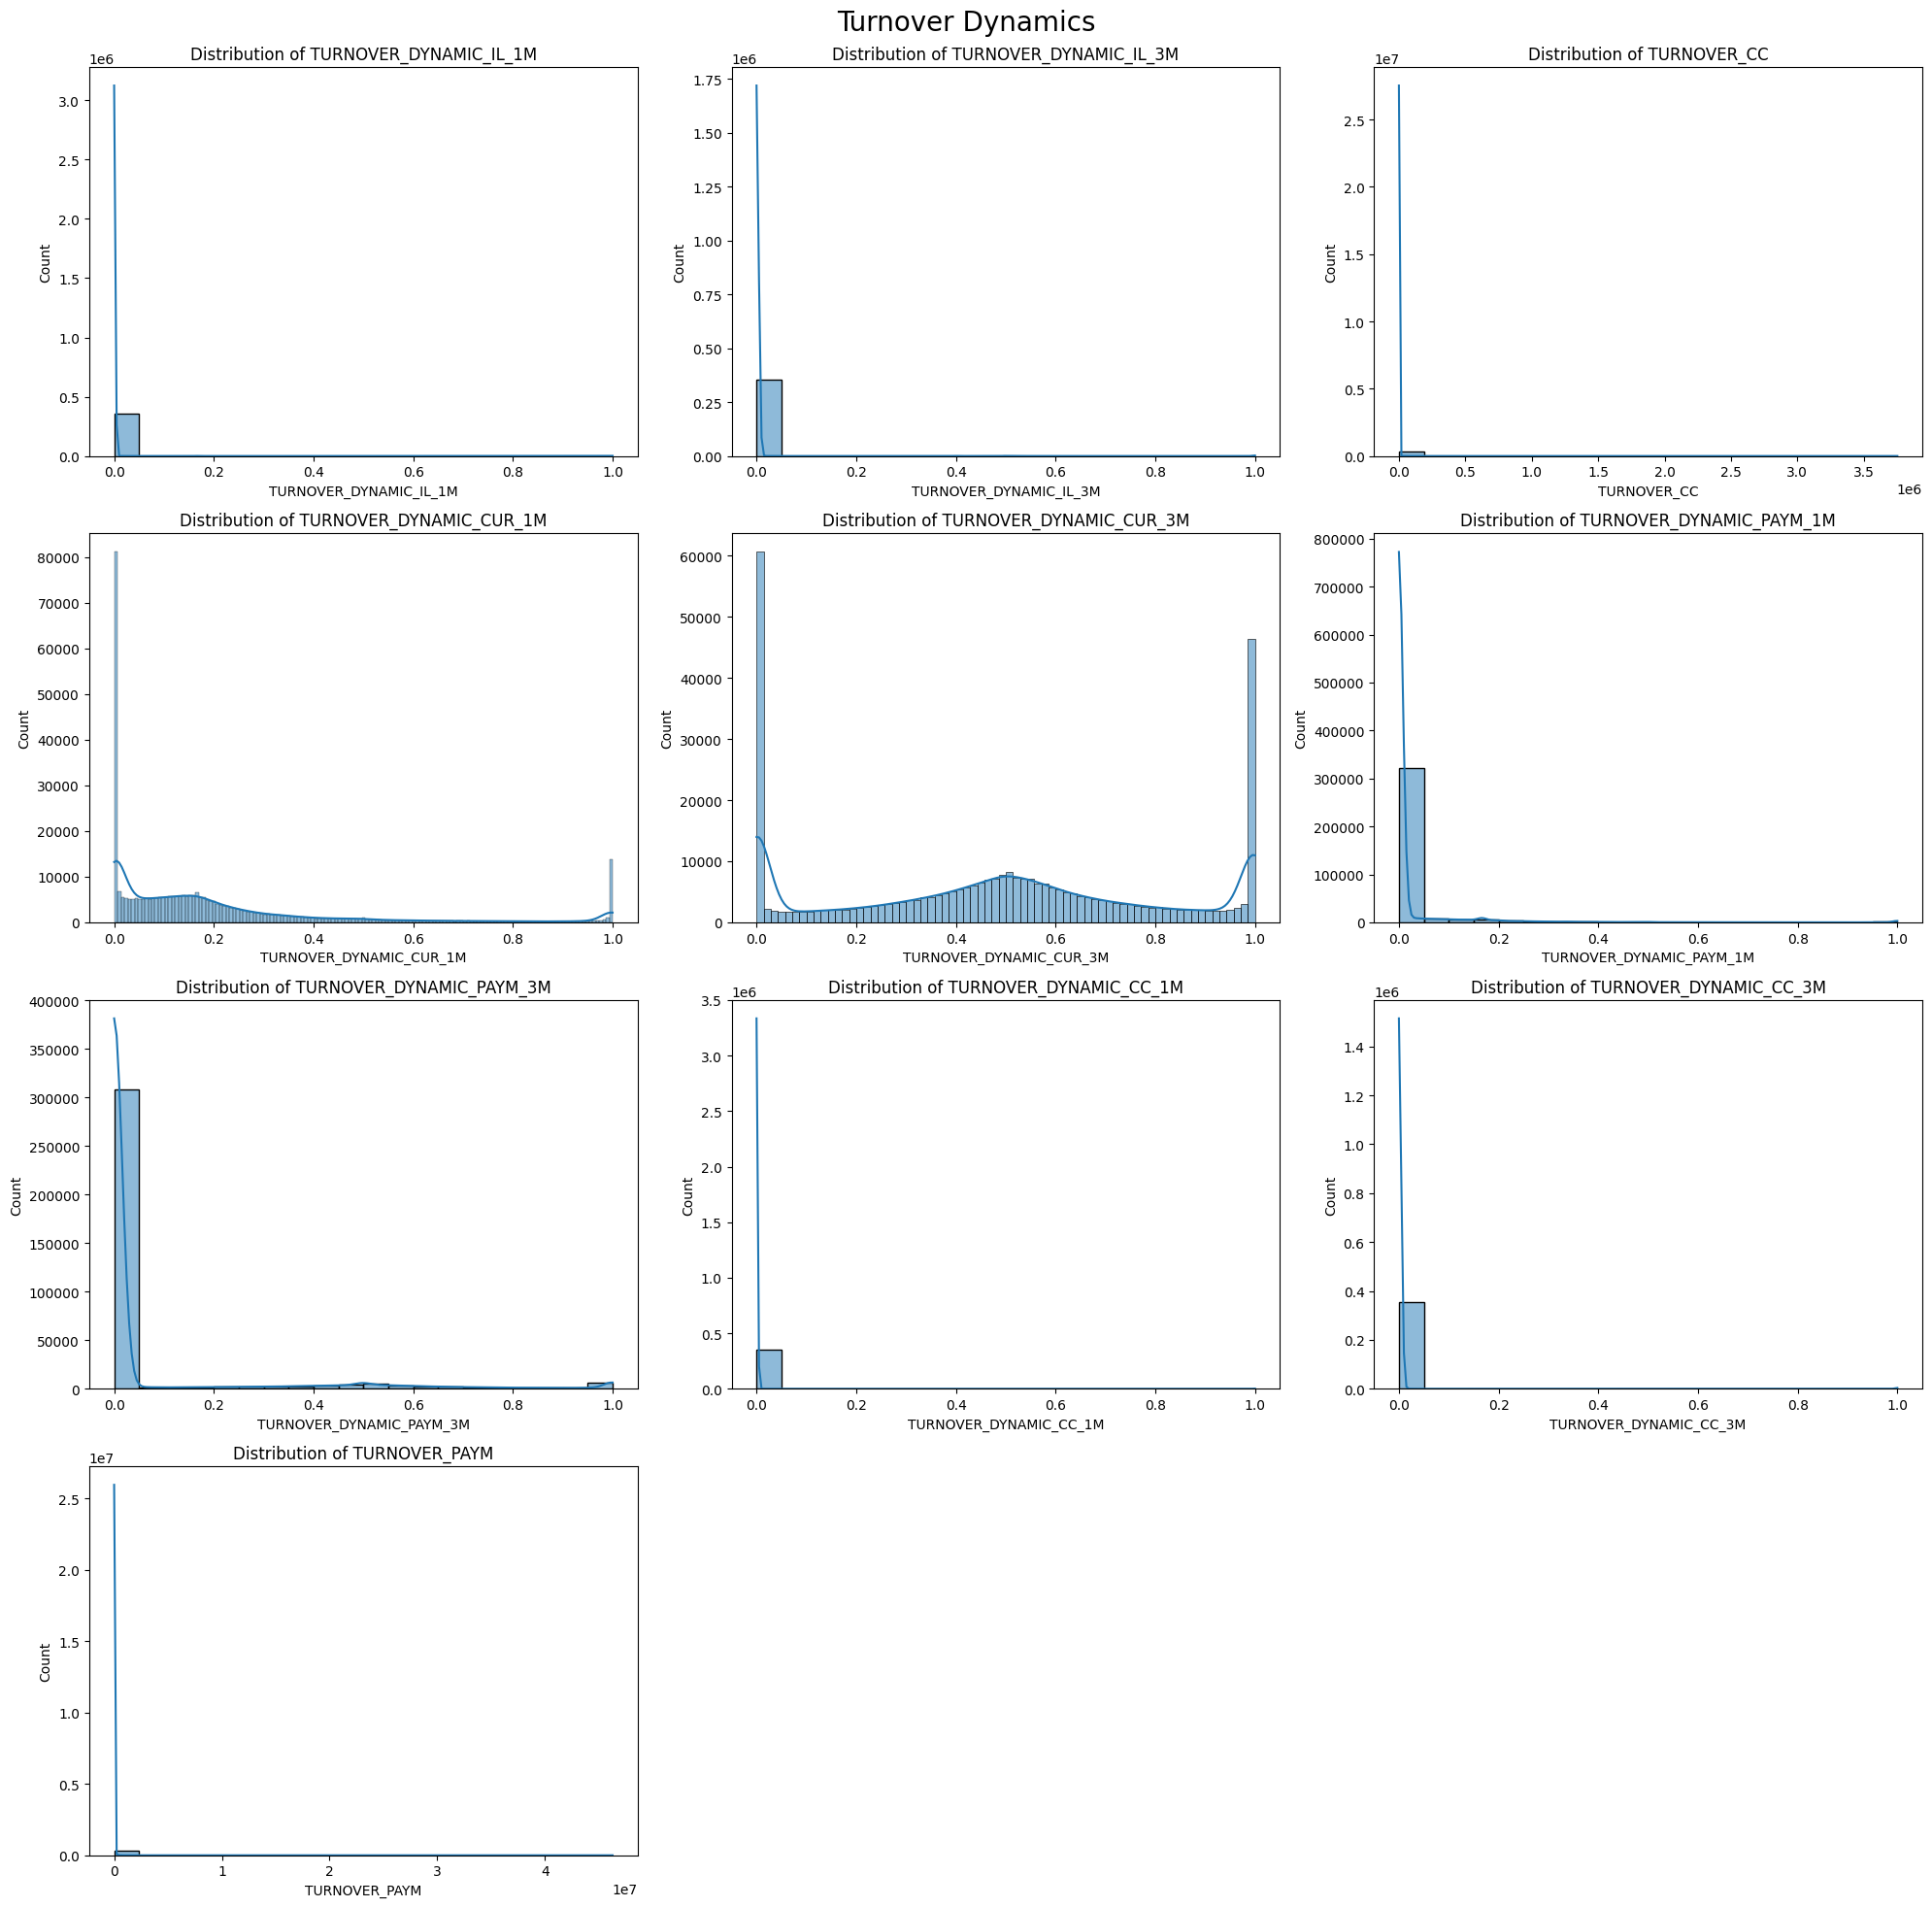

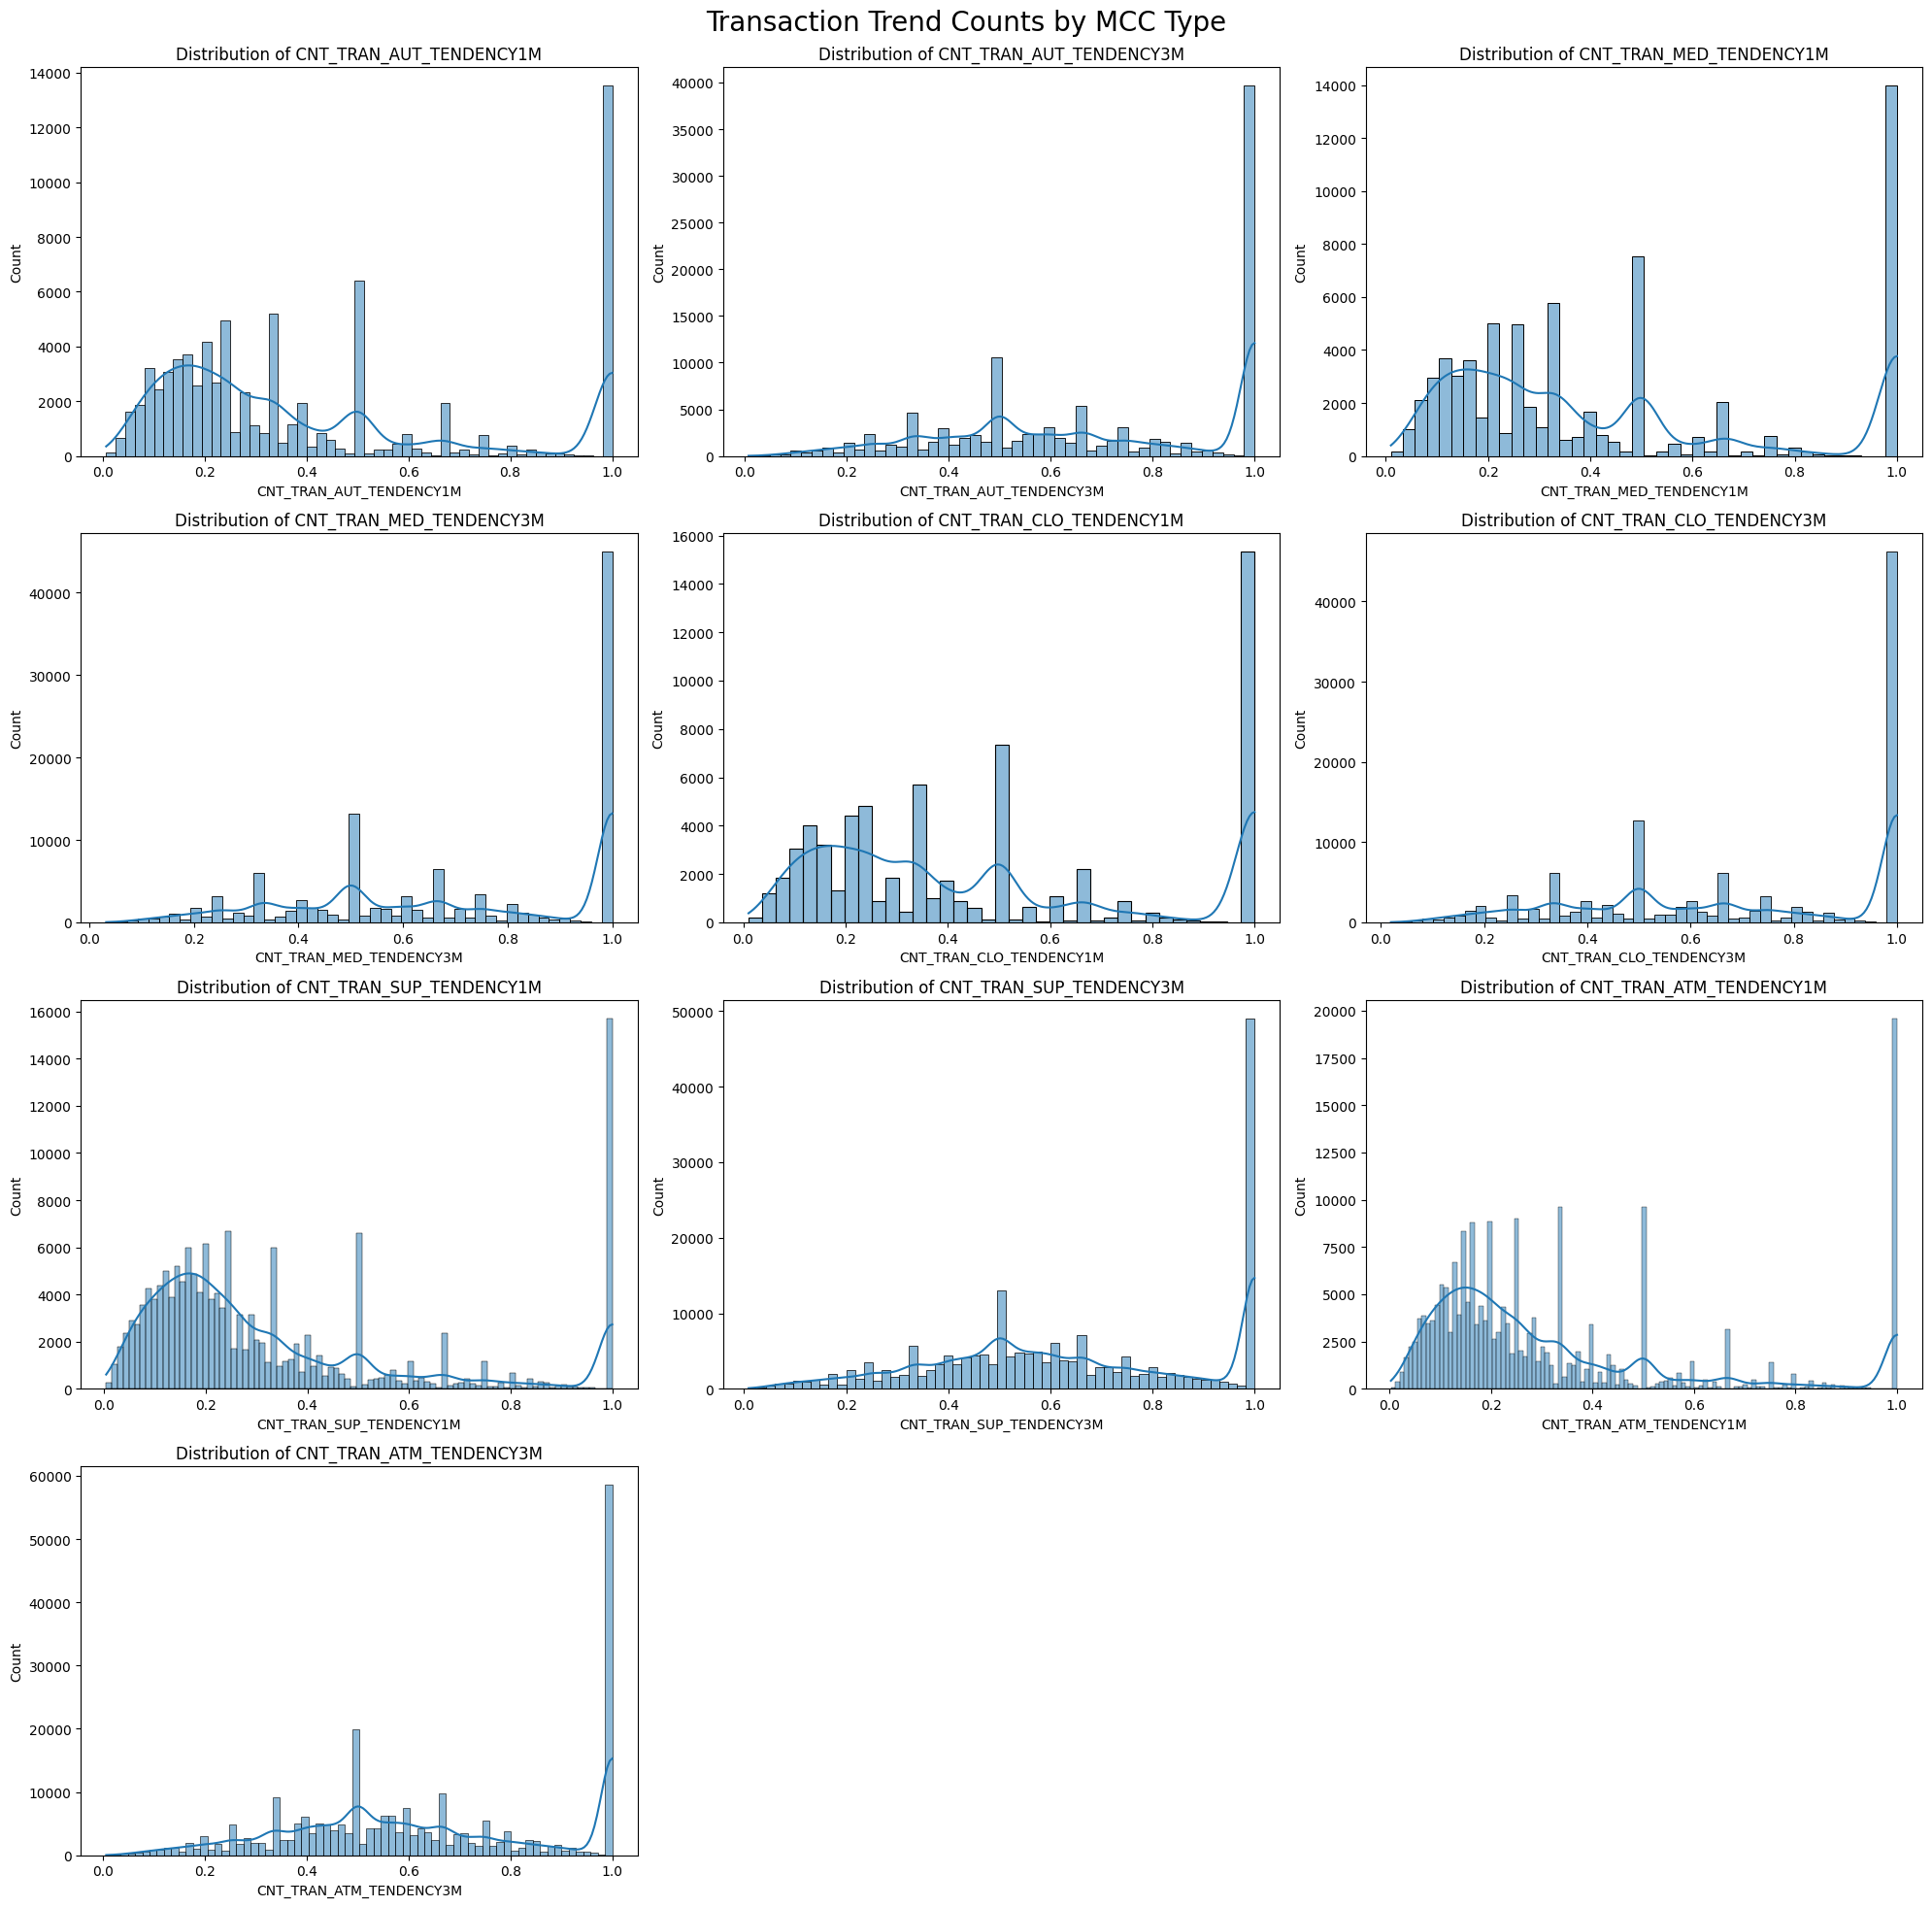

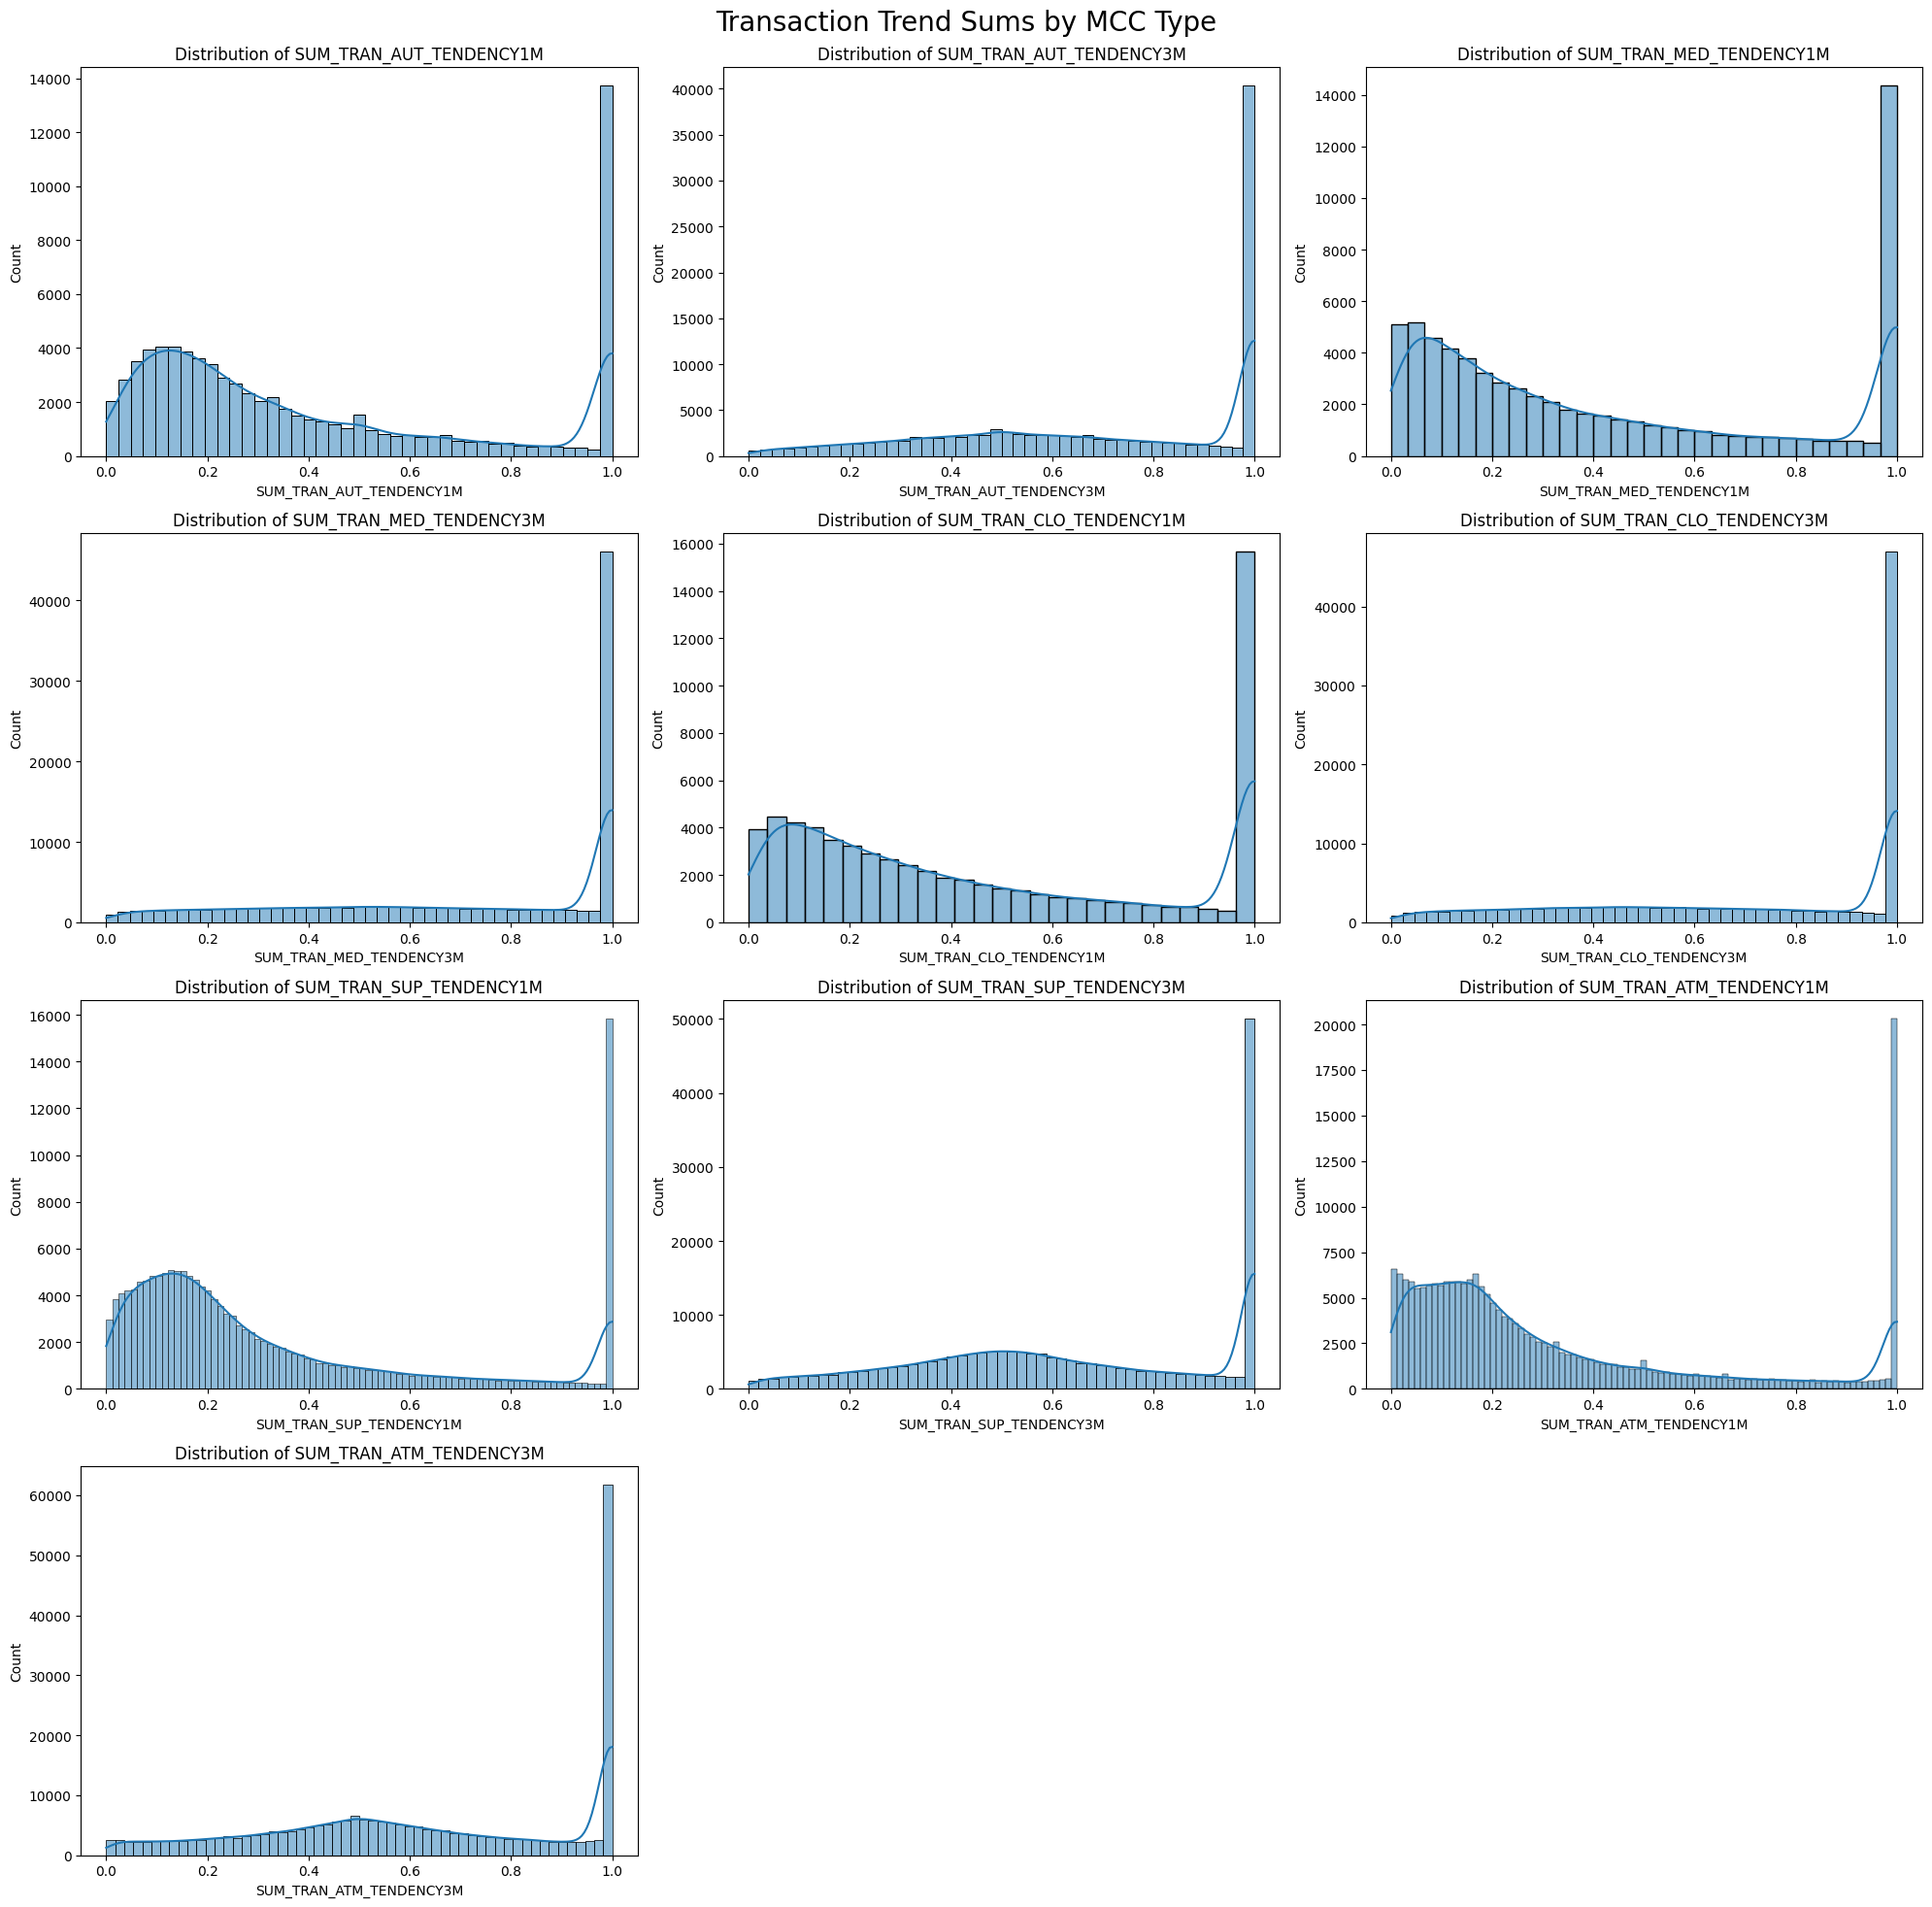

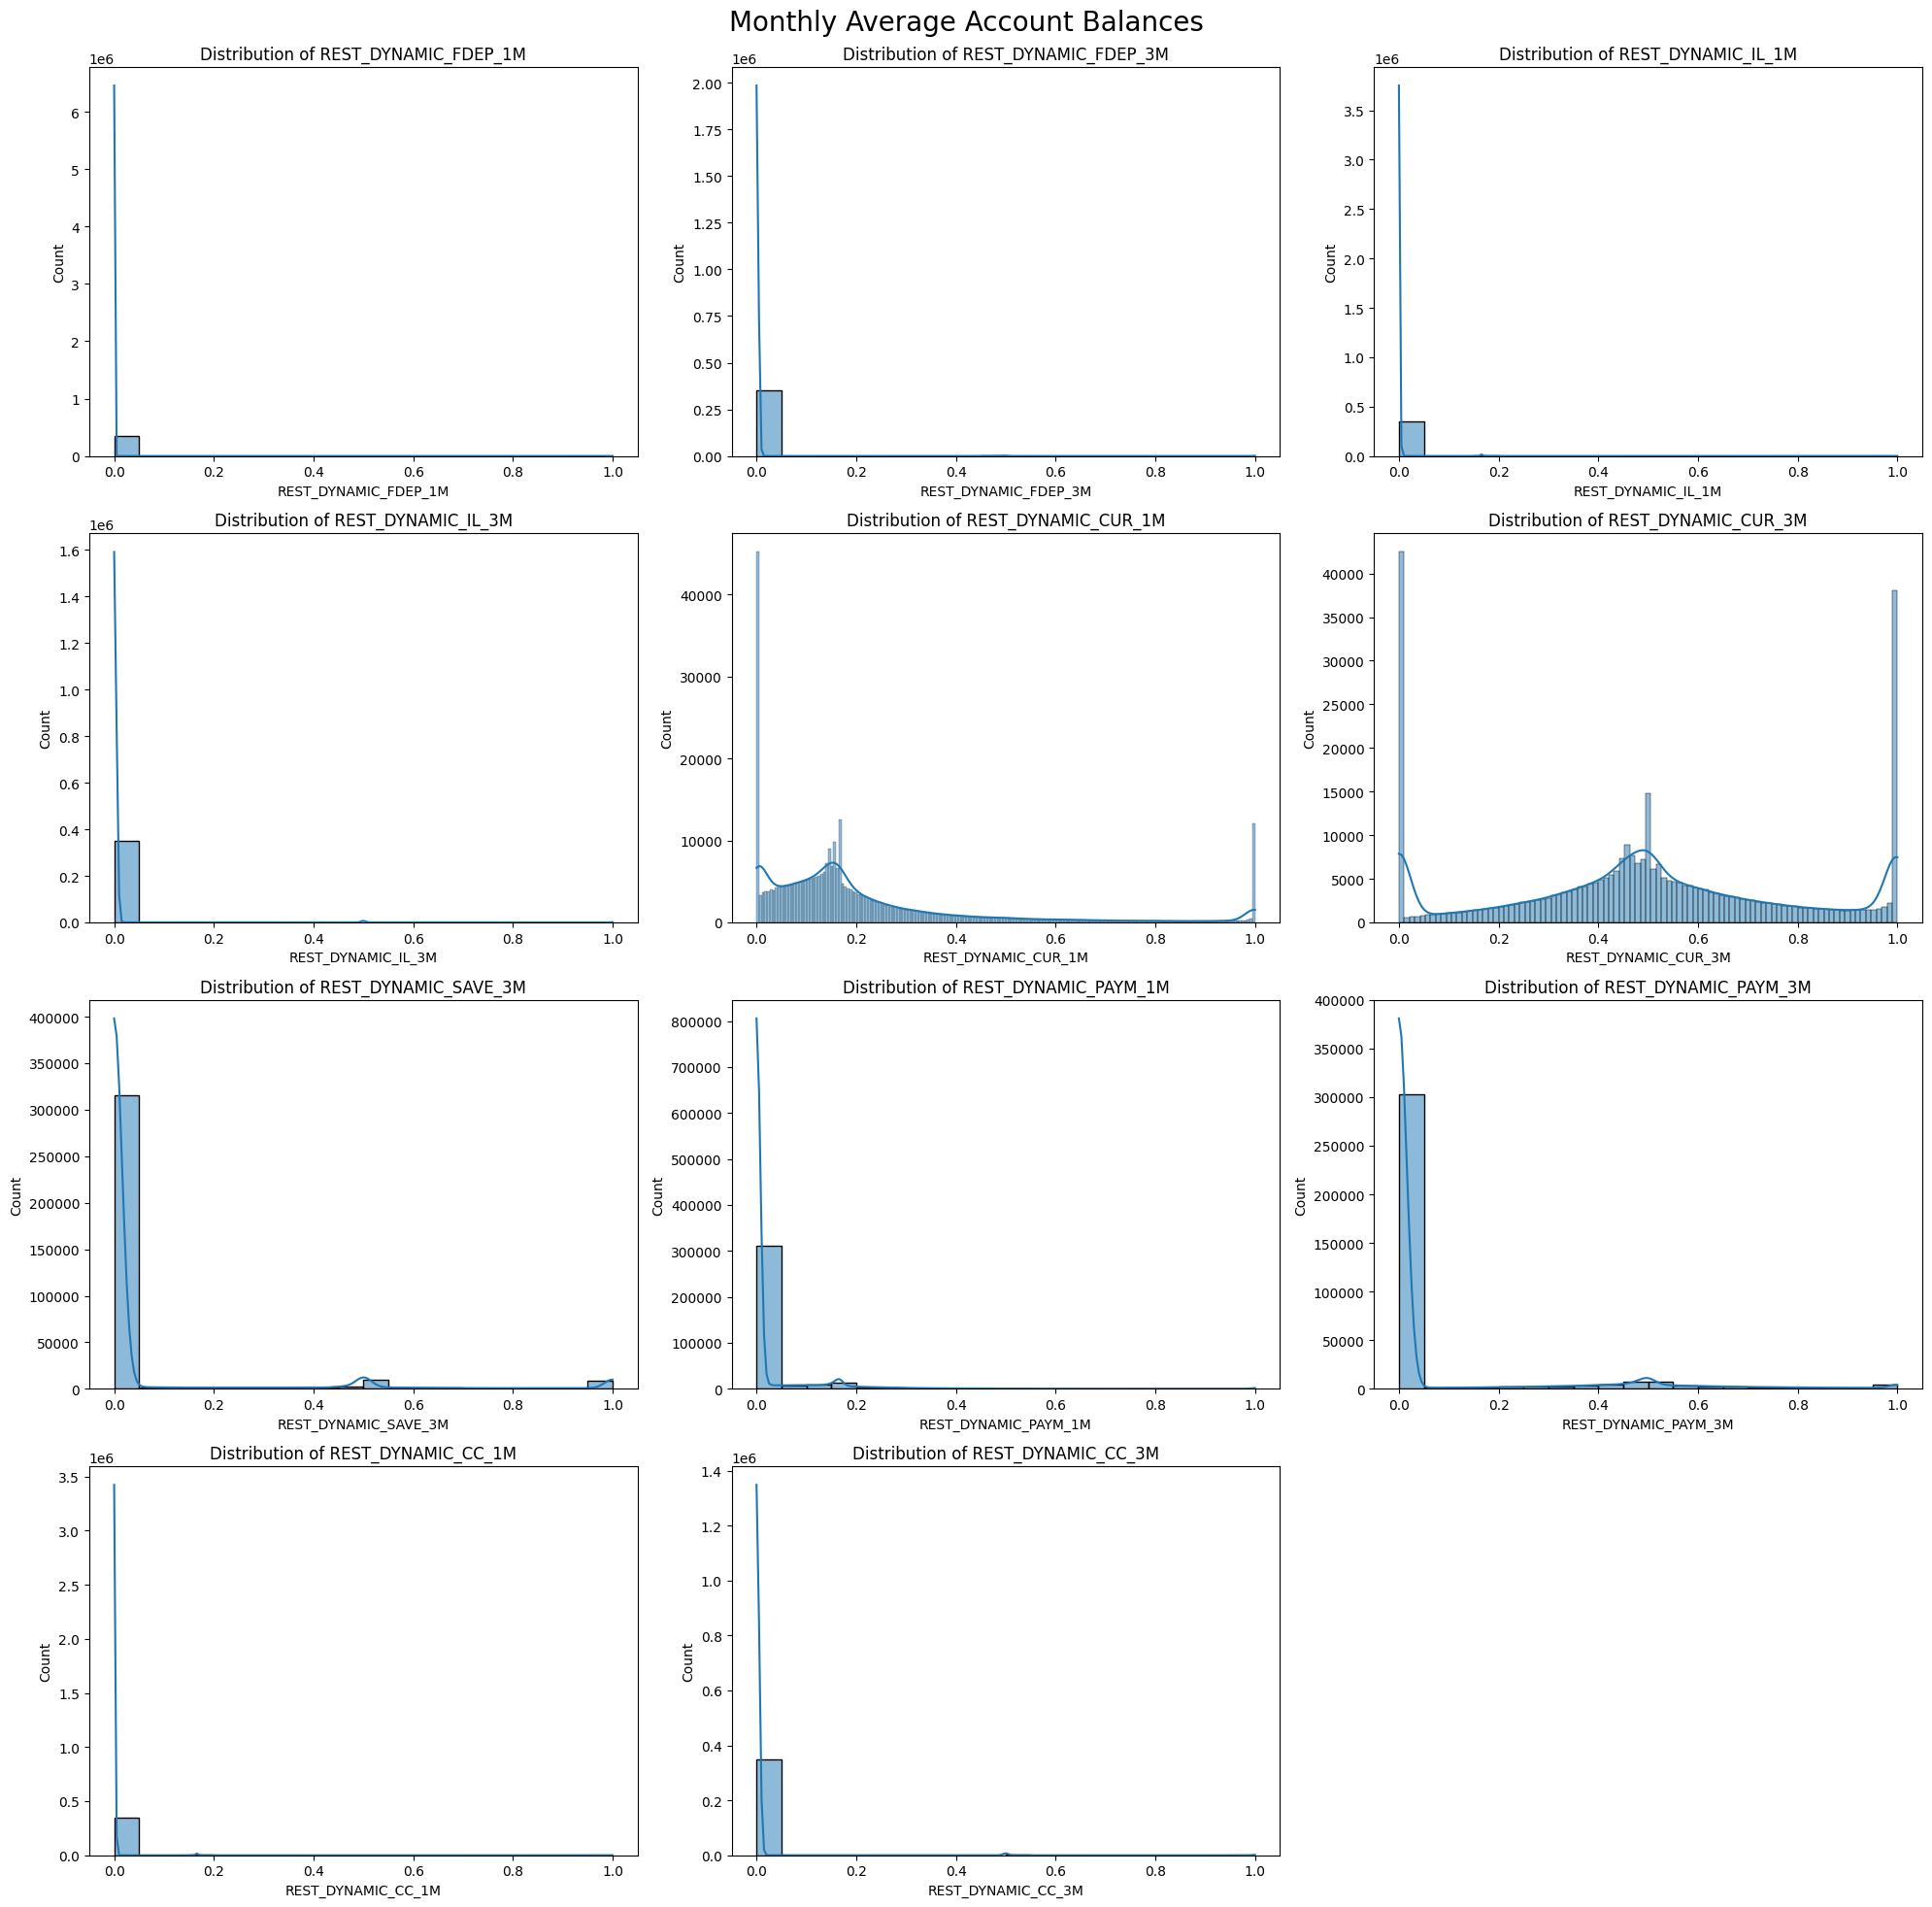

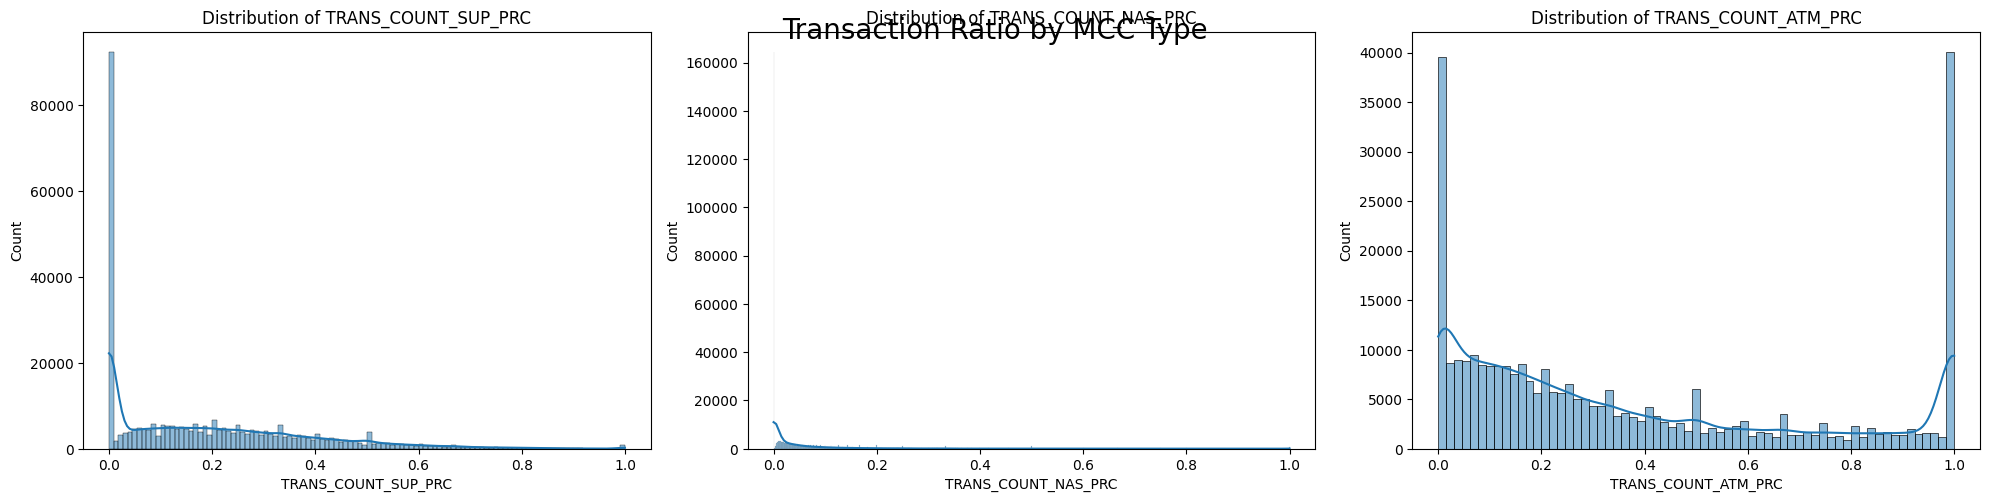

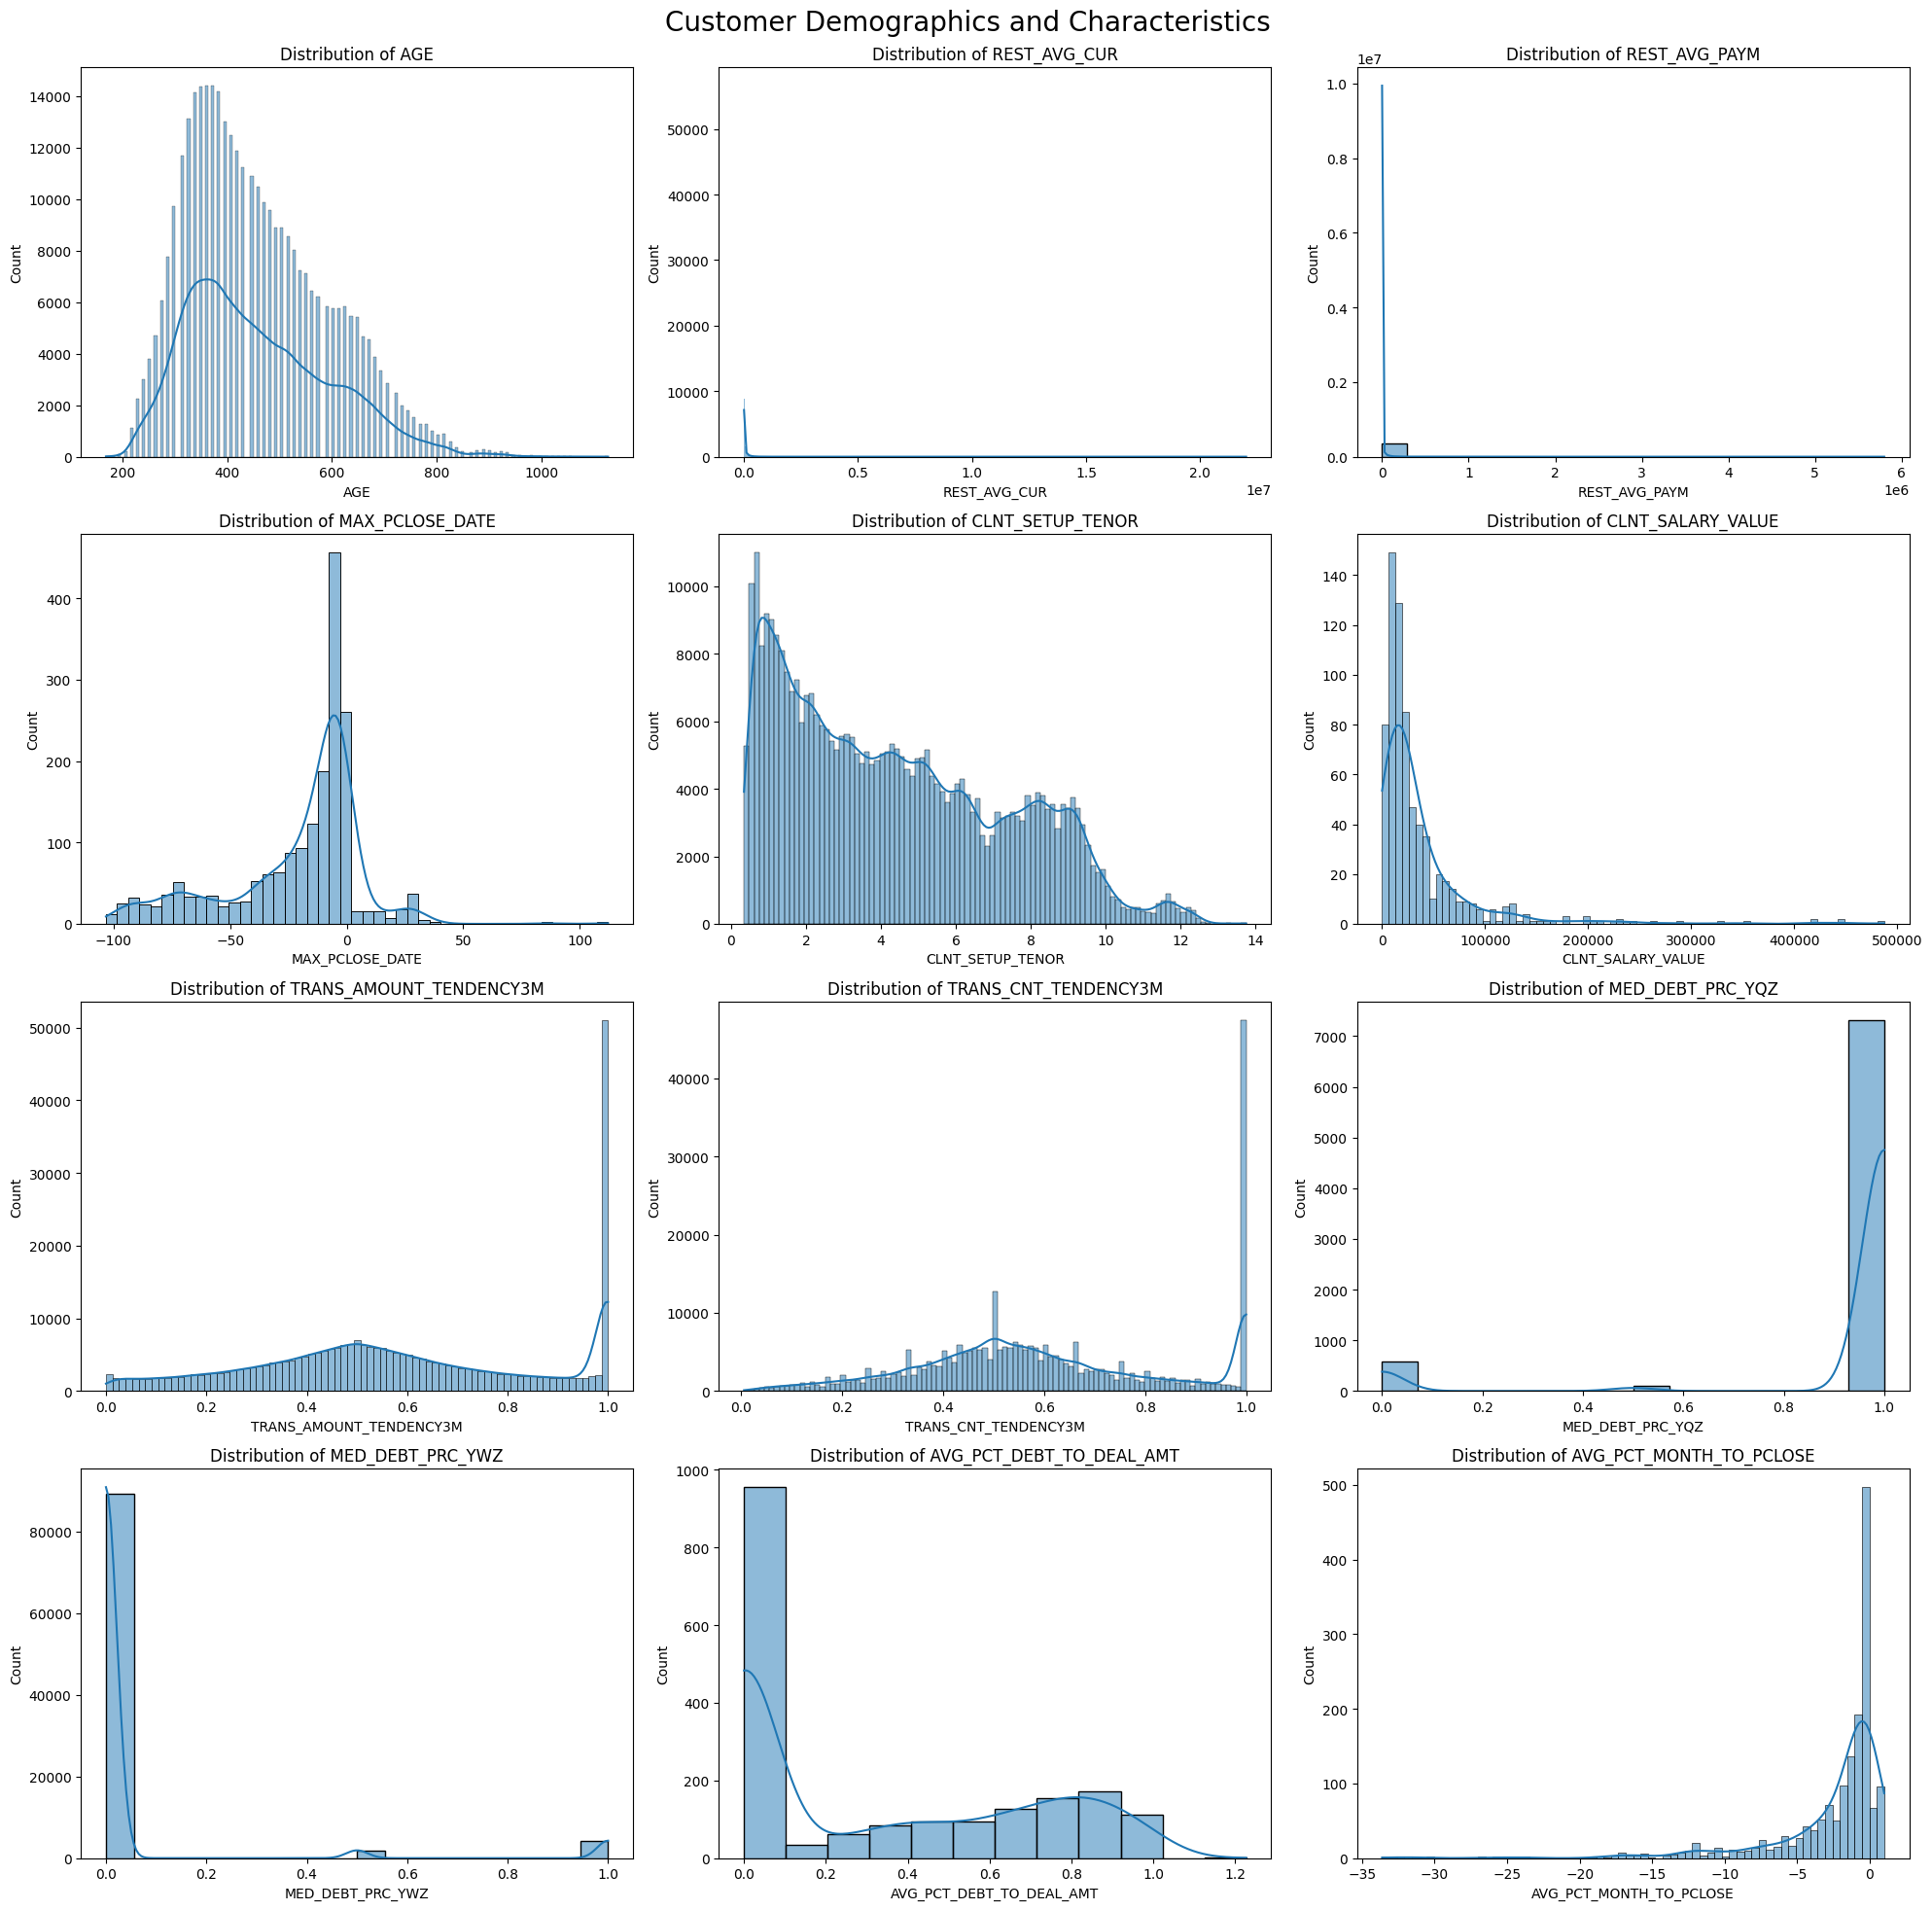

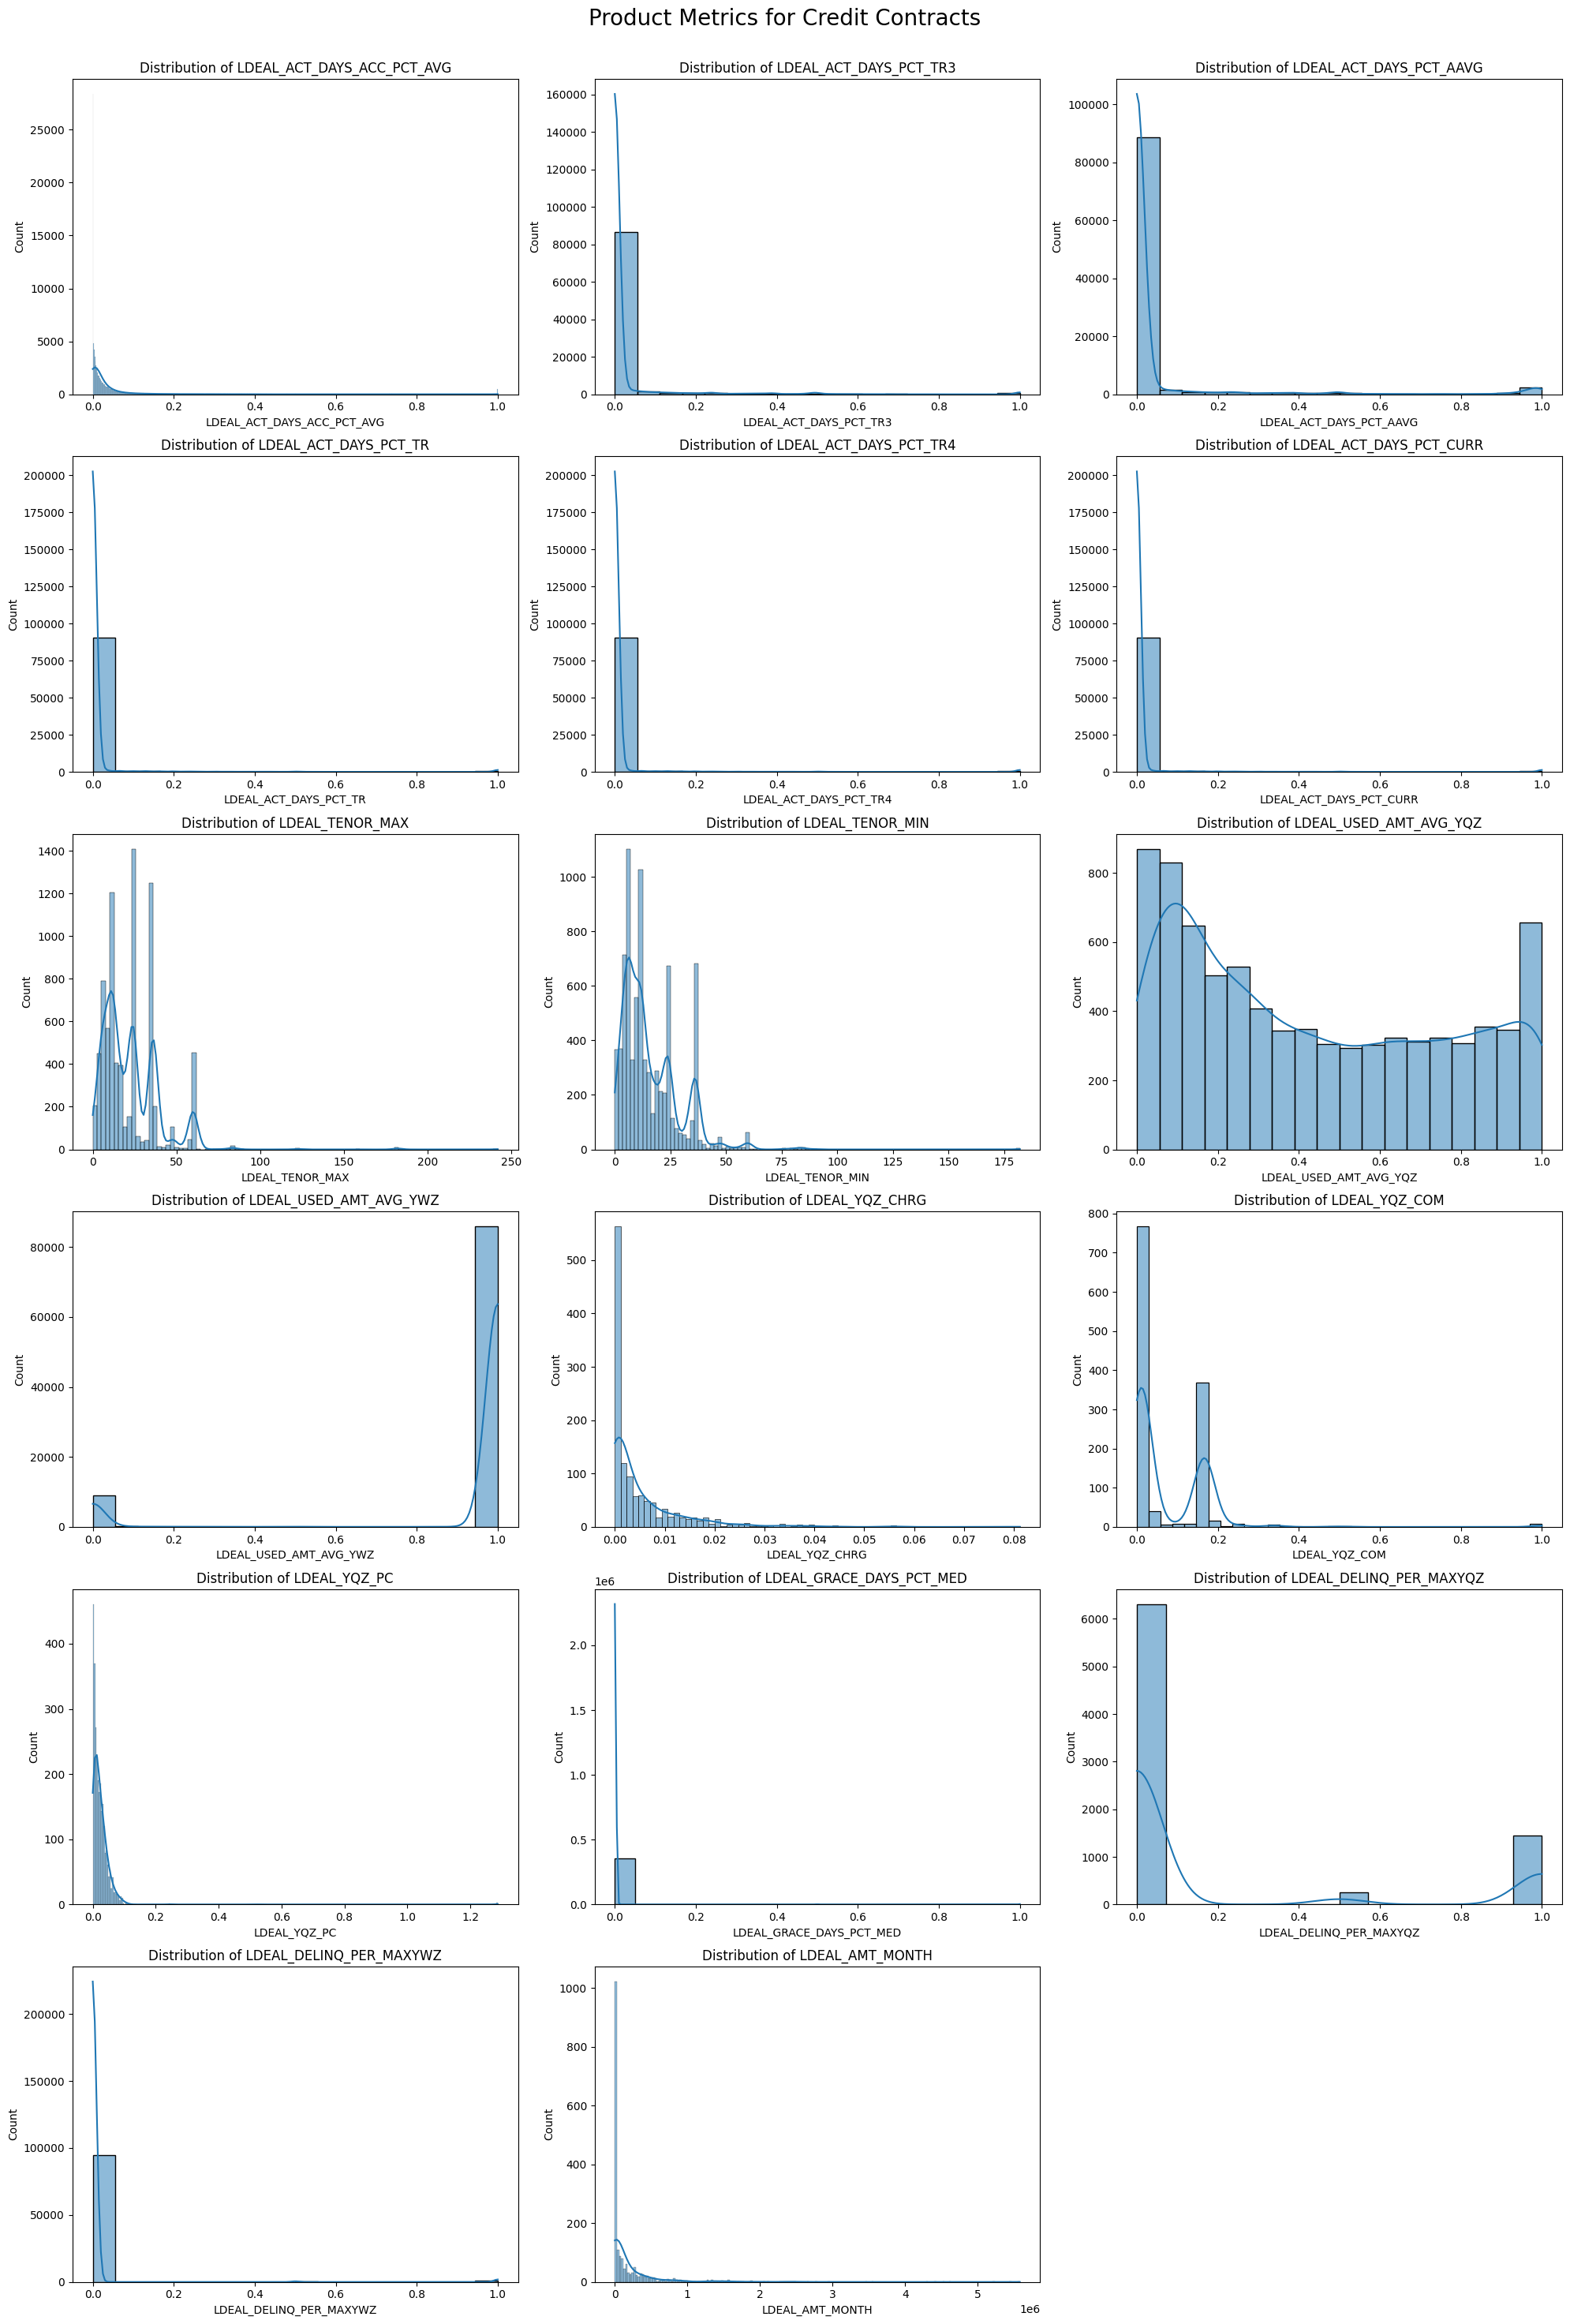

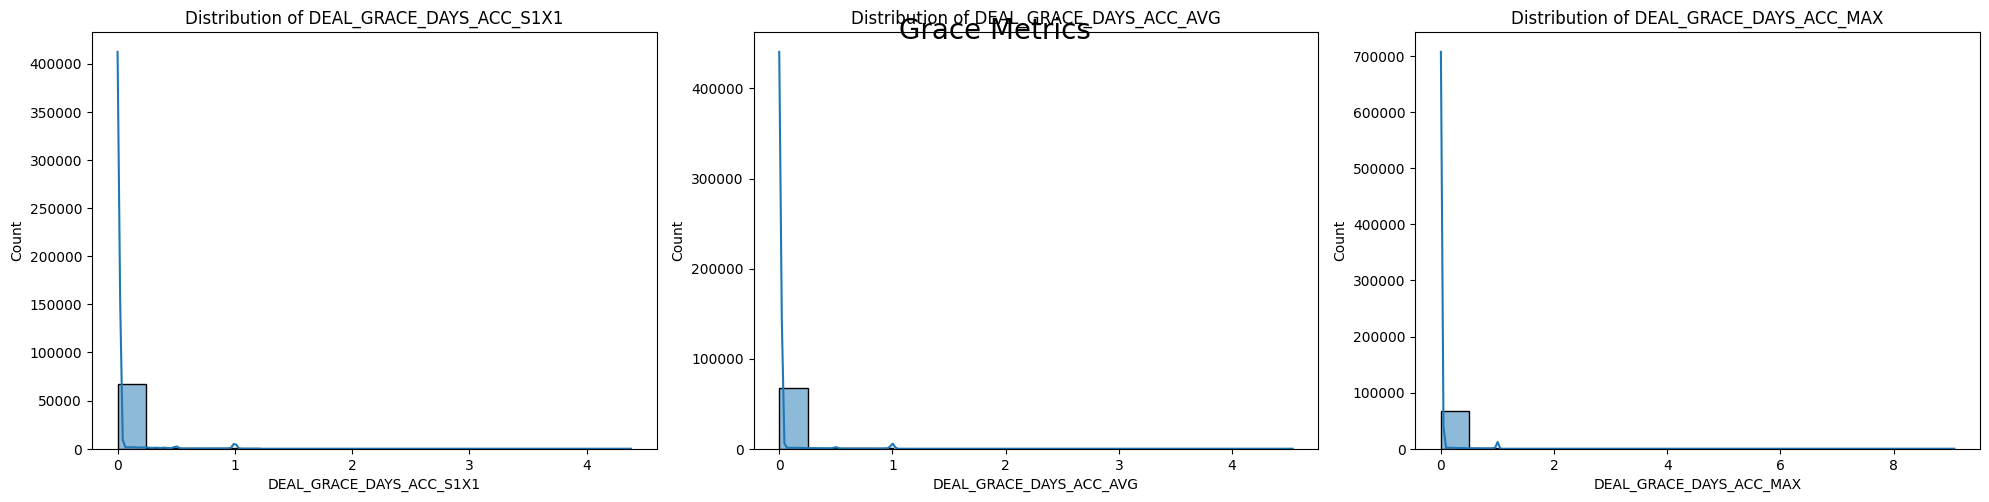

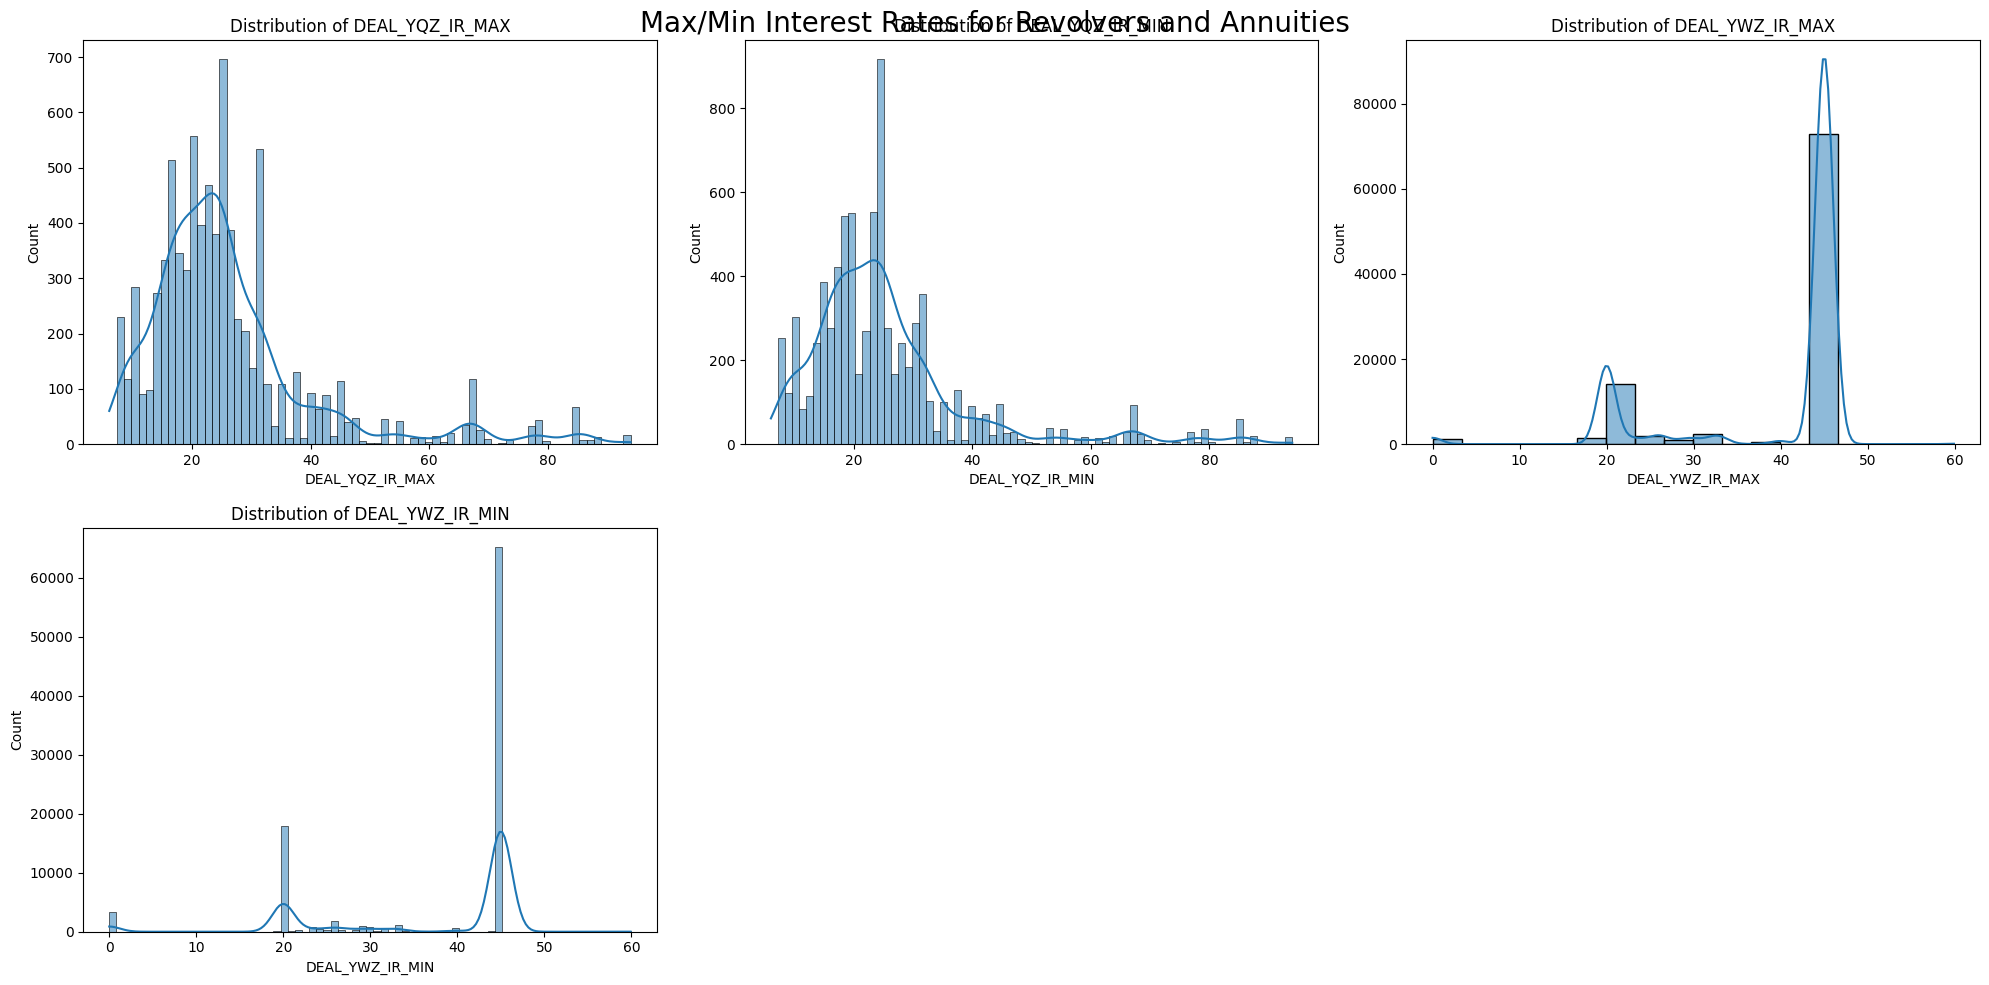

In [ ]:
# plotting all numerical variables
amounts_rub_transaction_types = [
    'AMOUNT_RUB_CLO_PRC', 'AMOUNT_RUB_SUP_PRC',
    'AMOUNT_RUB_NAS_PRC', 'AMOUNT_RUB_ATM_PRC'
]



turnover_dynamics = [
    'TURNOVER_DYNAMIC_IL_1M', 'TURNOVER_DYNAMIC_IL_3M', 'TURNOVER_CC',
    'TURNOVER_DYNAMIC_CUR_1M', 'TURNOVER_DYNAMIC_CUR_3M',
    'TURNOVER_DYNAMIC_PAYM_1M', 'TURNOVER_DYNAMIC_PAYM_3M',
    'TURNOVER_DYNAMIC_CC_1M', 'TURNOVER_DYNAMIC_CC_3M', 'TURNOVER_PAYM'
]

transaction_trend_counts = [
    'CNT_TRAN_AUT_TENDENCY1M', 'CNT_TRAN_AUT_TENDENCY3M',
    'CNT_TRAN_MED_TENDENCY1M', 'CNT_TRAN_MED_TENDENCY3M',
    'CNT_TRAN_CLO_TENDENCY1M', 'CNT_TRAN_CLO_TENDENCY3M',
    'CNT_TRAN_SUP_TENDENCY1M', 'CNT_TRAN_SUP_TENDENCY3M',
    'CNT_TRAN_ATM_TENDENCY1M', 'CNT_TRAN_ATM_TENDENCY3M'
]

transaction_trend_sums_per_MCC = [
    'SUM_TRAN_AUT_TENDENCY1M', 'SUM_TRAN_AUT_TENDENCY3M',
    'SUM_TRAN_MED_TENDENCY1M', 'SUM_TRAN_MED_TENDENCY3M',
    'SUM_TRAN_CLO_TENDENCY1M', 'SUM_TRAN_CLO_TENDENCY3M',
    'SUM_TRAN_SUP_TENDENCY1M', 'SUM_TRAN_SUP_TENDENCY3M',
    'SUM_TRAN_ATM_TENDENCY1M', 'SUM_TRAN_ATM_TENDENCY3M'
]

monthly_avg_balances_per_products = [
    'REST_DYNAMIC_FDEP_1M', 'REST_DYNAMIC_FDEP_3M',
    'REST_DYNAMIC_IL_1M', 'REST_DYNAMIC_IL_3M',
    'REST_DYNAMIC_CUR_1M', 'REST_DYNAMIC_CUR_3M',
    'REST_DYNAMIC_SAVE_3M', 'REST_DYNAMIC_PAYM_1M',
    'REST_DYNAMIC_PAYM_3M', 'REST_DYNAMIC_CC_1M',
    'REST_DYNAMIC_CC_3M'
]

transaction_ratio_mcc = [
    'TRANS_COUNT_SUP_PRC', 'TRANS_COUNT_NAS_PRC', 'TRANS_COUNT_ATM_PRC'
]

customer_characteristics = [
    'AGE', 'REST_AVG_CUR', 'REST_AVG_PAYM', 'MAX_PCLOSE_DATE',
    'CLNT_SETUP_TENOR', 'CLNT_SALARY_VALUE', 'TRANS_AMOUNT_TENDENCY3M', 'TRANS_CNT_TENDENCY3M',
    'MED_DEBT_PRC_YQZ', 'MED_DEBT_PRC_YWZ', 'AVG_PCT_DEBT_TO_DEAL_AMT', 'AVG_PCT_MONTH_TO_PCLOSE'
]

product_metrics_credit_contracts = [
    'LDEAL_ACT_DAYS_ACC_PCT_AVG', 'LDEAL_ACT_DAYS_PCT_TR3', 'LDEAL_ACT_DAYS_PCT_AAVG', 'LDEAL_ACT_DAYS_PCT_TR',
    'LDEAL_ACT_DAYS_PCT_TR4', 'LDEAL_ACT_DAYS_PCT_CURR', 'LDEAL_TENOR_MAX', 'LDEAL_TENOR_MIN',
    'LDEAL_USED_AMT_AVG_YQZ', 'LDEAL_USED_AMT_AVG_YWZ', 'LDEAL_YQZ_CHRG', 'LDEAL_YQZ_COM', 'LDEAL_YQZ_PC',
    'LDEAL_GRACE_DAYS_PCT_MED','LDEAL_DELINQ_PER_MAXYQZ', 'LDEAL_DELINQ_PER_MAXYWZ', 'LDEAL_AMT_MONTH'
]

grace_metrics = [
    'DEAL_GRACE_DAYS_ACC_S1X1','DEAL_GRACE_DAYS_ACC_AVG', 'DEAL_GRACE_DAYS_ACC_MAX'
]

max_min_interest_rate_revolvers_annuities = [
    'DEAL_YQZ_IR_MAX', 'DEAL_YQZ_IR_MIN', 'DEAL_YWZ_IR_MAX', 'DEAL_YWZ_IR_MIN'
]


numerical_columns_to_plot = (
    amounts_rub_transaction_types +
    acceptance_percentages +
    turnover_dynamics +
    transaction_trend_counts +
    transaction_trend_sums_per_MCC +
    monthly_avg_balances_per_products +
    transaction_ratio_mcc +
    customer_characteristics +
    product_metrics_credit_contracts +
    grace_metrics +
    max_min_interest_rate_revolvers_annuities
)

# Function to create histograms for a list of columns
def plot_histograms(df, columns, title):
    num_cols = 3
    num_rows = (len(columns) + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
    axes = axes.flatten()

    for i, col in enumerate(columns):
        sns.histplot(df[col].dropna(), ax=axes[i], kde=True)
        axes[i].set_title(f'Distribution of {col}')

    for i in range(len(columns), len(axes)):
        fig.delaxes(axes[i])

    plt.suptitle(title, fontsize=20)
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()


plot_histograms(numerical_data_df_visualize, amounts_rub_transaction_types, 'Amounts in Rubles for Transaction Types')
plot_histograms(numerical_data_df_visualize, acceptance_percentages, 'Acceptance Percentages for Services')
plot_histograms(numerical_data_df_visualize, turnover_dynamics, 'Turnover Dynamics')
plot_histograms(numerical_data_df_visualize, transaction_trend_counts, 'Transaction Trend Counts by MCC Type')
plot_histograms(numerical_data_df_visualize, transaction_trend_sums_per_MCC, 'Transaction Trend Sums by MCC Type')
plot_histograms(numerical_data_df_visualize, monthly_avg_balances_per_products, 'Monthly Average Account Balances')
plot_histograms(numerical_data_df_visualize, transaction_ratio_mcc, 'Transaction Ratio by MCC Type')
plot_histograms(numerical_data_df_visualize, customer_characteristics, 'Customer Demographics and Characteristics')
plot_histograms(numerical_data_df_visualize, product_metrics_credit_contracts, 'Product Metrics for Credit Contracts')
plot_histograms(numerical_data_df_visualize, grace_metrics, 'Grace Metrics')
plot_histograms(numerical_data_df_visualize, max_min_interest_rate_revolvers_annuities, 'Max/Min Interest Rates for Revolvers and Annuities')


#**Insights and Next Steps**


Cutomer Demographics and Characteristics

- **AGE** is almost normally distributed ranging from 168 to a little over 1000 months. This can be converted to years which will range from 14 to 94 and binning can be done or can be consider in months and consider as continuous variable.

- **CLNT_SETUP_TENOR** is right skewed, It indicates that as customers of the bank are not stayig long, maximum being 1.2 years.

- **CLNT_SALARY_VALUE** indicates salary and it is as expected higher salary will be drawn by only few people.

- **MAX_PCLOSE_DATE**

Peak Around Zero: There is a significant peak around zero, indicating that many customers are close to their planned credit closure date.
Negative Values: There are a number of negative values, which could indicate that some credits have already closed in the past
Positive Values: There are also positive values, indicating that some credits will close in the future.
Long Tail: The distribution has a long tail on both sides, suggesting a wide range of closure dates.

Segmenting into already closed and planning to close can help unnderstand customer behavior.


 **Max/Min Interest Rates for Revolvers and Annuities:**


1. **DEAL_YQZ_IR_MAX and DEAL_YQZ_IR_MIN**: These histograms show the distribution of the maximum and minimum interest rates for revolvers. Most customers have interest rates clustered around 20-30%, with some outliers going up to 80%.

2. **DEAL_YWZ_IR_MAX**: This histogram shows the distribution of the maximum interest rates for annuities. The majority of customers have interest rates around 40-50%, with a few outliers at lower rates.

Customers with high interest rates on their revolvers might be at a higher risk of churn due to higher financial stress. Identifying these customers and offering them better terms could help reduce churn.
The annuities market shows less variability in interest rates, which might imply a more stable customer base.

Examining the relationship between these interest rates and the target variable (TARGET) to see if there's a significant correlation which can help in understanding whether customers with higher or lower interest rates are more likely to churn.


**Product Metrics Credit Contracts**

1. **Maximum Deal Tenor (LDEAL_TENOR_MAX)**:
   - The distribution shows that the maximum deal tenors are clustered around shorter periods, with a significant number of deals having tenors less than 50 months.
   - There are some deals with maximum tenors extending up to 200 months, but these are much less frequent.

2. **Minimum Deal Tenor (LDEAL_TENOR_MIN)**:
   - Similar to the maximum deal tenor, the minimum deal tenors are also clustered around shorter periods, with many deals having tenors less than 25 months.
   - There are fewer deals with minimum tenors extending beyond 50 months.

- By Analyzing the relationship between deal tenors (both max and min) and the churn variable (`TARGET`). This will help in understanding if customers with shorter or longer tenors are more likely to churn.

- Segment customers based on their deal tenors and target them with specific retention strategies. For example, customers with longer tenors might need more engagement and personalized offers to ensure they remain loyal.



##Turnover_CC Distribution

 - The distribution is highly skewed to the right, with the majority of the values concentrated near zero.

- There are very few instances where the turnover is significantly higher, which could be considered outliers.

- The presence of extreme outliers indicates that a small number of customers have very high credit card turnover. These outliers can significantly influence the analysis and should be handled appropriately.


- The insights from the turnover distribution can help in designing credit card products that cater to different customer segments. For example, low-turnover customers might benefit from products with lower fees or interest rates, while high-turnover customers could be offered premium benefits and rewards.



- By analyzing the relationship between `TURNOVER_CC` and churn to see if high or low turnover correlates with customer churn. This can provide insights into whether turnover is a significant predictor of churn.



**checking for outliers**

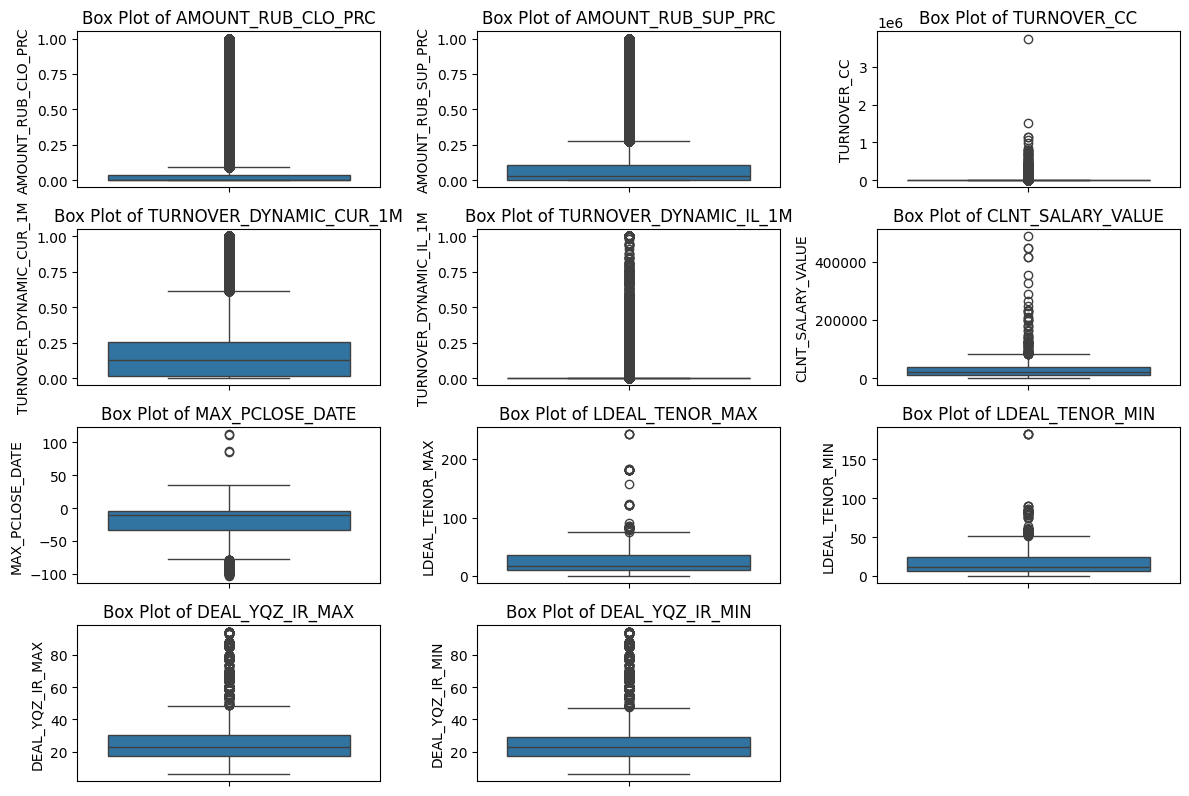

In [ ]:

outlier_features = [
    'AMOUNT_RUB_CLO_PRC', 'AMOUNT_RUB_SUP_PRC',
    'TURNOVER_CC', 'TURNOVER_DYNAMIC_CUR_1M', 'TURNOVER_DYNAMIC_IL_1M',
     'CLNT_SALARY_VALUE', 'MAX_PCLOSE_DATE',
    'LDEAL_TENOR_MAX', 'LDEAL_TENOR_MIN',
    'DEAL_YQZ_IR_MAX', 'DEAL_YQZ_IR_MIN'
]

# Plotting
plt.figure(figsize=(12, 10))

for i, feature in enumerate(outlier_features, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(data=numerical_data_df_visualize, y=feature)
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()


**Insights**


1. **Amounts in Rubles for Transaction Types:**
   - **AMOUNT_RUB_CLO_PRC** and **AMOUNT_RUB_SUP_PRC**: Both variables exhibit significant outliers. The interquartile range (IQR) shows that most transaction amounts are clustered near the lower end of the scale.
   
2. **Turnover Dynamics:**
   - **TURNOVER_DYNAMIC_CUR_1M** and **TURNOVER_DYNAMIC_IL_1M**: These variables also show significant outliers. Most turnover dynamics are concentrated at the lower values, with some extreme values indicating higher turnover.
   - **TURNOVER_CC**: Highly skewed to the right, showing a few customers with extremely high credit card turnover.
   
3. **Customer Characteristics:**
   - **CLNT_SALARY_VALUE**: As expected, higher salaries are drawn by only a few individuals, indicated by the outliers.
   - **MAX_PCLOSE_DATE**: The peak around zero shows many customers are close to their planned credit closure date, with some outliers on both positive and negative sides.
   
4. **Product Metrics Credit Contracts:**
   - **LDEAL_TENOR_MAX** and **LDEAL_TENOR_MIN**: Both variables show that most deals have shorter tenors, with some outliers indicating longer tenors.
   - **DEAL_YQZ_IR_MAX** and **DEAL_YQZ_IR_MIN**: There are significant outliers in the interest rates for revolvers, indicating a wide range of interest rates offered to customers.


We can develop the model without removing outliers, as SVM is prone to Outliers. Also,these are expected extreme values.

### **Overall Univariate Analyses Summary**

#### Customer Demographics and Characteristics

1. **Age (AGE)**:
   - **Distribution**: Almost normally distributed, ranging from 168 to a little over 1000 months. Customers age from 14 to 94. Understanding the customer age is important to implement offer appropriate products.

2. **Customer Tenure (CLNT_SETUP_TENOR)**:
   - **Distribution**: Right-skewed.
   - **Insight**: Indicates that most customers do not stay long with the bank, with a maximum tenure of 1.2 years. Retention strategies should be a focused.

3. **Customer Salary (CLNT_SALARY_VALUE)**:
   - **Distribution**: Right-skewed.
   - **Insight**: Higher salaries are drawn by only a few people. Target high-salary customers with premium products or personalized offers.

4. **Planned Credit Closure Date (MAX_PCLOSE_DATE)**:
   - **Distribution**: Peak around zero, with negative and positive values indicating past and future closure dates, respectively.


#### Max/Min Interest Rates for Revolvers and Annuities

1. **Interest Rates for Revolvers (DEAL_YQZ_IR_MAX and DEAL_YQZ_IR_MIN)**:
   - **Distribution**: Most customers have rates around 20-30%, with outliers up to 80%.
   - **Insight**: Customers with high interest rates might be at a higher risk of churn due to financial stress. Offer better terms to reduce churn risk.

2. **Interest Rates for Annuities (DEAL_YWZ_IR_MAX)**:
   - **Distribution**: Majority have rates around 40-50%, indicating stability.
   

#### Product Metrics Credit Contracts

1. **Maximum Deal Tenor (LDEAL_TENOR_MAX)**:
   - **Distribution**: Clustered around shorter periods, with a significant number of deals less than 50 months.
   

2. **Minimum Deal Tenor (LDEAL_TENOR_MIN)**:
   - **Distribution**: Clustered around shorter periods, with fewer deals extending beyond 50 months.
   

#### Turnover_CC Distribution

1. **Turnover_CC**:
   - **Distribution**: Highly skewed to the right, with most values near zero.
   - **Insight**: Design credit card products catering to different segments. High-turnover customers might benefit from premium rewards, while low-turnover customers might prefer lower fees or interest rates.

#### Categorical Variables

1. **Driving License and Car Ownership**:
   - **Insight**: Majority of customers have no driving license and no car. This can be utilized by attracting customers by providing car loans at less interest rates.

2. **Job Type**:
   - **Insight**: Most customers work private jobs for private employers. Columns APP_COMP_TYPE and APP_EMP_TYPE represent the same information. Remove APP_EMP_TYPE due to 80% missing values.

3. **Job Position Type**:
   - **Insight**: APP_POSITION_TYPE and CLNT_JOB_POSITION_TYPE represent the same information, with most customers in specialist positions. More focus on specialist job positions for targeted services.

4. **Service Package Usage**:
   - **Insight**: Service package 102 is used by the majority. Understanding this package better could provide insights for marketing.

5. **Marital Status and Education**:
   - **Insight**: More married customers and high school graduates. Focus on customizing services for married individuals and high school graduates.

6. **Property Habitation**:
   - **Insight**: More customers live in solo ownership (own houses). Should develop more products and offers for homeowners.



#**Bivariate Analyses**

**Numerical Features**

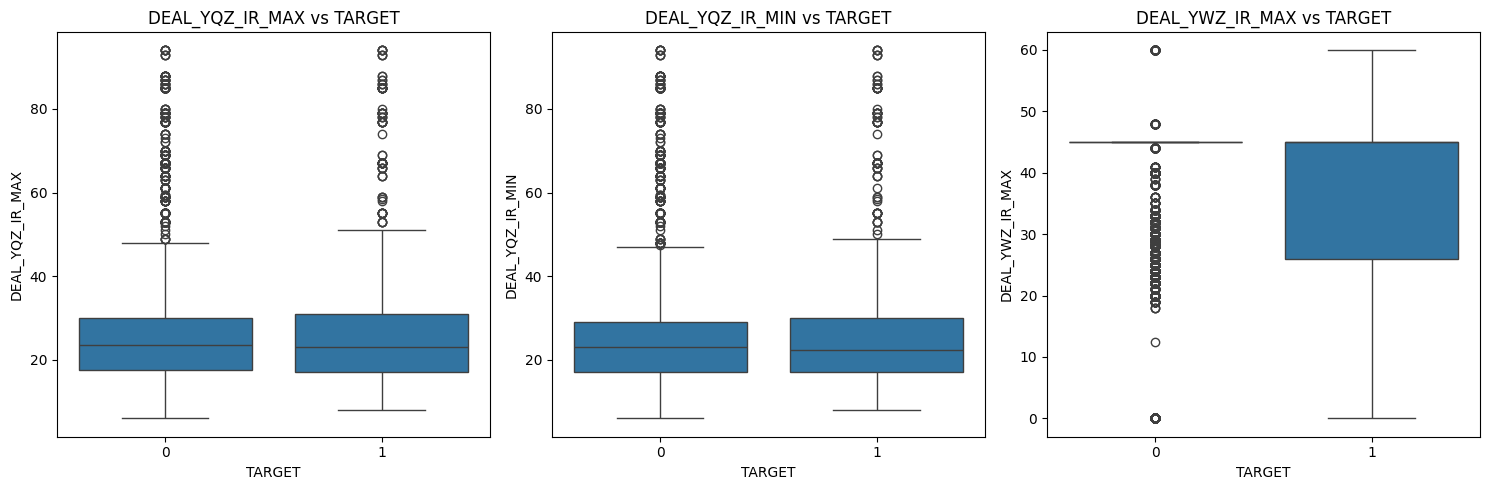

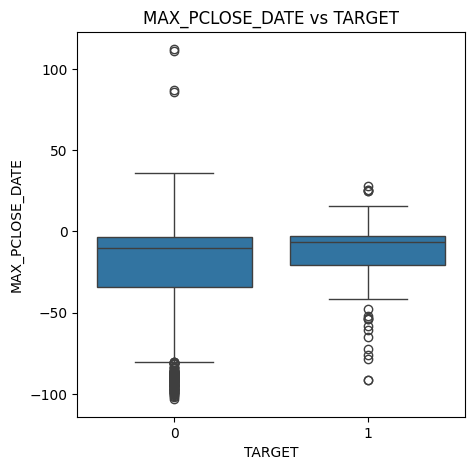

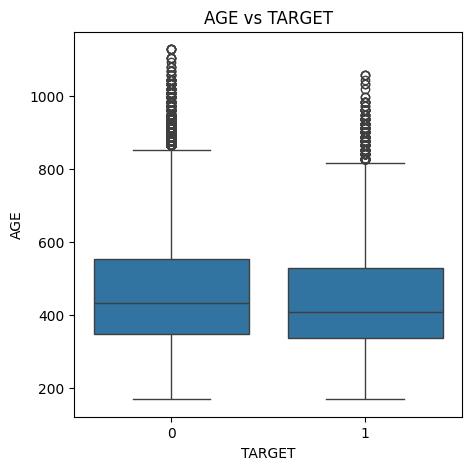

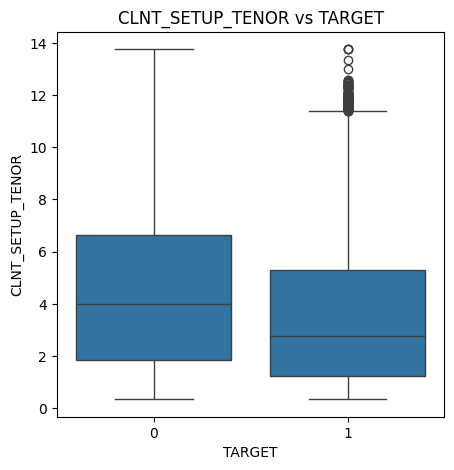

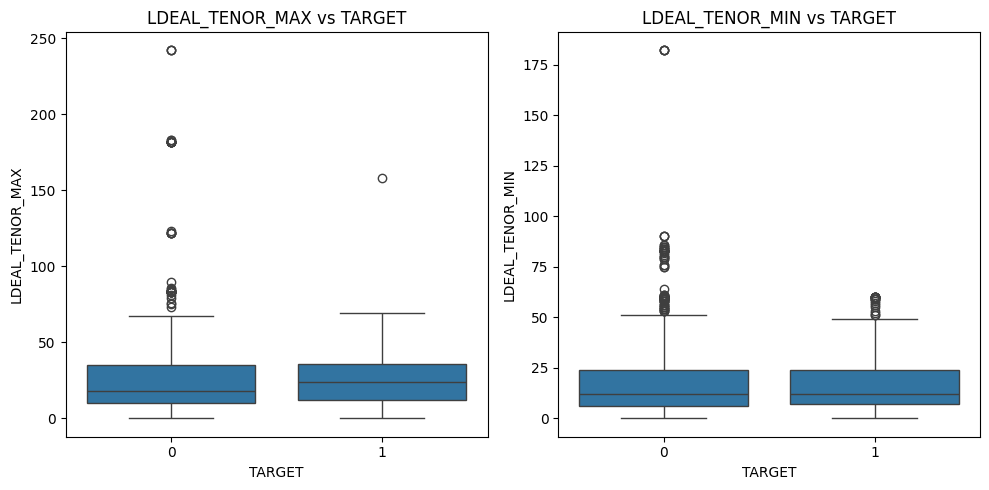

In [ ]:


# 1. Interest Rates and Churn
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='TARGET', y='DEAL_YQZ_IR_MAX', data=Visualize_data_df)
plt.title('DEAL_YQZ_IR_MAX vs TARGET')

plt.subplot(1, 3, 2)
sns.boxplot(x='TARGET', y='DEAL_YQZ_IR_MIN', data=Visualize_data_df)
plt.title('DEAL_YQZ_IR_MIN vs TARGET')

plt.subplot(1, 3, 3)
sns.boxplot(x='TARGET', y='DEAL_YWZ_IR_MAX', data=Visualize_data_df)
plt.title('DEAL_YWZ_IR_MAX vs TARGET')

plt.tight_layout()
plt.show()

# 2. MAX_PCLOSE_DATE and Churn
plt.figure(figsize=(5, 5))
sns.boxplot(x='TARGET', y='MAX_PCLOSE_DATE', data=Visualize_data_df)
plt.title('MAX_PCLOSE_DATE vs TARGET')
plt.show()

# 3. AGE and Churn
plt.figure(figsize=(5, 5))
sns.boxplot(x='TARGET', y='AGE', data=Visualize_data_df)
plt.title('AGE vs TARGET')
plt.show()

# 4. CLNT_SETUP_TENOR and Churn
plt.figure(figsize=(5, 5))
sns.boxplot(x='TARGET', y='CLNT_SETUP_TENOR', data=Visualize_data_df)
plt.title('CLNT_SETUP_TENOR vs TARGET')
plt.show()

# 5. Deal Tenor and Churn
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='TARGET', y='LDEAL_TENOR_MAX', data=Visualize_data_df)
plt.title('LDEAL_TENOR_MAX vs TARGET')

plt.subplot(1, 2, 2)
sns.boxplot(x='TARGET', y='LDEAL_TENOR_MIN', data=Visualize_data_df)
plt.title('LDEAL_TENOR_MIN vs TARGET')

plt.tight_layout()
plt.show()


### Insights

#### 1. **Max/Min Interest Rates for Revolvers and Annuities:**
- **DEAL_YQZ_IR_MAX and DEAL_YQZ_IR_MIN:** The interest rates for both `DEAL_YQZ_IR_MAX` and `DEAL_YQZ_IR_MIN` do not show significant differences between churned and non-churned customers. The median values and IQRs (Interquartile Ranges) are similar.
- **DEAL_YWZ_IR_MAX:** There is a more noticeable difference for `DEAL_YWZ_IR_MAX`. Non-churned customers tend to have slightly higher maximum interest rates for annuities compared to churned customers.

#### 2. **MAX_PCLOSE_DATE:**
- Customers with negative values (indicating past closed credits) show a slightly higher chance to churn compared to those with future planned closure dates.
- The median values for churned customers are slightly lower than for non-churned customers.

#### 3. **AGE:**
- The age distribution between churned and non-churned customers is quite similar. Both groups have a median age around 400-500 months.
- This suggests that age might not be a strong predictor of churn in this dataset.

#### 4. **CLNT_SETUP_TENOR:**
- The setup tenure is generally lower for churned customers, indicating that customers who have been with the bank for shorter periods are more likely to churn. It is expected.
- The maximum setup tenor for non-churned customers is higher, suggesting longer customer retention.

#### 5. **Product Metrics Credit Contracts:**
- **LDEAL_TENOR_MAX and LDEAL_TENOR_MIN:**
  - Both maximum and minimum deal tenors show slightly lower values for churned customers.
  - This suggests that customers with shorter deal tenors are more likely to churn.

### Summary:
- **Interest Rates:** Interest rates for revolvers show no significant difference between churned and non-churned customers, but annuities show a slight difference with non-churned customers having higher rates.
- **MAX_PCLOSE_DATE:** Negative values (past closed credits) are more common among churned customers.
- **AGE:** Age does not seem to be a strong predictor of churn.
- **CLNT_SETUP_TENOR:** Shorter setup tenors are associated with higher churn rates.
- **Deal Tenors:** Both maximum and minimum deal tenors are slightly lower for churned customers, indicating that shorter deal tenors are associated with higher churn rates.



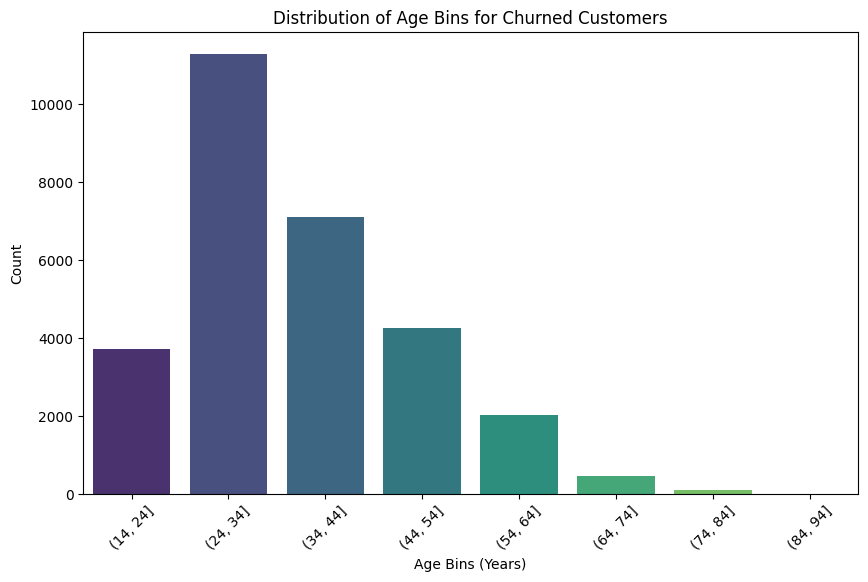

In [ ]:
#AGE VS Churned Customers - TARGET(churn)


churned_customers = Visualize_data_df[Visualize_data_df['TARGET'] == 1]

# Converting AGE from months to years for better readability
churned_customers['AGE_YEARS'] = churned_customers['AGE'] / 12

# age bins
age_bins = [14, 24, 34, 44, 54, 64, 74, 84, 94]
churned_customers['AGE_BIN'] = pd.cut(churned_customers['AGE_YEARS'], bins=age_bins)

plt.figure(figsize=(10, 6))
sns.countplot(x='AGE_BIN', data=churned_customers, palette='viridis')
plt.title('Distribution of Age Bins for Churned Customers')
plt.xlabel('Age Bins (Years)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



**Insights**

1. **Age Distribution**: The plot shows that the majority of churned customers fall within the age range of 24 to 34 years. This indicates that younger adults are more likely to churn.

2. **Middle Age Churn**: The next significant group of churned customers falls within the age range of 34 to 44 years. This age group also shows a high count, suggesting that middle-aged adults are also at a considerable risk of churn.

3. **Lower Churn in Older Age Groups**: As the age increases beyond 44 years, the count of churned customers decreases. This suggests that older adults, particularly those aged 54 and above, are less likely to churn.

4. **Very Low Churn in the Elderly**: Customers in the age ranges of 64 to 74, 74 to 84, and 84 to 94 years show very low churn counts. This indicates that elderly customers tend to stay with the bank.

**Suggestions Based on the Analysis**:
- **Target Younger Adults**: Since younger adults (24-34 years) have the highest churn rate, it may be beneficial to develop retention strategies specifically for this age group. This could include personalized offers, loyalty programs, or improved customer service.
  
- **Focus on Middle-Aged Adults**: The 34-44 age group also shows a high churn rate. Retention strategies for this group could involve financial products that cater to their life stage, such as home loans, education loans, or investment products.


Age can be binned into 5 groups from 14-24, 24-34, 34-44,44-54 and 54-94.

In [ ]:

# Converting AGE from months to years for better readability.
EDA_churn_data_bank_df['AGE'] = EDA_churn_data_bank_df['AGE'] / 12


EDA_churn_data_bank_df.head()


ID  CR_PROD_CNT_IL  AMOUNT_RUB_CLO_PRC  PRC_ACCEPTS_A_EMAIL_LINK  \
0  146841               0            0.000000                       NaN   
1  146842               0            0.041033                       NaN   
2  146843               0            0.006915                       0.0   
3  146844               0            0.000000                       NaN   
4  146845               0            0.000000                       NaN   

   APP_REGISTR_RGN_CODE  PRC_ACCEPTS_A_POS  PRC_ACCEPTS_A_TK  \
0                   NaN                NaN               NaN   
1                   NaN                NaN               NaN   
2                   NaN                0.0               0.0   
3                   NaN                NaN               NaN   
4                   NaN                NaN               NaN   

   TURNOVER_DYNAMIC_IL_1M  CNT_TRAN_AUT_TENDENCY1M  SUM_TRAN_AUT_TENDENCY1M  \
0                     0.0                      NaN                      NaN   
1                     0.0                 0.166667                 0.186107   
2                     0.0                      NaN                      NaN   
3                     0.0                      NaN                      NaN   
4                     0.0                      NaN                      NaN   

   AMOUNT_RUB_SUP_PRC  PRC_ACCEPTS_A_AMOBILE  SUM_TRAN_AUT_TENDENCY3M  \
0            0.000000                    NaN                      NaN   
1            0.244678                    NaN                 0.670968   
2            0.000000                    0.0                      NaN   
3            0.000000                    NaN                      NaN   
4            0.000000                    NaN                      NaN   

  CLNT_TRUST_RELATION  PRC_ACCEPTS_TK  PRC_ACCEPTS_A_MTP  \
0                 NaN             NaN                NaN   
1                 NaN             NaN                NaN   
2                 NaN             0.0                0.0   
3                 NaN             NaN                NaN   
4                 NaN             NaN                NaN   

   REST_DYNAMIC_FDEP_1M  CNT_TRAN_AUT_TENDENCY3M  CNT_ACCEPTS_TK  \
0                   0.0                      NaN             NaN   
1                   0.0                 0.666667             NaN   
2                   0.0                      NaN             0.0   
3                   0.0                      NaN             NaN   
4                   0.0                      NaN             NaN   

  APP_MARITAL_STATUS  REST_DYNAMIC_SAVE_3M  CR_PROD_CNT_VCU   REST_AVG_CUR  \
0      Not Specified              0.541683                0  156067.339767   
1      Not Specified              0.000000                0    4278.845817   
2      Not Specified              0.000000                0  112837.062817   
3      Not Specified              0.005874                0   42902.902883   
4      Not Specified              0.000000                0   71906.476533   

   CNT_TRAN_MED_TENDENCY1M APP_KIND_OF_PROP_HABITATION CLNT_JOB_POSITION_TYPE  \
0                      NaN                         NaN                    NaN   
1                      NaN                         NaN                    NaN   
2                      NaN                         NaN                    NaN   
3                      NaN                         NaN                    NaN   
4                      NaN                         NaN                    NaN   

   AMOUNT_RUB_NAS_PRC     CLNT_JOB_POSITION APP_DRIVING_LICENSE  \
0                 0.0      начальник отдела                 NaN   
1                 0.0                   NaN                 NaN   
2                 0.0  ГЕНЕРАЛЬНЫЙ ДИРЕКТОР                 NaN   
3                 0.0          МЕНЕДЖЕР ИАО                 NaN   
4                 0.0                   NaN                 NaN   

   TRANS_COUNT_SUP_PRC  APP_EDUCATION  CNT_TRAN_CLO_TENDENCY1M  \
0             0.000000  Not Specified                      NaN

#Analysing relationship between each categorical feature with respect to target variable.

In [ ]:
categorical_columns_to_plot

['APP_CAR',
 'APP_COMP_TYPE',
 'APP_DRIVING_LICENSE',
 'APP_EDUCATION',
 'APP_EMP_TYPE',
 'APP_KIND_OF_PROP_HABITATION',
 'APP_MARITAL_STATUS',
 'APP_POSITION_TYPE',
 'APP_TRAVEL_PASS',
 'CLNT_JOB_POSITION_TYPE',
 'PACK']

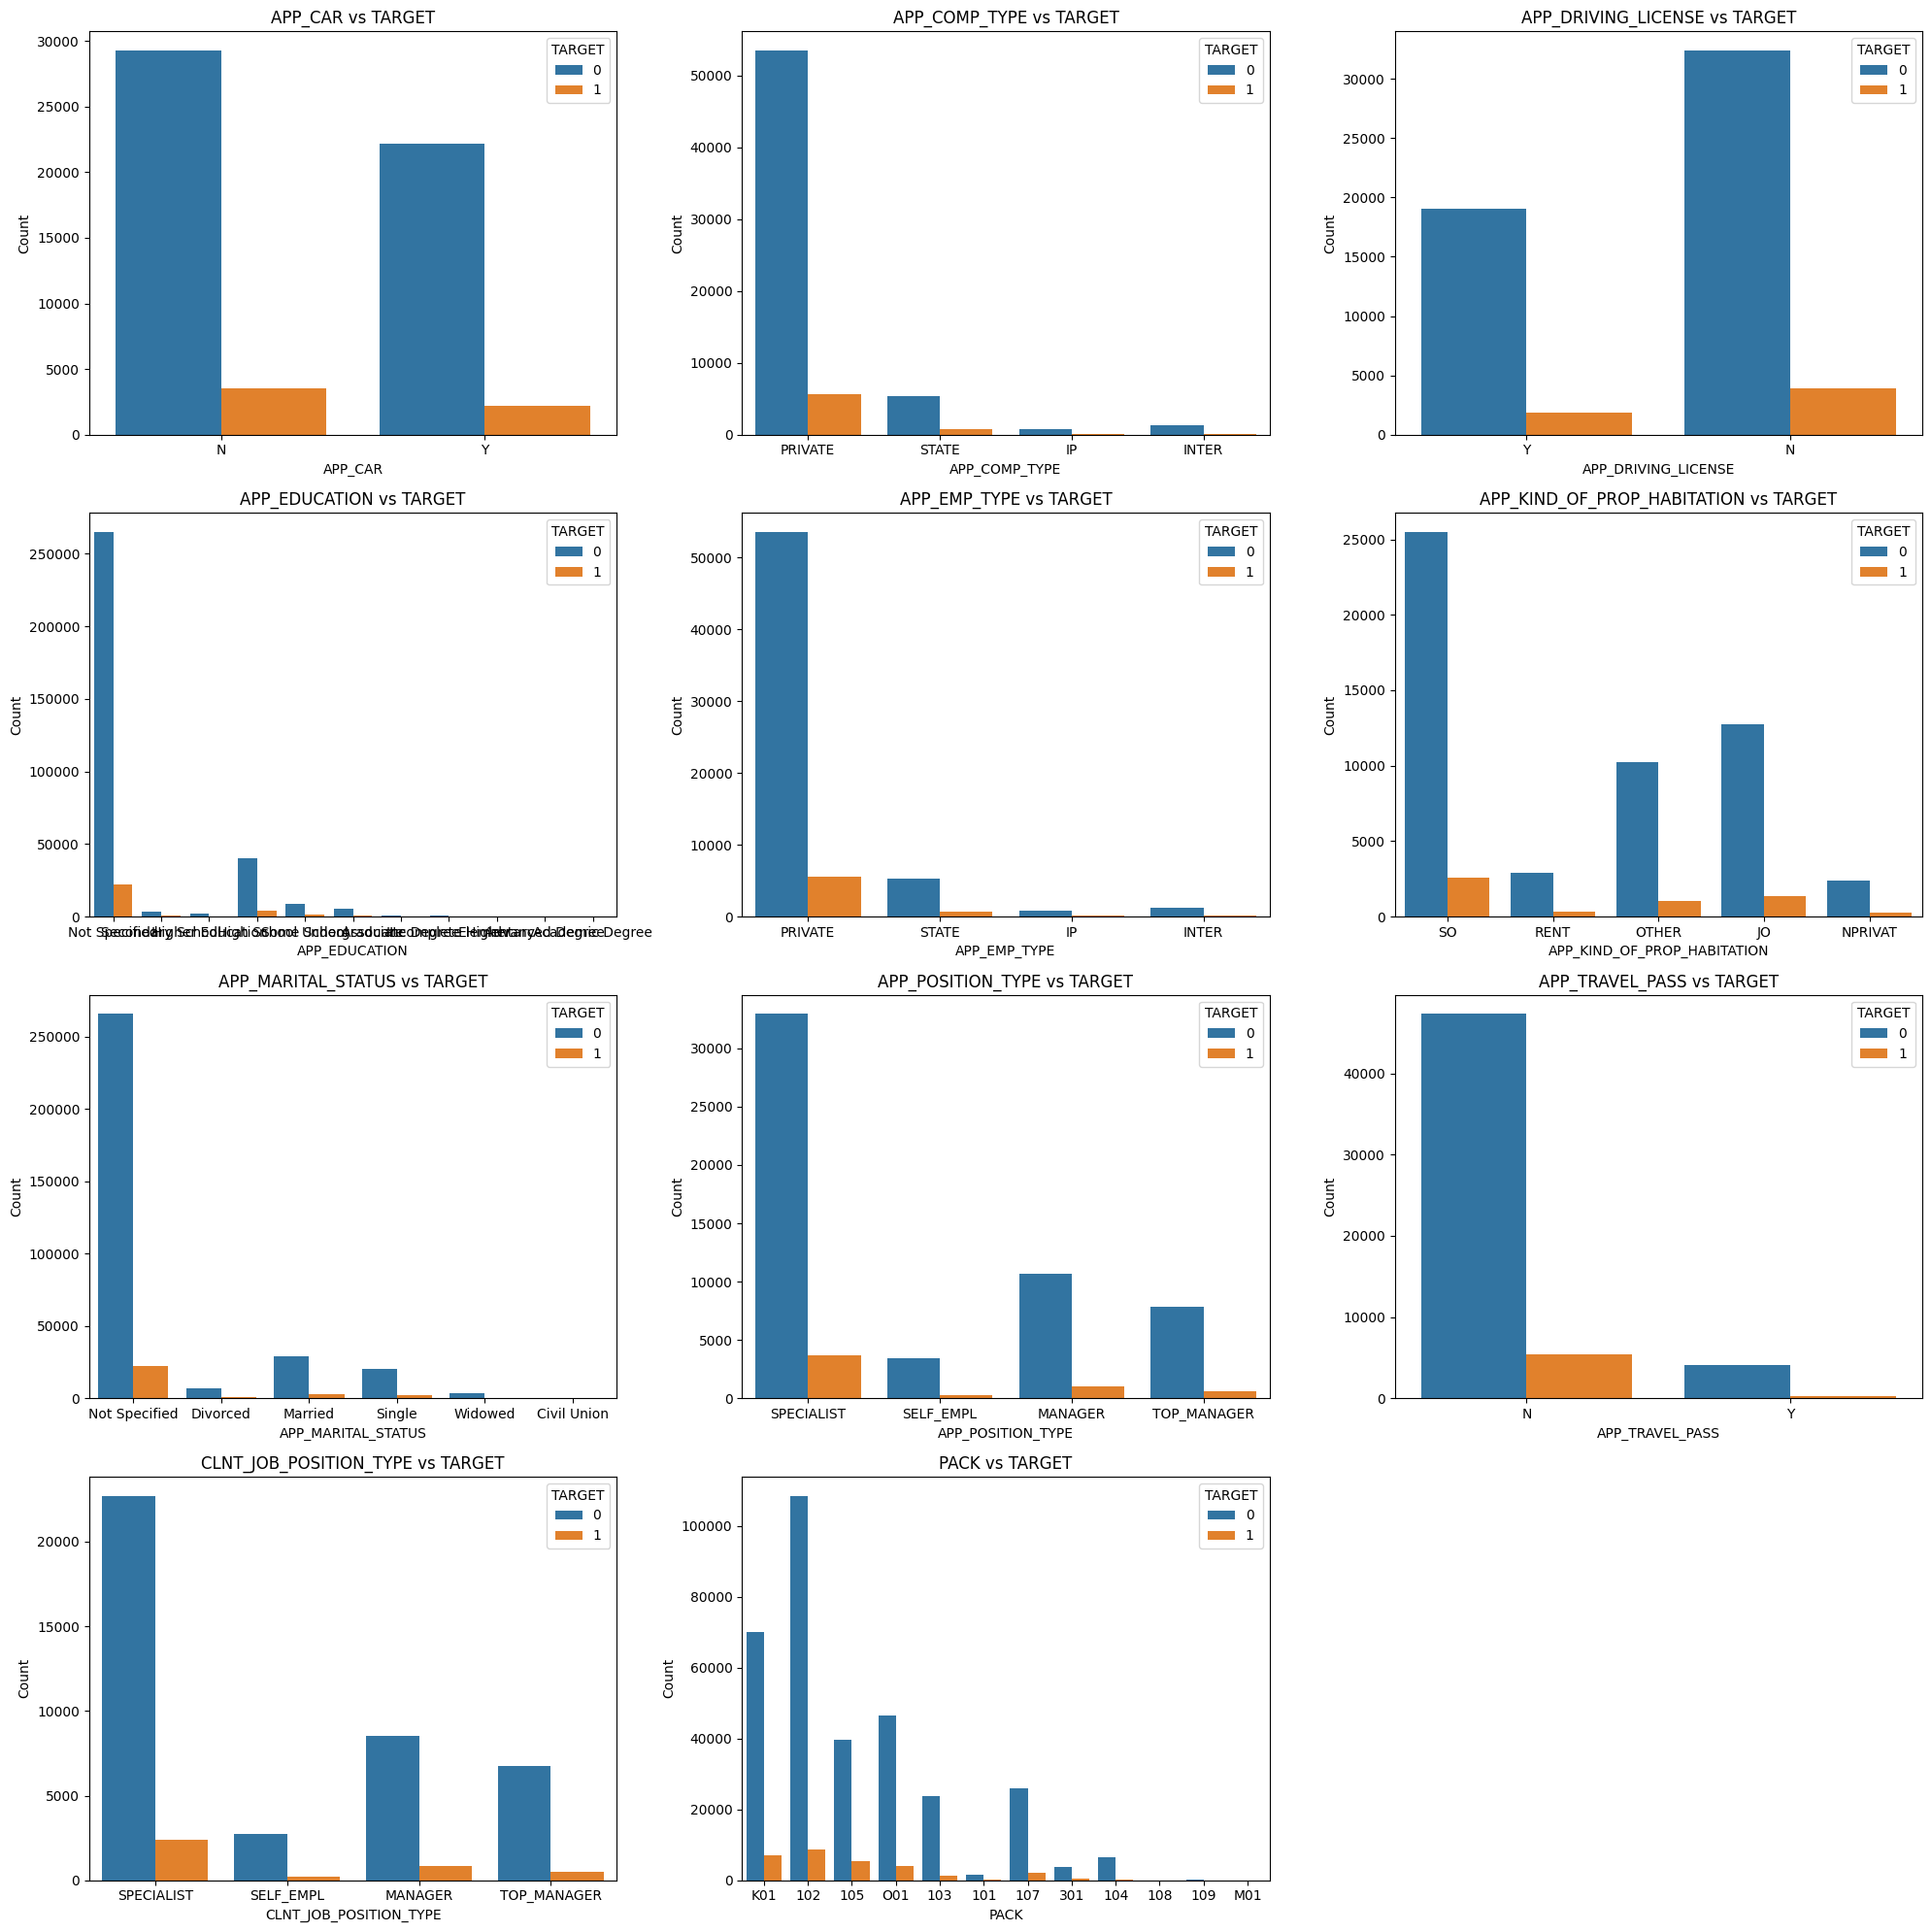

In [ ]:
df = Visualize_data_df
def plot_count_with_target(ax, df, column, target='TARGET'):
    sns.countplot(data=df, x=column, hue=target, ax=ax)
    ax.set_title(f'{column} vs {target}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.legend(title=target)

num_cols = 3
num_rows = len(categorical_columns_to_plot) // num_cols + (len(categorical_columns_to_plot) % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))

axes = axes.flatten()

for ax, col in zip(axes, categorical_columns_to_plot):
    plot_count_with_target(ax, df, col)

# Removing any empty subplots
for i in range(len(categorical_columns_to_plot), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### Insights:


1. **APP_CAR vs TARGET**:
   - Customers without a car have a higher churn rate compared to those with a car.

2. **APP_COMP_TYPE vs TARGET**:
   - Customers working in private companies have a higher churn rate compared to those in state or other types of employment.

3. **APP_DRIVING_LICENSE vs TARGET**:
   - Customers without a driving license have a higher churn rate.

4. **APP_EMP_TYPE vs TARGET**:
   - Similar to APP_COMP_TYPE, customers working in private companies have a higher churn rate.

5. **APP_KIND_OF_PROP_HABITATION vs TARGET**:
   - Customers living in solo ownership (SO) have a higher churn rate.
   - Those living in joint ownership (JO) and other types have a lower churn rate.

6. **APP_MARITAL_STATUS vs TARGET**:
   - Married customers have a lower churn rate compared to single or divorced customers.

7. **APP_POSITION_TYPE vs TARGET**:
   - Customers in specialist positions have a higher churn rate compared to managers or top managers.

9. **APP_TRAVEL_PASS vs TARGET**:
   - Customers without a travel pass have a higher churn rate. This is expected that people who travel can close their account after their busines is done.

10. **CLNT_JOB_POSITION_TYPE vs TARGET**:
    - Similar to APP_POSITION_TYPE, customers in specialist positions have a higher churn rate.

11. **PACK vs TARGET**:
    - Service package 102 has the highest number of customers, and it also shows a higher churn rate compared to other packages.

### Recommendations:

- **Provide Additional Benefits to Customers without a Car**: Consider offering additional benefits or services to customers who do not own a car.

- **Employment Type Specific Strategies**: Design strategies to retain customers working in private companies.
.
- **Housing Ownership Programs**: Offer special programs or benefits for customers living in solo ownership to reduce churn.

- **Marital Status Benefits**: Consider providing benefits or incentives for single or divorced customers to reduce their churn rate.

- **Job Position Specific Retention Plans**: Create retention plans for customers in specialist positions to reduce their churn rate.

- **Travel Pass Incentives**: Provide travel-related incentives to customers without a travel pass to retain them.

- **Service Package Optimization**: Reevaluate the service packages, especially package 102, to understand why it has a higher churn rate and make necessary adjustments.


####  Correlation Heatmap

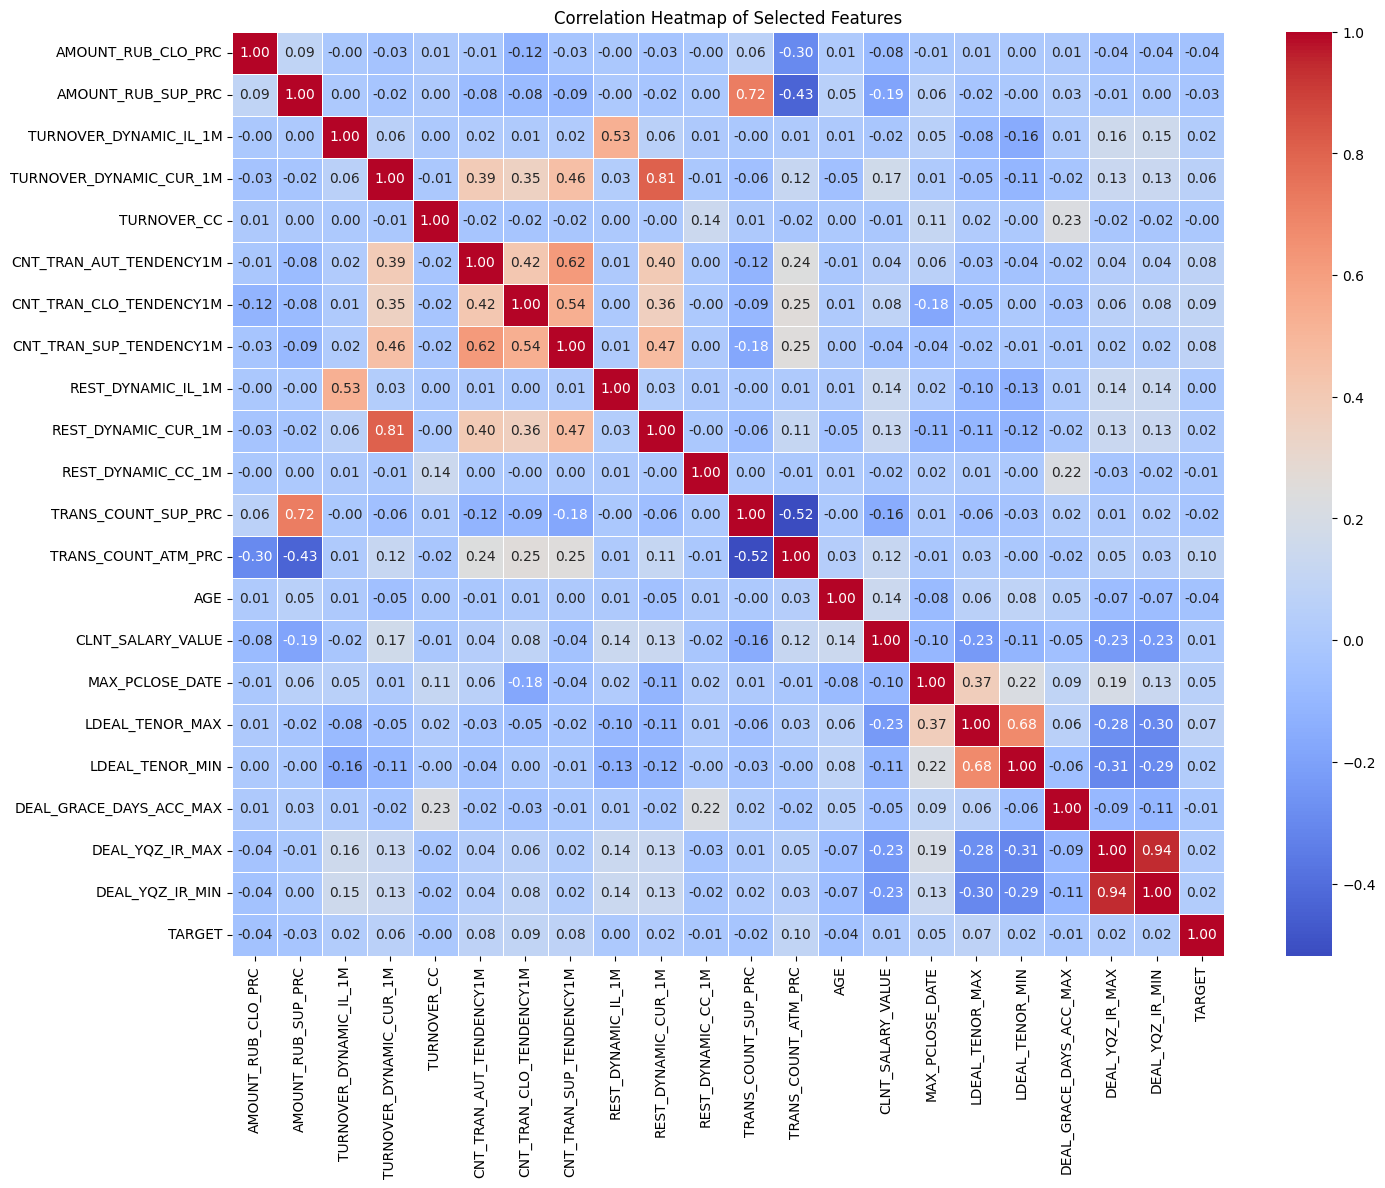

In [ ]:
#selected features for correlation plot
selected_features = [
    'AMOUNT_RUB_CLO_PRC', 'AMOUNT_RUB_SUP_PRC',
    'TURNOVER_DYNAMIC_IL_1M', 'TURNOVER_DYNAMIC_CUR_1M', 'TURNOVER_CC',
    'CNT_TRAN_AUT_TENDENCY1M', 'CNT_TRAN_CLO_TENDENCY1M', 'CNT_TRAN_SUP_TENDENCY1M',
    'REST_DYNAMIC_IL_1M', 'REST_DYNAMIC_CUR_1M', 'REST_DYNAMIC_CC_1M',
    'TRANS_COUNT_SUP_PRC', 'TRANS_COUNT_ATM_PRC',
    'AGE', 'CLNT_SALARY_VALUE', 'MAX_PCLOSE_DATE',
    'LDEAL_TENOR_MAX', 'LDEAL_TENOR_MIN',
    'DEAL_GRACE_DAYS_ACC_MAX',
    'DEAL_YQZ_IR_MAX', 'DEAL_YQZ_IR_MIN',
    'TARGET'
]


EDA_churn_data_bank_df_selected = EDA_churn_data_bank_df[selected_features]


correlation_matrix = EDA_churn_data_bank_df_selected.corr()

# Plot the correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Features')
plt.show()


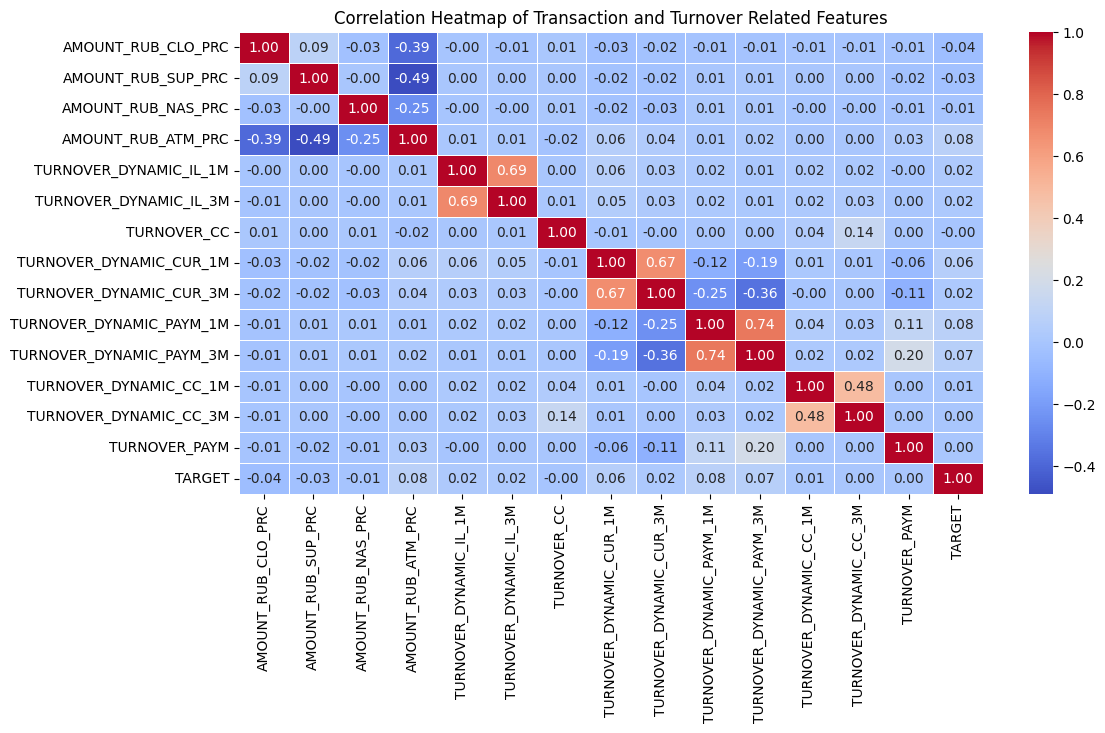

In [ ]:


# Group 1 Features: Transaction and Turnover Related
group_1_features = [
    'AMOUNT_RUB_CLO_PRC', 'AMOUNT_RUB_SUP_PRC', 'AMOUNT_RUB_NAS_PRC', 'AMOUNT_RUB_ATM_PRC',
    'TURNOVER_DYNAMIC_IL_1M', 'TURNOVER_DYNAMIC_IL_3M', 'TURNOVER_CC',
    'TURNOVER_DYNAMIC_CUR_1M', 'TURNOVER_DYNAMIC_CUR_3M',
    'TURNOVER_DYNAMIC_PAYM_1M', 'TURNOVER_DYNAMIC_PAYM_3M',
    'TURNOVER_DYNAMIC_CC_1M', 'TURNOVER_DYNAMIC_CC_3M', 'TURNOVER_PAYM',
    'TARGET'
]

EDA_churn_data_bank_df_group_1 = EDA_churn_data_bank_df[group_1_features]

# Create the correlation matrix for Group 1
correlation_matrix_group_1 = EDA_churn_data_bank_df_group_1.corr()

# Plot the correlation heatmap for Group 1 with annotations
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix_group_1, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Transaction and Turnover Related Features')
plt.show()


### Insights

1. **Strong Correlations:**
    - **TURNOVER_DYNAMIC_IL_1M** and **TURNOVER_DYNAMIC_IL_3M**: A high correlation of 0.69 indicates that the turnover dynamics in one month are highly predictive of the turnover dynamics over three months for installment loans.
    - **TURNOVER_DYNAMIC_PAYM_1M** and **TURNOVER_DYNAMIC_PAYM_3M**: A strong correlation of 0.74 indicates a similar pattern as above but for payment transactions.
    - **TURNOVER_DYNAMIC_CUR_1M** and **TURNOVER_DYNAMIC_CUR_3M**: With a correlation of 0.67, this suggests that the one-month and three-month turnover dynamics for current accounts are closely related.
    - **TURNOVER_DYNAMIC_CC_1M** and **TURNOVER_DYNAMIC_CC_3M**: A correlation of 0.48 indicates a moderate relationship between one-month and three-month credit card turnovers.

2. **Weak or Negative Correlations:**
    - **TARGET** variable has very weak correlations with all other variables, with the highest being a positive correlation of 0.08 with **TURNOVER_CC** and a negative correlation of -0.04 with **AMOUNT_RUB_CLO_PRC**. This suggests that the target variable (churn) might not be strongly influenced by the individual features shown here or that the relationship is more complex and not linear.
    - **AMOUNT_RUB_ATM_PRC** shows some negative correlations with other amount variables like **AMOUNT_RUB_SUP_PRC** and **AMOUNT_RUB_CLO_PRC**, indicating differing customer behavior in different transaction types.

3. **Implications for Predictive Modeling:**
    - Features that have strong correlations among themselves, such as **TURNOVER_DYNAMIC_IL_1M** and **TURNOVER_DYNAMIC_IL_3M**, may provide redundant information. It's beneficial to either combine them or use feature selection techniques to prevent multicollinearity in predictive models.
    - The weak correlation between the **TARGET** variable and other features suggests that identifying churn might require more complex modeling techniques, such as non-linear models or interaction terms.

 **Feature Engineering:**
    - Consider creating new features that capture interactions or non-linear relationships between existing variables.
    - Aggregate features over different time periods to capture customer behavior trends.


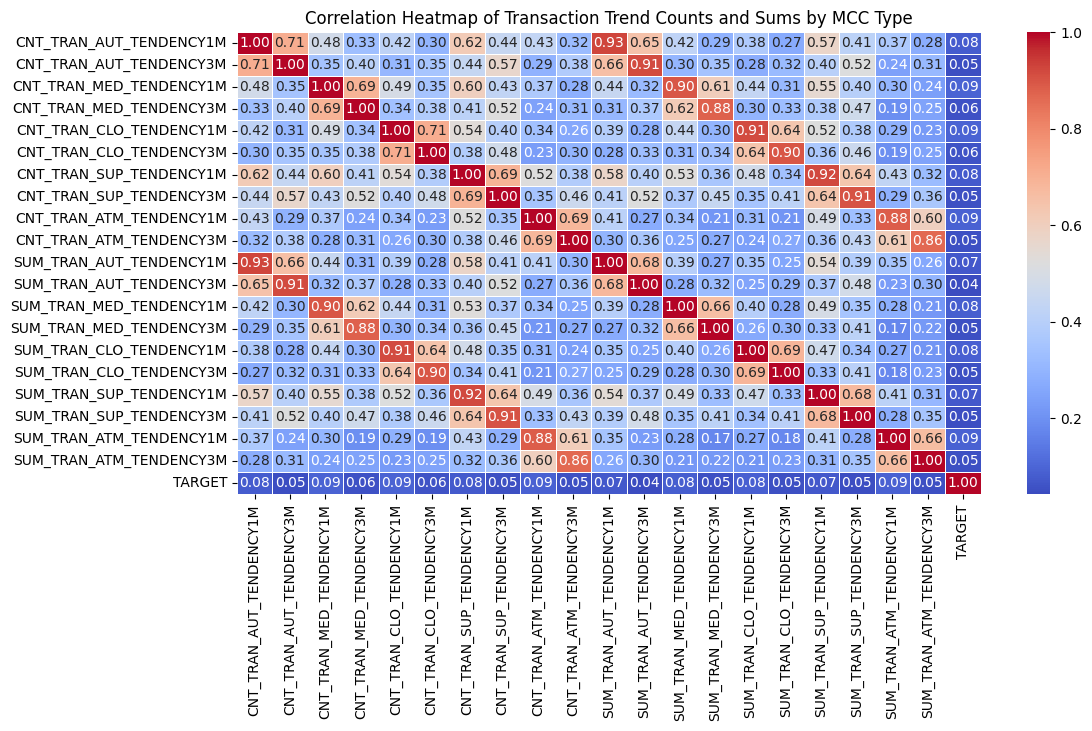

In [ ]:
# Group 2 Features: Transaction Trend Counts and Sums by MCC Type
group_2_features = [
    'CNT_TRAN_AUT_TENDENCY1M', 'CNT_TRAN_AUT_TENDENCY3M',
    'CNT_TRAN_MED_TENDENCY1M', 'CNT_TRAN_MED_TENDENCY3M',
    'CNT_TRAN_CLO_TENDENCY1M', 'CNT_TRAN_CLO_TENDENCY3M',
    'CNT_TRAN_SUP_TENDENCY1M', 'CNT_TRAN_SUP_TENDENCY3M',
    'CNT_TRAN_ATM_TENDENCY1M', 'CNT_TRAN_ATM_TENDENCY3M',
    'SUM_TRAN_AUT_TENDENCY1M', 'SUM_TRAN_AUT_TENDENCY3M',
    'SUM_TRAN_MED_TENDENCY1M', 'SUM_TRAN_MED_TENDENCY3M',
    'SUM_TRAN_CLO_TENDENCY1M', 'SUM_TRAN_CLO_TENDENCY3M',
    'SUM_TRAN_SUP_TENDENCY1M', 'SUM_TRAN_SUP_TENDENCY3M',
    'SUM_TRAN_ATM_TENDENCY1M', 'SUM_TRAN_ATM_TENDENCY3M',
    'TARGET'
]

EDA_churn_data_bank_df_group_2 = EDA_churn_data_bank_df[group_2_features]

correlation_matrix_group_2 = EDA_churn_data_bank_df_group_2.corr()

# Plot the correlation heatmap for Group 2 with annotations
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix_group_2, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Transaction Trend Counts and Sums by MCC Type')
plt.show()


### Insights from the Correlation Heatmap of Transaction Trend Counts and Sums by MCC Type


1. **Strong Correlations:**
    - **CNT_TRAN_AUT_TENDENCY1M** and **SUM_TRAN_AUT_TENDENCY1M**: A very strong negative correlation of -0.93, indicating that as the count of auto transactions increases, the sum tends to decrease.
    - **CNT_TRAN_AUT_TENDENCY3M** and **SUM_TRAN_AUT_TENDENCY3M**: Another strong correlation of 0.91, suggesting a similar relationship over three months.
    - **SUM_TRAN_MED_TENDENCY1M** and **SUM_TRAN_MED_TENDENCY3M**: A strong correlation of 0.88, indicating that the sums of medical transactions over one month are predictive of the sums over three months.
    - **CNT_TRAN_SUP_TENDENCY1M** and **CNT_TRAN_SUP_TENDENCY3M**: A strong correlation of 0.69, indicating that the count of supermarket transactions over one month is predictive of the count over three months.

2. **Moderate Correlations:**
    - **CNT_TRAN_MED_TENDENCY1M** and **SUM_TRAN_MED_TENDENCY1M**: A moderate correlation of 0.61, indicating a moderate relationship between the count and sum of medical transactions over one month.
    - **CNT_TRAN_SUP_TENDENCY1M** and **SUM_TRAN_SUP_TENDENCY1M**: A moderate correlation of 0.55, indicating a moderate relationship between the count and sum of supermarket transactions over one month.

3. **Weak or Negative Correlations:**
    - **TARGET** variable has very weak correlations with all other variables, with the highest being a correlation of 0.09 with **CNT_TRAN_MED_TENDENCY1M** and a negative correlation of -0.08 with **CNT_TRAN_SUP_TENDENCY1M**. This suggests that the target variable (churn) might not be strongly influenced by the individual features shown here or that the relationship is more complex and not linear.

 - Features that have strong correlations among themselves, such as **CNT_TRAN_AUT_TENDENCY1M** and **SUM_TRAN_AUT_TENDENCY1M**, may provide redundant information. It's beneficial to either combine them or use feature selection techniques to prevent multicollinearity in predictive models.
    - The weak correlation between the **TARGET** variable and other features suggests that identifying churn might require more complex modeling techniques, such as non-linear models or interaction terms.



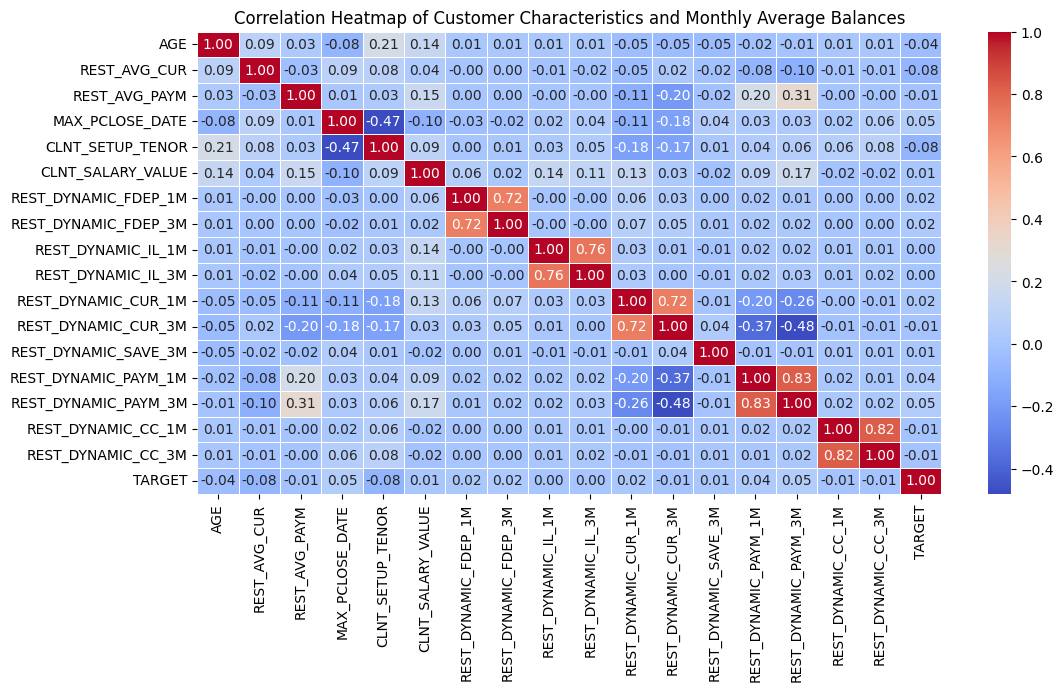

In [ ]:
# Subgroup 3a Features: Customer Characteristics and Monthly Average Balances
subgroup_3a_features = [
    'AGE', 'REST_AVG_CUR', 'REST_AVG_PAYM', 'MAX_PCLOSE_DATE',
    'CLNT_SETUP_TENOR', 'CLNT_SALARY_VALUE',
    'REST_DYNAMIC_FDEP_1M', 'REST_DYNAMIC_FDEP_3M',
    'REST_DYNAMIC_IL_1M', 'REST_DYNAMIC_IL_3M',
    'REST_DYNAMIC_CUR_1M', 'REST_DYNAMIC_CUR_3M',
    'REST_DYNAMIC_SAVE_3M', 'REST_DYNAMIC_PAYM_1M',
    'REST_DYNAMIC_PAYM_3M', 'REST_DYNAMIC_CC_1M',
    'REST_DYNAMIC_CC_3M',
    'TARGET'
]


EDA_churn_data_bank_df_subgroup_3a = EDA_churn_data_bank_df[subgroup_3a_features]


correlation_matrix_subgroup_3a = EDA_churn_data_bank_df_subgroup_3a.corr()

# Plot the correlation heatmap for Subgroup 3a with annotations
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix_subgroup_3a, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Customer Characteristics and Monthly Average Balances')
plt.show()


### Insights from the Correlation Heatmap of Customer Characteristics and Monthly Average Balances


1. **Strong Correlations:**
    - **REST_DYNAMIC_FDEP_1M** and **REST_DYNAMIC_FDEP_3M**: A strong correlation of 0.72, indicating that the monthly average balance of fixed deposits over one month is highly predictive of the average balance over three months.
    - **REST_DYNAMIC_IL_1M** and **REST_DYNAMIC_IL_3M**: A strong correlation of 0.76, suggesting that the monthly average balance of installment loans over one month is predictive of the average balance over three months.
    - **REST_DYNAMIC_CUR_1M** and **REST_DYNAMIC_CUR_3M**: Another strong correlation of 0.72, indicating a similar relationship for current accounts.
    - **REST_DYNAMIC_PAYM_1M** and **REST_DYNAMIC_PAYM_3M**: A very strong correlation of 0.83, suggesting that the average balance of payment accounts over one month is highly predictive of the balance over three months.
    - **REST_DYNAMIC_CC_1M** and **REST_DYNAMIC_CC_3M**: A strong correlation of 0.82, indicating that the average balance of credit card accounts over one month is predictive of the balance over three months.

2. **Moderate Correlations:**
    - **REST_AVG_CUR** and **CLNT_SALARY_VALUE**: A moderate correlation of 0.15, suggesting that higher average current account balances might be associated with higher client salary values.
    - **REST_DYNAMIC_PAYM_3M** and **CLNT_SALARY_VALUE**: A moderate correlation of 0.17, indicating that the average balance of payment accounts over three months might be associated with client salary values.

3. **Weak or Negative Correlations:**
    - **TARGET** variable has very weak correlations with all other variables, with the highest being a correlation of 0.08 with **CLNT_SETUP_TENOR** and negative correlations with **MAX_PCLOSE_DATE** (-0.08). This suggests that the target variable (churn) might not be strongly influenced by the individual features shown here, or the relationship is more complex and not linear.



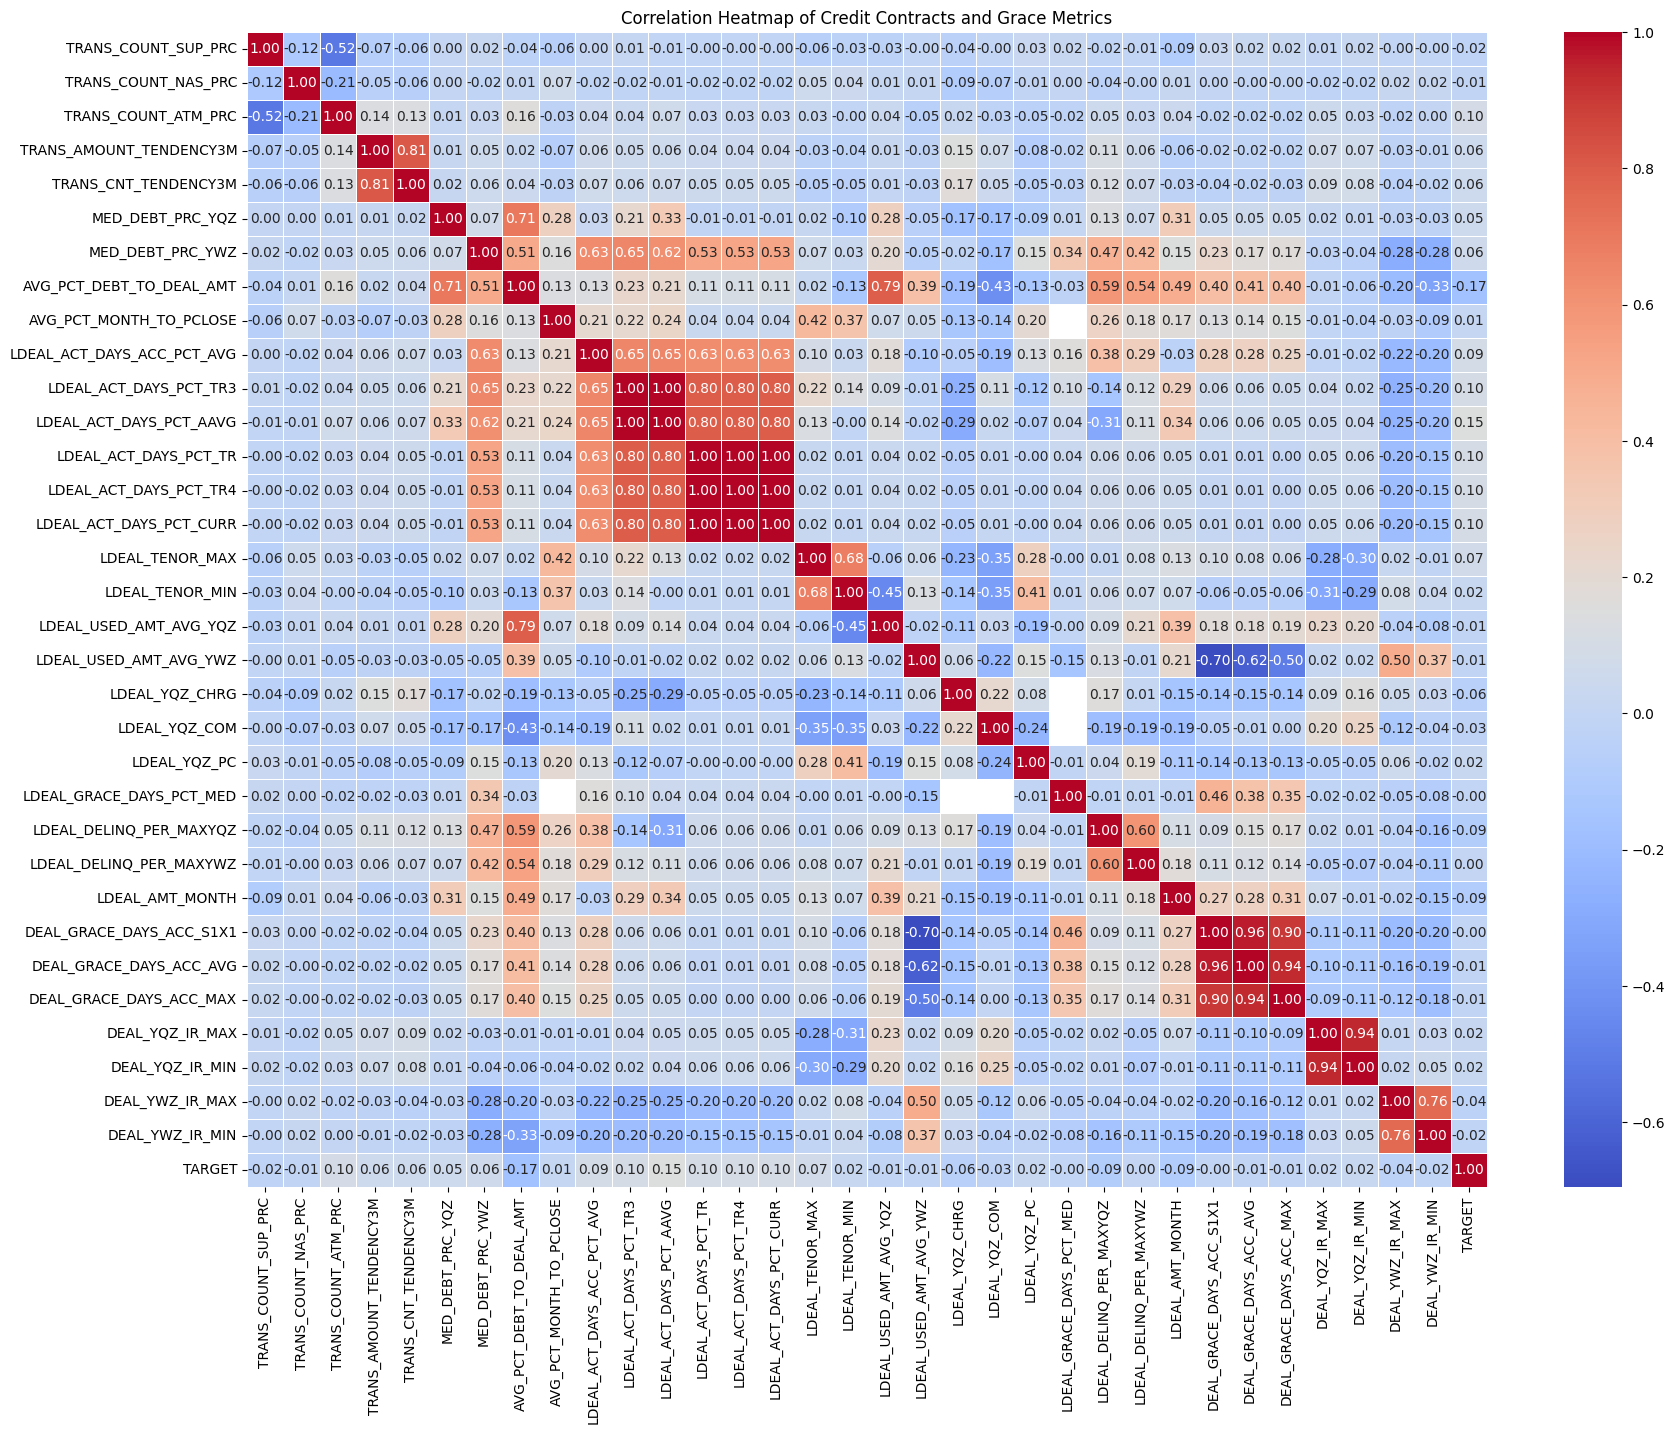

In [ ]:
# Subgroup 3b Features: Credit Contracts and Grace Metrics
subgroup_3b_features = [
    'TRANS_COUNT_SUP_PRC', 'TRANS_COUNT_NAS_PRC', 'TRANS_COUNT_ATM_PRC',
    'TRANS_AMOUNT_TENDENCY3M', 'TRANS_CNT_TENDENCY3M',
    'MED_DEBT_PRC_YQZ', 'MED_DEBT_PRC_YWZ', 'AVG_PCT_DEBT_TO_DEAL_AMT', 'AVG_PCT_MONTH_TO_PCLOSE',
    'LDEAL_ACT_DAYS_ACC_PCT_AVG', 'LDEAL_ACT_DAYS_PCT_TR3', 'LDEAL_ACT_DAYS_PCT_AAVG', 'LDEAL_ACT_DAYS_PCT_TR',
    'LDEAL_ACT_DAYS_PCT_TR4', 'LDEAL_ACT_DAYS_PCT_CURR', 'LDEAL_TENOR_MAX', 'LDEAL_TENOR_MIN',
    'LDEAL_USED_AMT_AVG_YQZ', 'LDEAL_USED_AMT_AVG_YWZ', 'LDEAL_YQZ_CHRG', 'LDEAL_YQZ_COM', 'LDEAL_YQZ_PC',
    'LDEAL_GRACE_DAYS_PCT_MED','LDEAL_DELINQ_PER_MAXYQZ', 'LDEAL_DELINQ_PER_MAXYWZ', 'LDEAL_AMT_MONTH',
    'DEAL_GRACE_DAYS_ACC_S1X1','DEAL_GRACE_DAYS_ACC_AVG', 'DEAL_GRACE_DAYS_ACC_MAX',
    'DEAL_YQZ_IR_MAX', 'DEAL_YQZ_IR_MIN', 'DEAL_YWZ_IR_MAX', 'DEAL_YWZ_IR_MIN',
    'TARGET'
]


EDA_churn_data_bank_df_subgroup_3b = EDA_churn_data_bank_df[subgroup_3b_features]


correlation_matrix_subgroup_3b = EDA_churn_data_bank_df_subgroup_3b.corr()

# Plot the correlation heatmap for Subgroup 3b with annotations
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix_subgroup_3b, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Credit Contracts and Grace Metrics')
plt.show()


### Insights from the Correlation Heatmap of Credit Contracts and Grace Metrics



1. **Strong Correlations:**
    - **LDEAL_USED_AMT_AVG_YQZ** and **LDEAL_USED_AMT_AVG_YWZ**: A strong correlation of 0.79, indicating that the average used amount over one year is highly predictive of the average used amount over another year.
    - **LDEAL_ACT_DAYS_PCT_TR3** and **LDEAL_ACT_DAYS_PCT_TR4**: A strong correlation of 0.80, suggesting that the percentage of active days in a time range of 3 months is highly predictive of the percentage of active days in a time range of 4 months.

2. **Moderate Correlations:**
    - **AVG_PCT_DEBT_TO_DEAL_AMT** and **MED_DEBT_PRC_YWZ**: A moderate correlation of 0.53, suggesting that the average percentage of debt to deal amount is related to the median debt percentage over a year.
    - **LDEAL_USED_AMT_AVG_YWZ** and **MED_DEBT_PRC_YWZ**: A moderate correlation of 0.39, indicating that higher average used amounts over a year might be associated with higher median debt percentages over a year.
    - **LDEAL_DELINQ_PER_MAXYWZ** and **LDEAL_ACT_DAYS_PCT_TR3**: A moderate correlation of 0.34, suggesting that the maximum delinquency percentage over a year is related to the percentage of active days over 3 months.

3. **Weak or Negative Correlations:**
    - **TARGET** variable has very weak correlations with all other variables, with the highest being a correlation of 0.09 with **MED_DEBT_PRC_YWZ** and negative correlations with **LDEAL_DELINQ_PER_MAXYWZ** (-0.11). This suggests that the target variable (churn) might not be strongly influenced by the individual features shown here, or the relationship is more complex and not linear.



### **Summary of Bivariate Analyses**

#### Max/Min Interest Rates for Revolvers and Annuities
1. **DEAL_YQZ_IR_MAX and DEAL_YQZ_IR_MIN vs TARGET**:
   - Both maximum and minimum interest rates for revolvers show that most customers have interest rates clustered around 20-30%, with some outliers going up to 80%.
   - There is no significant difference in the distribution of interest rates between churned (TARGET=1) and non-churned (TARGET=0) customers.

2. **DEAL_YWZ_IR_MAX vs TARGET**:
   - Maximum interest rates for annuities are mostly around 40-50%.
   - There is no significant difference in the distribution between churned and non-churned customers.

#### MAX_PCLOSE_DATE vs TARGET
- Peak Around Zero: Significant peak around zero, indicating many customers are close to their planned credit closure date.
- Negative Values: Some negative values indicate credits already closed in the past.
- Positive Values: Positive values indicate credits will close in the future.
- Distribution is similar for both churned and non-churned customers, suggesting planned closure dates are not significantly different.

#### AGE vs TARGET
- Age distribution is almost normal, ranging from 14 to 94 years.
- There is no significant difference in the age distribution between churned and non-churned customers.

#### CLNT_SETUP_TENOR vs TARGET
- CLNT_SETUP_TENOR is right-skewed, indicating customers tend not to stay long, with the maximum being 1.2 years.
- Slightly lower setup tenor for churned customers compared to non-churned, suggesting shorter tenure may be associated with higher churn.

#### Product Metrics Credit Contracts
1. **LDEAL_TENOR_MAX and LDEAL_TENOR_MIN vs TARGET**:
   - Maximum deal tenors are clustered around shorter periods, with some extending up to 200 months.
   - Minimum deal tenors are also clustered around shorter periods, with fewer extending beyond 50 months.
   - Distribution is similar for both churned and non-churned customers, suggesting tenor length is not significantly different.

#### Turnover_CC Distribution
- Distribution is highly skewed to the right, with most values near zero and a few instances of significantly higher turnover.
- Presence of extreme outliers indicates a small number of customers have very high credit card turnover.
- Distribution is similar for both churned and non-churned customers.

#### CLNT_SALARY_VALUE vs TARGET
- Higher salary values are drawn by only a few customers, as expected.
- Slightly lower salary values for churned customers compared to non-churned, suggesting higher salary may be associated with lower churn.

#### Categorical Variables vs TARGET
1. **APP_CAR, APP_COMP_TYPE, and APP_DRIVING_LICENSE**:
   - Majority of customers have no car, work in private companies, and have no driving license.
   - Distribution is similar for both churned and non-churned customers.

2. **APP_EMP_TYPE and APP_KIND_OF_PROP_HABITATION**:
   - Most customers work private jobs and live in solo ownership (own houses).
   - Distribution is similar for both churned and non-churned customers.

3. **APP_MARITAL_STATUS and APP_POSITION_TYPE**:
   - Majority of customers are married and hold specialist positions.
   - Distribution is similar for both churned and non-churned customers.

4. **APP_TRAVEL_PASS and CLNT_JOB_POSITION_TYPE**:
   - Most customers do not have an international passport and hold specialist positions.
   - Distribution is similar for both churned and non-churned customers.

5. **PACK**:
   - Service package 102 is used by the majority of customers.
   - Distribution is similar for both churned and non-churned customers.


#**Overall To do next steps from above matrices.**

### Group 1: Transaction and Turnover Related Features
- **TURNOVER_DYNAMIC_IL_1M** and **TURNOVER_DYNAMIC_IL_3M**: High correlation (0.69)
- **TURNOVER_DYNAMIC_CUR_1M** and **TURNOVER_DYNAMIC_CUR_3M**: High correlation (0.67)
- **TURNOVER_DYNAMIC_PAYM_1M** and **TURNOVER_DYNAMIC_PAYM_3M**: High correlation (0.74)
- **TURNOVER_DYNAMIC_CC_1M** and **TURNOVER_DYNAMIC_CC_3M**: High correlation (0.48)

### Group 2: Transaction Trend Counts and Sums by MCC Type
- **CNT_TRAN_AUT_TENDENCY1M** and **CNT_TRAN_AUT_TENDENCY3M**: High correlation (0.91)
- **CNT_TRAN_SUP_TENDENCY1M** and **CNT_TRAN_SUP_TENDENCY3M**: High correlation (0.69)
- **CNT_TRAN_ATM_TENDENCY1M** and **CNT_TRAN_ATM_TENDENCY3M**: High correlation (0.61)
- **SUM_TRAN_AUT_TENDENCY1M** and **SUM_TRAN_AUT_TENDENCY3M**: High correlation (0.91)
- **SUM_TRAN_SUP_TENDENCY1M** and **SUM_TRAN_SUP_TENDENCY3M**: High correlation (0.91)
- **SUM_TRAN_ATM_TENDENCY1M** and **SUM_TRAN_ATM_TENDENCY3M**: High correlation (0.66)

### Group 3: Customer Characteristics and Monthly Average Balances
- **REST_DYNAMIC_FDEP_1M** and **REST_DYNAMIC_FDEP_3M**: High correlation (0.72)
- **REST_DYNAMIC_IL_1M** and **REST_DYNAMIC_IL_3M**: High correlation (0.76)
- **REST_DYNAMIC_CUR_1M** and **REST_DYNAMIC_CUR_3M**: High correlation (0.72)
- **REST_DYNAMIC_PAYM_1M** and **REST_DYNAMIC_PAYM_3M**: High correlation (0.83)
- **REST_DYNAMIC_CC_1M** and **REST_DYNAMIC_CC_3M**: High correlation (0.82)

### Group 4: Credit Contracts and Grace Metrics
- **LDEAL_USED_AMT_AVG_YQZ** and **LDEAL_USED_AMT_AVG_YWZ**: High correlation (0.79)
- **LDEAL_ACT_DAYS_PCT_TR3** and **LDEAL_ACT_DAYS_PCT_TR4**: High correlation (0.80)
- **LDEAL_ACT_DAYS_ACC_PCT_AVG** and **LDEAL_ACT_DAYS_PCT_TR3**: High correlation (0.65)
- **LDEAL_ACT_DAYS_ACC_PCT_AVG** and **LDEAL_ACT_DAYS_PCT_TR4**: High correlation (0.63)
- **LDEAL_ACT_DAYS_PCT_TR** and **LDEAL_ACT_DAYS_PCT_TR3**: High correlation (0.80)
- **LDEAL_GRACE_DAYS_PCT_MED** and **LDEAL_DELINQ_PER_MAXYWZ**: High correlation (0.70)



1. **Remove One of Each Pair with High Correlation:**
   - TURNOVER_DYNAMIC_IL_1M or TURNOVER_DYNAMIC_IL_3M
   - TURNOVER_DYNAMIC_CUR_1M or TURNOVER_DYNAMIC_CUR_3M
   - TURNOVER_DYNAMIC_PAYM_1M or TURNOVER_DYNAMIC_PAYM_3M
   - TURNOVER_DYNAMIC_CC_1M or TURNOVER_DYNAMIC_CC_3M
   - CNT_TRAN_AUT_TENDENCY1M or CNT_TRAN_AUT_TENDENCY3M
   - CNT_TRAN_SUP_TENDENCY1M or CNT_TRAN_SUP_TENDENCY3M
   - CNT_TRAN_ATM_TENDENCY1M or CNT_TRAN_ATM_TENDENCY3M
   - SUM_TRAN_AUT_TENDENCY1M or SUM_TRAN_AUT_TENDENCY3M
   - SUM_TRAN_SUP_TENDENCY1M or SUM_TRAN_SUP_TENDENCY3M
   - SUM_TRAN_ATM_TENDENCY1M or SUM_TRAN_ATM_TENDENCY3M
   - REST_DYNAMIC_FDEP_1M or REST_DYNAMIC_FDEP_3M
   - REST_DYNAMIC_IL_1M or REST_DYNAMIC_IL_3M
   - REST_DYNAMIC_CUR_1M or REST_DYNAMIC_CUR_3M
   - REST_DYNAMIC_PAYM_1M or REST_DYNAMIC_PAYM_3M
   - REST_DYNAMIC_CC_1M or REST_DYNAMIC_CC_3M
   - LDEAL_USED_AMT_AVG_YQZ or LDEAL_USED_AMT_AVG_YWZ
   - LDEAL_ACT_DAYS_PCT_TR3 or LDEAL_ACT_DAYS_PCT_TR4
   - LDEAL_ACT_DAYS_ACC_PCT_AVG or LDEAL_ACT_DAYS_PCT_TR3
   - LDEAL_ACT_DAYS_ACC_PCT_AVG or LDEAL_ACT_DAYS_PCT_TR4
   - LDEAL_ACT_DAYS_PCT_TR or LDEAL_ACT_DAYS_PCT_TR3
   - LDEAL_GRACE_DAYS_PCT_MED or LDEAL_DELINQ_PER_MAXYWZ

2. **Combining Features:**
   - For features that are highly correlated, consider creating an average or aggregate feature. For example:
     - Combine TURNOVER_DYNAMIC_IL_1M and TURNOVER_DYNAMIC_IL_3M into a single feature like `TURNOVER_DYNAMIC_IL_AVG`.
     - Combine CNT_TRAN_AUT_TENDENCY1M and CNT_TRAN_AUT_TENDENCY3M into a single feature like `CNT_TRAN_AUT_TENDENCY_AVG`.
     - Combine REST_DYNAMIC_FDEP_1M and REST_DYNAMIC_FDEP_3M into a single feature like `REST_DYNAMIC_FDEP_AVG`.
     - Combine LDEAL_ACT_DAYS_PCT_TR3 and LDEAL_ACT_DAYS_PCT_TR4 into a single feature like `LDEAL_ACT_DAYS_PCT_AVG`.



### Summary of Insights till so far

#### Insights

1. **Customer Demographics and Characteristics:**
   - **Age (AGE):** Almost normally distributed, ranging from 14 to 94 years. Age can be considered as a continuous variable or binned into categories for further analysis.
   - **Customer Tenure (CLNT_SETUP_TENOR):** Right-skewed, indicating shorter tenures. Customers with shorter tenures are more likely to churn.
   - **Customer Salary (CLNT_SALARY_VALUE):** Right-skewed, with higher salaries drawn by only a few individuals. High-salary customers should be targeted with premium products or personalized offers.
   - **Planned Credit Closure Date (MAX_PCLOSE_DATE):** Shows a peak around zero, indicating many customers are close to their planned credit closure date. Segmenting into already closed and planning to close can help understand customer behavior.

2. **Interest Rates for Revolvers and Annuities:**
   - **DEAL_YQZ_IR_MAX and DEAL_YQZ_IR_MIN:** Interest rates for revolvers are clustered around 20-30%, with some outliers going up to 80%. High interest rates may increase churn risk due to financial stress.
   - **DEAL_YWZ_IR_MAX:** Annuity interest rates are around 40-50%, with less variability, indicating a stable customer base.

3. **Product Metrics Credit Contracts:**
   - **Maximum Deal Tenor (LDEAL_TENOR_MAX):** Clustered around shorter periods, with significant deals less than 50 months.
   - **Minimum Deal Tenor (LDEAL_TENOR_MIN):** Similar to maximum deal tenor, clustered around shorter periods, with fewer deals extending beyond 50 months.

4. **Turnover_CC Distribution:**
   - Highly skewed to the right, with most values near zero and a few instances of significantly high turnover. Outliers can significantly influence analysis and should be handled appropriately.

5. **Categorical Variables:**
   - **Driving License and Car Ownership:** Majority of customers have no driving license and no car. This demographic can be targeted with specific products like car loans at lower interest rates.
   - **Job Type and Position:** Most customers work private jobs and are in specialist positions. Removing `APP_EMP_TYPE` due to redundancy and high missing values.
   - **Service Package Usage:** Majority use service package 102. Understanding this package better could provide insights for targeted marketing.
   - **Marital Status and Property Habitation:** More married customers and those living in solo ownership. Customizing services for these demographics can improve retention.

### Recommendations Based on Bivariate Analysis

1. **APP_CAR vs TARGET:**
   - Customers without a car have a higher churn rate. Offer additional benefits or services to retain these customers.

2. **APP_COMP_TYPE vs TARGET:**
   - Higher churn rate among customers working in private companies. Design retention strategies targeting this employment type.

3. **APP_DRIVING_LICENSE vs TARGET:**
   - Higher churn rate among customers without a driving license. Provide incentives or offers to retain them.

4. **APP_EMP_TYPE vs TARGET:**
   - Similar to `APP_COMP_TYPE`, customers in private employment have a higher churn rate. Implement specific retention strategies.

5. **APP_KIND_OF_PROP_HABITATION vs TARGET:**
   - Higher churn rate among customers in solo ownership. Develop products and offers for homeowners.

6. **APP_MARITAL_STATUS vs TARGET:**
   - Lower churn rate among married customers. Provide benefits or incentives for single or divorced customers.

7. **APP_POSITION_TYPE vs TARGET:**
   - Higher churn rate among specialists. Create retention plans targeting this job position.

8. **APP_TRAVEL_PASS vs TARGET:**
   - Higher churn rate among customers without a travel pass. Offer travel-related incentives.

9. **CLNT_JOB_POSITION_TYPE vs TARGET:**
   - Higher churn rate among specialists. Target retention efforts at this group.

10. **PACK vs TARGET:**
    - Service package 102 has the highest churn rate. Reevaluate this package to understand the cause of churn and make necessary adjustments.




## ***6. Feature Engineering & Data Pre-processing***

In [ ]:
#copying the dataset for feature engineering
# use this dataset for further steps
Feature_Engineering_churn_data_bank_df = EDA_churn_data_bank_df.copy()

Feature_Engineering_churn_data_bank_df.head()


Feature_Engineering_churn_data_bank_df.shape

(355190, 116)

In [ ]:
# these are the data frames for categorical and numerical variables separately without Target variable
print(updated_categorical_df.shape)
print(numerical_data_df.shape)

(355190, 21)
(355190, 94)


In [ ]:
# these columns are till now identified as columns that can be removed
columns_that_can_be_removed

['ID',
 'CLNT_JOB_POSITION',
 'PRC_ACCEPTS_A_EMAIL_LINK',
 'PRC_ACCEPTS_A_POS',
 'PRC_ACCEPTS_A_TK',
 'PRC_ACCEPTS_A_AMOBILE',
 'PRC_ACCEPTS_A_MTP',
 'PRC_ACCEPTS_A_ATM',
 'PRC_ACCEPTS_MTP',
 'PRC_ACCEPTS_TK',
 'CLNT_JOB_POSITION',
 'APP_EMP_TYPE',
 'APP_POSITION_TYPE']

In [ ]:
# percentage of missing values in each column
missing_percentages_numerical = numerical_data_df.isnull().sum() / len(numerical_data_df) * 100


missing_percentages_df_num = pd.DataFrame({'Column': numerical_data_df.columns, 'Missing Percentage': missing_percentages_numerical})
missing_percentages_df_num.sort_values(by='Missing Percentage', ascending=False, inplace=True)

missing_num_80=missing_percentages_df_num[missing_percentages_df_num['Missing Percentage'] > 80]

missing_percentages_df_num[missing_percentages_df_num['Missing Percentage'] > 0]


Column  Missing Percentage
CLNT_SALARY_VALUE                    CLNT_SALARY_VALUE           99.799544
LDEAL_YQZ_COM                            LDEAL_YQZ_COM           99.650891
LDEAL_YQZ_CHRG                          LDEAL_YQZ_CHRG           99.650610
AVG_PCT_MONTH_TO_PCLOSE        AVG_PCT_MONTH_TO_PCLOSE           99.541654
MAX_PCLOSE_DATE                        MAX_PCLOSE_DATE           99.470424
LDEAL_AMT_MONTH                        LDEAL_AMT_MONTH           99.468454
AVG_PCT_DEBT_TO_DEAL_AMT      AVG_PCT_DEBT_TO_DEAL_AMT           99.468454
LDEAL_YQZ_PC                              LDEAL_YQZ_PC           99.209437
LDEAL_USED_AMT_AVG_YQZ          LDEAL_USED_AMT_AVG_YQZ           97.747403
LDEAL_TENOR_MIN                        LDEAL_TENOR_MIN           97.747403
DEAL_YQZ_IR_MAX                        DEAL_YQZ_IR_MAX           97.747403
DEAL_YQZ_IR_MIN                        DEAL_YQZ_IR_MIN           97.747403
MED_DEBT_PRC_YQZ                      MED_DEBT_PRC_YQZ           97.747403
LDEAL_TENOR_MAX                        LDEAL_TENOR_MAX           97.747403
LDEAL_DELINQ_PER_MAXYQZ        LDEAL_DELINQ_PER_MAXYQZ           97.747403
APP_REGISTR_RGN_CODE              APP_REGISTR_RGN_CODE           82.952786
CNT_TRAN_CLO_TENDENCY1M        CNT_TRAN_CLO_TENDENCY1M           81.335060
SUM_TRAN_CLO_TENDENCY1M        SUM_TRAN_CLO_TENDENCY1M           81.335060
CNT_TRAN_MED_TENDENCY1M        CNT_TRAN_MED_TENDENCY1M           80.583068
SUM_TRAN_MED_TENDENCY1M        SUM_TRAN_MED_TENDENCY1M           80.583068
DEAL_GRACE_DAYS_ACC_AVG        DEAL_GRACE_DAYS_ACC_AVG           80.451871
DEAL_GRACE_DAYS_ACC_MAX        DEAL_GRACE_DAYS_ACC_MAX           80.451871
DEAL_GRACE_DAYS_ACC_S1X1      DEAL_GRACE_DAYS_ACC_S1X1           80.165827
SUM_TRAN_AUT_TENDENCY1M        SUM_TRAN_AUT_TENDENCY1M           78.289929
CNT_TRAN_AUT_TENDENCY1M        CNT_TRAN_AUT_TENDENCY1M           78.289929
LDEAL_ACT_DAYS_PCT_TR3          LDEAL_ACT_DAYS_PCT_TR3           73.690701
LDEAL_ACT_DAYS_ACC_PCT_AVG  LDEAL_ACT_DAYS_ACC_PCT_AVG           73.690701
LDEAL_ACT_DAYS_PCT_CURR        LDEAL_ACT_DAYS_PCT_CURR           73.690701
LDEAL_ACT_DAYS_PCT_TR4          LDEAL_ACT_DAYS_PCT_TR4           73.690701
LDEAL_ACT_DAYS_PCT_TR            LDEAL_ACT_DAYS_PCT_TR           73.690701
DEAL_YWZ_IR_MAX                        DEAL_YWZ_IR_MAX           73.053014
MED_DEBT_PRC_YWZ                      MED_DEBT_PRC_YWZ           73.053014
LDEAL_USED_AMT_AVG_YWZ          LDEAL_USED_AMT_AVG_YWZ           73.053014
DEAL_YWZ_IR_MIN                        DEAL_YWZ_IR_MIN           73.053014
LDEAL_DELINQ_PER_MAXYWZ        LDEAL_DELINQ_PER_MAXYWZ           73.053014
LDEAL_ACT_DAYS_PCT_AAVG        LDEAL_ACT_DAYS_PCT_AAVG           72.359864
SUM_TRAN_AUT_TENDENCY3M        SUM_TRAN_AUT_TENDENCY3M           68.734480
CNT_TRAN_AUT_TENDENCY3M        CNT_TRAN_AUT_TENDENCY3M           68.734480
CNT_TRAN_CLO_TENDENCY3M        CNT_TRAN_CLO_TENDENCY3M           67.651679
SUM_TRAN_CLO_TENDENCY3M        SUM_TRAN_CLO_TENDENCY3M           67.651679
SUM_TRAN_MED_TENDENCY3M        SUM_TRAN_MED_TENDENCY3M           67.376052
CNT_TRAN_MED_TENDENCY3M        CNT_TRAN_MED_TENDENCY3M           67.376052
PRC_ACCEPTS_A_TK                      PRC_ACCEPTS_A_TK           56.315493
PRC_ACCEPTS_A_AMOBILE            PRC_ACCEPTS_A_AMOBILE           56.315493
PRC_ACCEPTS_A_ATM                    PRC_ACCEPTS_A_ATM           56.315493
PRC_ACCEPTS_MTP                        PRC_ACCEPTS_MTP           56.315493
PRC_ACCEPTS_A_POS                    PRC_ACCEPTS_A_POS           56.315493
PRC_ACCEPTS_A_EMAIL_LINK      PRC_ACCEPTS_A_EMAIL_LINK           56.315493
PRC_ACCEPTS_A_MTP                    PRC_ACCEPTS_A_MTP           56.315493
PRC_ACCEPTS_TK                          PRC_ACCEPTS_TK           56.315493
SUM_TRAN_SUP_TENDENCY1M        SUM_TRAN_SUP_TENDENCY1M           56.081252
CNT_TRAN_SUP_TENDENCY1M        CNT_TRAN_SUP_TENDENCY1M           56.081252
CNT_TRAN_SUP_TENDENCY3M        CNT_TRAN_SUP_TENDENCY3M           44.05304

In [ ]:
# percentage of missing values in categorical columns
missing_percentages_categorical = updated_categorical_df.isnull().sum() / len(updated_categorical_df) * 100


missing_percentages_df_cat = pd.DataFrame({'Column': updated_categorical_df.columns, 'Missing Percentage': missing_percentages_categorical})
missing_percentages_df_cat.sort_values(by='Missing Percentage', ascending=False, inplace=True)


missing_percentages_df_cat[missing_percentages_df_cat['Missing Percentage'] > 0]

Column  Missing Percentage
CLNT_JOB_POSITION_TYPE            CLNT_JOB_POSITION_TYPE           87.392382
APP_CAR                                          APP_CAR           83.880177
APP_DRIVING_LICENSE                  APP_DRIVING_LICENSE           83.879895
APP_TRAVEL_PASS                          APP_TRAVEL_PASS           83.879895
APP_KIND_OF_PROP_HABITATION  APP_KIND_OF_PROP_HABITATION           83.287536
APP_POSITION_TYPE                      APP_POSITION_TYPE           82.954194
APP_COMP_TYPE                              APP_COMP_TYPE           81.034939
APP_EMP_TYPE                                APP_EMP_TYPE           81.034939
APP_EDUCATION                              APP_EDUCATION           80.826037
APP_MARITAL_STATUS                    APP_MARITAL_STATUS           80.789437
CLNT_TRUST_RELATION                  CLNT_TRUST_RELATION           80.455249
CNT_ACCEPTS_TK                            CNT_ACCEPTS_TK           56.315493
CNT_ACCEPTS_MTP                          CNT_ACCEPTS_MTP           56.315493
CLNT_JOB_POSITION                      CLNT_JOB_POSITION           40.648385

### Column Removal Based on Insights and Missing Percentages


- **APP_CAR** and **APP_DRIVING_LICENSE**: Higher churn rate among customers without a car or driving license. we can remove only APP_DRIVING_LICENSE.

- **APP_TRAVEL_PASS**: Higher churn rate among customers without a travel pass.

- **APP_COMP_TYPE** and **APP_EMP_TYPE**: Both represent employment type, and with over 80% missing data. we can remove APP_EMP_TYPE.

- **APP_POSITION_TYPE** and **CLNT_JOB_POSITION_TYPE**: Both represent job position type, and high missing data makes them less reliable. we can remove APP_POSITION_TYPE.

- **APP_KIND_OF_PROP_HABITATION**: we can keep this column, as ownership of house is effecting churn rate.

- **APP_EDUCATION** and **APP_MARITAL_STATUS**: Useful demographic information, even though has more missing values, we can consider these as the dataset is imbalanced, we do not want to lose anymore information.


.



In [ ]:
cat_columns_to_remove = ['APP_DRIVING_LICENSE', 'APP_EMP_TYPE', 'APP_POSITION_TYPE']

In [ ]:
# updating
columns_that_can_be_removed.extend(cat_columns_to_remove)

In [ ]:
# percentage of missing values in each column
missing_percentages_numerical = numerical_data_df.isnull().sum() / len(numerical_data_df) * 100


missing_percentages_df_num = pd.DataFrame({'Column': numerical_data_df.columns, 'Missing Percentage': missing_percentages_numerical})
missing_percentages_df_num.sort_values(by='Missing Percentage', ascending=False, inplace=True)

missing_num_80=missing_percentages_df_num[missing_percentages_df_num['Missing Percentage'] > 80]

missing_percentages_df_num[missing_percentages_df_num['Missing Percentage'] > 0]


Column  Missing Percentage
CLNT_SALARY_VALUE                    CLNT_SALARY_VALUE           99.799544
LDEAL_YQZ_COM                            LDEAL_YQZ_COM           99.650891
LDEAL_YQZ_CHRG                          LDEAL_YQZ_CHRG           99.650610
AVG_PCT_MONTH_TO_PCLOSE        AVG_PCT_MONTH_TO_PCLOSE           99.541654
MAX_PCLOSE_DATE                        MAX_PCLOSE_DATE           99.470424
AVG_PCT_DEBT_TO_DEAL_AMT      AVG_PCT_DEBT_TO_DEAL_AMT           99.468454
LDEAL_AMT_MONTH                        LDEAL_AMT_MONTH           99.468454
LDEAL_YQZ_PC                              LDEAL_YQZ_PC           99.209437
DEAL_YQZ_IR_MIN                        DEAL_YQZ_IR_MIN           97.747403
LDEAL_TENOR_MAX                        LDEAL_TENOR_MAX           97.747403
LDEAL_USED_AMT_AVG_YQZ          LDEAL_USED_AMT_AVG_YQZ           97.747403
DEAL_YQZ_IR_MAX                        DEAL_YQZ_IR_MAX           97.747403
MED_DEBT_PRC_YQZ                      MED_DEBT_PRC_YQZ           97.747403
LDEAL_TENOR_MIN                        LDEAL_TENOR_MIN           97.747403
LDEAL_DELINQ_PER_MAXYQZ        LDEAL_DELINQ_PER_MAXYQZ           97.747403
APP_REGISTR_RGN_CODE              APP_REGISTR_RGN_CODE           82.952786
CNT_TRAN_CLO_TENDENCY1M        CNT_TRAN_CLO_TENDENCY1M           81.335060
SUM_TRAN_CLO_TENDENCY1M        SUM_TRAN_CLO_TENDENCY1M           81.335060
CNT_TRAN_MED_TENDENCY1M        CNT_TRAN_MED_TENDENCY1M           80.583068
SUM_TRAN_MED_TENDENCY1M        SUM_TRAN_MED_TENDENCY1M           80.583068
DEAL_GRACE_DAYS_ACC_MAX        DEAL_GRACE_DAYS_ACC_MAX           80.451871
DEAL_GRACE_DAYS_ACC_AVG        DEAL_GRACE_DAYS_ACC_AVG           80.451871
DEAL_GRACE_DAYS_ACC_S1X1      DEAL_GRACE_DAYS_ACC_S1X1           80.165827
SUM_TRAN_AUT_TENDENCY1M        SUM_TRAN_AUT_TENDENCY1M           78.289929
CNT_TRAN_AUT_TENDENCY1M        CNT_TRAN_AUT_TENDENCY1M           78.289929
LDEAL_ACT_DAYS_PCT_TR3          LDEAL_ACT_DAYS_PCT_TR3           73.690701
LDEAL_ACT_DAYS_ACC_PCT_AVG  LDEAL_ACT_DAYS_ACC_PCT_AVG           73.690701
LDEAL_ACT_DAYS_PCT_CURR        LDEAL_ACT_DAYS_PCT_CURR           73.690701
LDEAL_ACT_DAYS_PCT_TR            LDEAL_ACT_DAYS_PCT_TR           73.690701
LDEAL_ACT_DAYS_PCT_TR4          LDEAL_ACT_DAYS_PCT_TR4           73.690701
DEAL_YWZ_IR_MAX                        DEAL_YWZ_IR_MAX           73.053014
MED_DEBT_PRC_YWZ                      MED_DEBT_PRC_YWZ           73.053014
DEAL_YWZ_IR_MIN                        DEAL_YWZ_IR_MIN           73.053014
LDEAL_DELINQ_PER_MAXYWZ        LDEAL_DELINQ_PER_MAXYWZ           73.053014
LDEAL_USED_AMT_AVG_YWZ          LDEAL_USED_AMT_AVG_YWZ           73.053014
LDEAL_ACT_DAYS_PCT_AAVG        LDEAL_ACT_DAYS_PCT_AAVG           72.359864
SUM_TRAN_AUT_TENDENCY3M        SUM_TRAN_AUT_TENDENCY3M           68.734480
CNT_TRAN_AUT_TENDENCY3M        CNT_TRAN_AUT_TENDENCY3M           68.734480
SUM_TRAN_CLO_TENDENCY3M        SUM_TRAN_CLO_TENDENCY3M           67.651679
CNT_TRAN_CLO_TENDENCY3M        CNT_TRAN_CLO_TENDENCY3M           67.651679
SUM_TRAN_MED_TENDENCY3M        SUM_TRAN_MED_TENDENCY3M           67.376052
CNT_TRAN_MED_TENDENCY3M        CNT_TRAN_MED_TENDENCY3M           67.376052
PRC_ACCEPTS_A_AMOBILE            PRC_ACCEPTS_A_AMOBILE           56.315493
PRC_ACCEPTS_A_TK                      PRC_ACCEPTS_A_TK           56.315493
PRC_ACCEPTS_A_POS                    PRC_ACCEPTS_A_POS           56.315493
CNT_ACCEPTS_MTP                        CNT_ACCEPTS_MTP           56.315493
PRC_ACCEPTS_A_EMAIL_LINK      PRC_ACCEPTS_A_EMAIL_LINK           56.315493
PRC_ACCEPTS_A_MTP                    PRC_ACCEPTS_A_MTP           56.315493
PRC_ACCEPTS_TK                          PRC_ACCEPTS_TK           56.315493
CNT_ACCEPTS_TK                          CNT_ACCEPTS_TK           56.315493
PRC_ACCEPTS_MTP                        PRC_ACCEPTS_MTP           56.315493
PRC_ACCEPTS_A_ATM                    PRC_ACCEPTS_A_ATM           56.315493
CNT_TRAN_SUP_TENDENCY1M        CNT_TRAN_SUP_TENDENCY1M           56.08125

In [ ]:
numerical_columns_to_remove = [
    'CLNT_SALARY_VALUE', 'LDEAL_YQZ_COM', 'LDEAL_YQZ_CHRG',
    'AVG_PCT_MONTH_TO_PCLOSE', 'MAX_PCLOSE_DATE', 'LDEAL_AMT_MONTH',
    'AVG_PCT_DEBT_TO_DEAL_AMT', 'LDEAL_YQZ_PC', 'LDEAL_USED_AMT_AVG_YQZ',
    'LDEAL_TENOR_MIN', 'DEAL_YQZ_IR_MAX', 'DEAL_YQZ_IR_MIN',
    'MED_DEBT_PRC_YQZ', 'LDEAL_TENOR_MAX', 'LDEAL_DELINQ_PER_MAXYQZ',
    'APP_REGISTR_RGN_CODE', 'CNT_TRAN_CLO_TENDENCY1M', 'SUM_TRAN_CLO_TENDENCY1M',
    'CNT_TRAN_MED_TENDENCY1M', 'SUM_TRAN_MED_TENDENCY1M',
    'DEAL_GRACE_DAYS_ACC_AVG', 'DEAL_GRACE_DAYS_ACC_MAX', 'DEAL_GRACE_DAYS_ACC_S1X1'
]

In [ ]:
#updating the list
columns_that_can_be_removed.extend(numerical_columns_to_remove)

In [ ]:
# Remove duplicate columns from the list
columns_that_can_be_removed = list(set(columns_that_can_be_removed))

In [ ]:
# storing all columns to new variables
numerical_columns=numerical_data_df.columns.to_list()
categorical_columns= updated_categorical_df.columns.to_list()

In [ ]:
# Filtering columns to remove from numerical and categorical columns that are in columns to be removed.
updated_numerical_columns= [col for col in numerical_columns if col not in columns_that_can_be_removed]
updated_categorical_columns = [col for col in categorical_columns if col not in columns_that_can_be_removed]


print("Updated Numerical Columns:")
print(updated_numerical_columns)
print(len(updated_numerical_columns))

print("\nUpdated Categorical Columns:")
print(len(updated_categorical_columns))

Updated Numerical Columns:
['AMOUNT_RUB_CLO_PRC', 'TURNOVER_DYNAMIC_IL_1M', 'CNT_TRAN_AUT_TENDENCY1M', 'SUM_TRAN_AUT_TENDENCY1M', 'AMOUNT_RUB_SUP_PRC', 'SUM_TRAN_AUT_TENDENCY3M', 'REST_DYNAMIC_FDEP_1M', 'CNT_TRAN_AUT_TENDENCY3M', 'REST_DYNAMIC_SAVE_3M', 'REST_AVG_CUR', 'AMOUNT_RUB_NAS_PRC', 'TRANS_COUNT_SUP_PRC', 'TRANS_COUNT_NAS_PRC', 'TURNOVER_CC', 'TRANS_COUNT_ATM_PRC', 'AMOUNT_RUB_ATM_PRC', 'TURNOVER_PAYM', 'AGE', 'CNT_TRAN_MED_TENDENCY3M', 'SUM_TRAN_MED_TENDENCY3M', 'REST_DYNAMIC_FDEP_3M', 'REST_DYNAMIC_IL_1M', 'SUM_TRAN_CLO_TENDENCY3M', 'CNT_TRAN_CLO_TENDENCY3M', 'REST_DYNAMIC_CUR_1M', 'REST_AVG_PAYM', 'LDEAL_GRACE_DAYS_PCT_MED', 'REST_DYNAMIC_CUR_3M', 'CNT_TRAN_SUP_TENDENCY3M', 'TURNOVER_DYNAMIC_CUR_1M', 'REST_DYNAMIC_PAYM_3M', 'SUM_TRAN_SUP_TENDENCY3M', 'REST_DYNAMIC_IL_3M', 'CNT_TRAN_ATM_TENDENCY3M', 'CNT_TRAN_ATM_TENDENCY1M', 'TURNOVER_DYNAMIC_IL_3M', 'SUM_TRAN_ATM_TENDENCY3M', 'DEAL_YWZ_IR_MIN', 'SUM_TRAN_SUP_TENDENCY1M', 'DEAL_YWZ_IR_MAX', 'SUM_TRAN_ATM_TENDENCY1M', 'REST_D

In [225]:
# removing the columns so far based on 80% missing values and analyses found from EDA
Feature_Engineering_churn_data_bank_df.drop(columns_that_can_be_removed, axis=1, inplace=True)

print(Feature_Engineering_churn_data_bank_df.shape)
Feature_Engineering_churn_data_bank_df.head()


(355190, 80)


CR_PROD_CNT_IL  AMOUNT_RUB_CLO_PRC  TURNOVER_DYNAMIC_IL_1M  \
0               0            0.000000                     0.0   
1               0            0.041033                     0.0   
2               0            0.006915                     0.0   
3               0            0.000000                     0.0   
4               0            0.000000                     0.0   

   CNT_TRAN_AUT_TENDENCY1M  SUM_TRAN_AUT_TENDENCY1M  AMOUNT_RUB_SUP_PRC  \
0                      NaN                      NaN            0.000000   
1                 0.166667                 0.186107            0.244678   
2                      NaN                      NaN            0.000000   
3                      NaN                      NaN            0.000000   
4                      NaN                      NaN            0.000000   

   SUM_TRAN_AUT_TENDENCY3M CLNT_TRUST_RELATION  REST_DYNAMIC_FDEP_1M  \
0                      NaN                 NaN                   0.0   
1                 0.670968                 NaN                   0.0   
2                      NaN                 NaN                   0.0   
3                      NaN                 NaN                   0.0   
4                      NaN                 NaN                   0.0   

   CNT_TRAN_AUT_TENDENCY3M  CNT_ACCEPTS_TK APP_MARITAL_STATUS  \
0                      NaN             NaN      Not Specified   
1                 0.666667             NaN      Not Specified   
2                      NaN             0.0      Not Specified   
3                      NaN             NaN      Not Specified   
4                      NaN             NaN      Not Specified   

   REST_DYNAMIC_SAVE_3M  CR_PROD_CNT_VCU   REST_AVG_CUR  \
0              0.541683                0  156067.339767   
1              0.000000                0    4278.845817   
2              0.000000                0  112837.062817   
3              0.005874                0   42902.902883   
4              0.000000                0   71906.476533   

  APP_KIND_OF_PROP_HABITATION CLNT_JOB_POSITION_TYPE  AMOUNT_RUB_NAS_PRC  \
0                         NaN                    NaN                 0.0   
1                         NaN                    NaN                 0.0   
2                         NaN                    NaN                 0.0   
3                         NaN                    NaN                 0.0   
4                         NaN                    NaN                 0.0   

   TRANS_COUNT_SUP_PRC  APP_EDUCATION  TRANS_COUNT_NAS_PRC APP_TRAVEL_PASS  \
0             0.000000  Not Specified                  0.0             NaN   
1             0.454545  Not Specified                  0.0             NaN   
2             0.000000  Not Specified                  0.0             NaN   
3             0.000000  Not Specified                  0.0             NaN   
4             0.000000  Not Specified                  0.0             NaN   

   CNT_ACCEPTS_MTP  CR_PROD_CNT_TOVR APP_CAR  CR_PROD_CNT_PIL  TURNOVER_CC  \
0              NaN                 0     NaN                0          0.0   
1              NaN                 0     NaN                0          0.0   
2              0.0                 0     NaN                0          0.0   
3              NaN                 0     NaN                0          0.0   
4              NaN                 0     NaN                0          0.0   

   TRANS_COUNT_ATM_PRC  AMOUNT_RUB_ATM_PRC  TURNOVER_PAYM   AGE  \
0             1.000000            1.000000            0.0  55.0   
1             0.109091            0.410691            0.0  46.0   
2             0.810811            0.925140            0.0  35.0   
3             1.000000            1.000000            0.0  31.0   
4             1.000000            1.000000            0.0  24.0   

   CNT_TRAN_MED_TENDENCY3M  CR_PROD_CNT_CC  SUM_TRAN_MED_TENDENCY3M  \
0                      NaN               0                      NaN   
1                      NaN               0

#**Work with below dataset and variables.**

Dataset Name - **Feature_Engineering_churn_data_bank_df**

All Numerical_columns - **updated_numerical_columns**

All Categorical_columns - **updated_categorical_columns**

###1.Handling Missing values

### 2. Handling Outliers

### 3. Categorical Encoding

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

#### 2. Feature Selection

### 5. Data Transformation

### 6. Handling Imbalanced Dataset

SMOTE (Synthetic Minority Over-sampling Technique) is a data augmentation technique used in machine learning to address the problem of class imbalance.

Class imbalance occurs when the distribution of the classes in the dataset is not balanced, and one class has significantly fewer samples than the other class.

SMOTE works by synthesizing new samples from the minority class, creating a balanced dataset. It does this by selecting a minority class sample and finding its k-nearest neighbors (k is a user-defined parameter). The new synthetic samples are created by interpolating between the selected minority class sample and its k-nearest neighbors.

### 7. Data Scaling

### 8. Dimesionality Reduction

## ***ML Model Implementation***

### ML Model - 1

#Logistic Regression

Logistic Regression is a widely used statistical classification algorithm that is commonly used for binary classification problems, where the target variable (dependent variable) has two classes, usually represented as 0 and 1. It is a part of the generalized linear model family and is based on the logistic function (also known as the sigmoid function).

The logistic function maps any real-valued number to a value between 0 and 1, making it suitable for binary classification. If the output of the logistic function is greater than or equal to 0.5, the model predicts the positive class (1), otherwise, it predicts the negative class (0).

In [ ]:
# ML Model - 1 Implementation
LR = LogisticRegression()

# Fitting the Training dataset into the model
LR.fit(x_train, y_train)

# Predicting using the Testing Features

y_train_pred=LR.predict(x_train)
y_test_pred =LR.predict(x_test)




In [ ]:
comparision_LR = pd.DataFrame(zip(y_test, y_test_pred), columns = ['actual', 'pred'])
comparision_LR.head()

actual  pred
0       1     1
1       1     1
2       0     0
3       1     1
4       0     0

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

recall for train data is 0.74
recall for test data is 0.736
precision for train data is 0.74
precision for test data is 0.736
accuracy for train data is 0.835
accuracu for test data is 0.833
The f1 score is 0.815
The AUC score is 0.8903001943588081.

classification_report
              precision    recall  f1-score   support

           0       0.78      0.93      0.85      5819
           1       0.91      0.74      0.82      5863

    accuracy                           0.83     11682
   macro avg       0.85      0.83      0.83     11682
weighted avg       0.85      0.83      0.83     11682


[[5411  408]
 [1546 4317]]


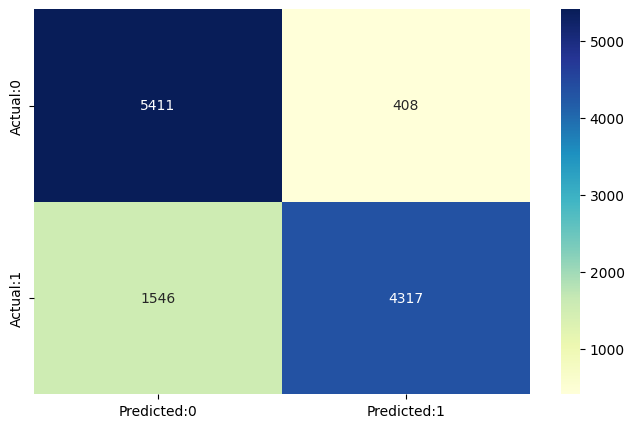

In [ ]:
# Visualizing evaluation Metric Score chart

#Recall Score for train and test
train_recall_LR = recall_score(y_train, y_train_pred)
test_recall_LR = recall_score(y_test, y_test_pred)
print(f"recall for train data is {round(train_recall_LR,3)}")
print(f"recall for test data is {round(test_recall_LR,3)}")

#Printing the precision of the model
train_precision_LR = round(precision_score(y_train_pred,y_train), 3)
test_precision_LR = round(precision_score(y_test_pred,y_test), 3)
print(f"precision for train data is {round(train_precision_LR,3)}")
print(f"precision for test data is {round(test_precision_LR,3)}")


#Printing the accuracy of the model
train_accuracy_LR = accuracy_score(y_train,y_train_pred)
test_accuracy_LR = accuracy_score(y_test,y_test_pred)
print(f"accuracy for train data is {round(train_accuracy_LR,3)}")
print(f"accuracu for test data is {round(test_accuracy_LR,3)}")




#f1 score for logistic regression
f1_LR = f1_score(y_test, y_test_pred)
print(f'The f1 score is {round(f1_LR,3)}')


# ROC curve and AUC
probs_LR= LR.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs_LR = probs_LR[:, 1]
# calculate AUC
auc_LR = roc_auc_score(y_test, probs_LR)
print(f"The AUC score is {auc_LR}.")


#Displaying the Classification Report
print()
print("classification_report")
print(classification_report(y_test,y_test_pred))




#Plotting the Confusion Matrix
cm=confusion_matrix(y_test,y_test_pred)
conf_matrix_LR=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix_LR, annot=True,fmt='d',cmap="YlGnBu")

print()
print(cm)


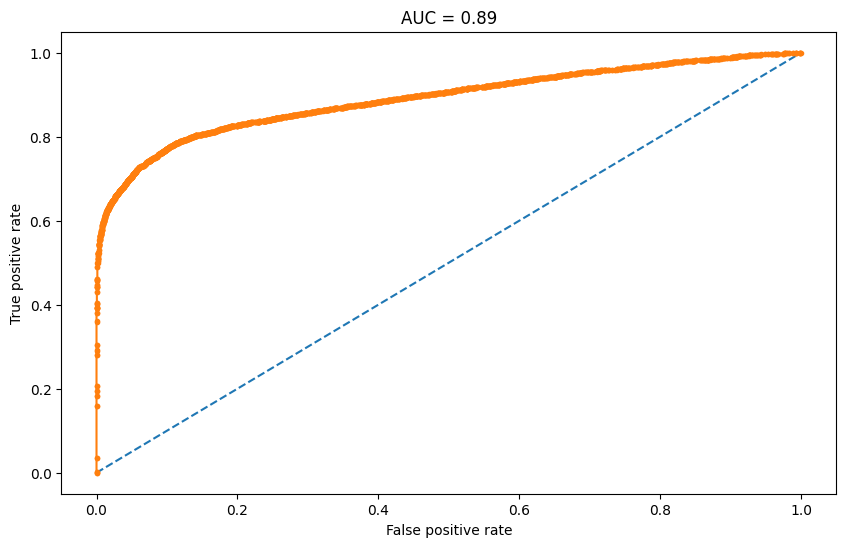

KS statistic: 0.6730616886456252


In [ ]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs_LR)
# plot curve

plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(auc_LR,3)}")
plt.show()

#KS (Kolmogorov-Smirnov) Statistic:
from sklearn import metrics
def ks_statistic(y_true, y_score):
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score)
    return max(tpr - fpr)

ks_LR = ks_statistic(y_test, LR.predict_proba(x_test)[:, 1])

print("KS statistic:", ks_LR)


In [ ]:
Logistic_regession_metrics = {'Recall_train':train_recall_LR,'Recall':test_recall_LR,'Precision_train' : train_precision_LR,'Precision' : test_precision_LR,'Accuracy_train' : train_accuracy_LR,'Accuracy' : test_accuracy_LR,'F1_score' : f1_LR,'ROC_AUC_score' : auc_LR,'KS_statistic':ks_LR }
metric = pd.DataFrame.from_dict(Logistic_regession_metrics, orient='index').reset_index()
metric = metric.rename(columns={'index':'Metric',0:'Logistic_Regession'})
metric

Metric  Logistic_Regession
0     Recall_train            0.739843
1           Recall            0.736312
2  Precision_train            0.740000
3        Precision            0.736000
4   Accuracy_train            0.834731
5         Accuracy            0.832734
6         F1_score            0.815451
7    ROC_AUC_score            0.890300
8     KS_statistic            0.673062

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Define the hyperparameters to tune
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'class_weight':['balanced',None]
}


# Create a new instance of the Logistic Regression model
#LR_tuned = LogisticRegression()

# Fit the Algorithm

gs_LR= GridSearchCV(estimator=LR, param_grid=param_grid, scoring='recall', cv=5)
gs_LR.fit(x_train, y_train)


# Predict on the model
y_train_pred_gs_LR = gs_LR.predict(x_train)
y_test_pred_gs_LR = gs_LR.predict(x_test)



# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters:")
print(gs_LR.best_params_)
print("Best Score: ", gs_LR.best_score_)


Best Hyperparameters:
{'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2'}
Best Score:  0.7545849593993552


recall for train data is 0.754
recall for test data is 0.749
precision for train data is 0.754
precision for test data is 0.749
accuracy for train data is 0.833
accuracu for test data is 0.83
The f1 score is 0.815
The AUC score is 0.8903001943588081.

classification_report
              precision    recall  f1-score   support

           0       0.78      0.91      0.84      5819
           1       0.89      0.75      0.82      5863

    accuracy                           0.83     11682
   macro avg       0.84      0.83      0.83     11682
weighted avg       0.84      0.83      0.83     11682


[[5302  517]
 [1472 4391]]


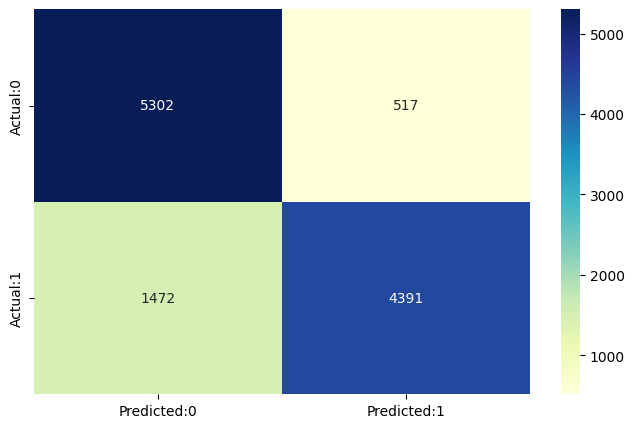

In [ ]:
# Visualizing evaluation Metric Score chart

#Recall Score for train and test
train_recall_gs_LR = recall_score(y_train, y_train_pred_gs_LR)
test_recall_gs_LR = recall_score(y_test, y_test_pred_gs_LR)
print(f"recall for train data is {round(train_recall_gs_LR,3)}")
print(f"recall for test data is {round(test_recall_gs_LR,3)}")

#Printing the precision of the model
train_precision_gs_LR = round(precision_score(y_train_pred_gs_LR,y_train), 3)
test_precision_gs_LR = round(precision_score(y_test_pred_gs_LR,y_test), 3)
print(f"precision for train data is {round(train_precision_gs_LR,3)}")
print(f"precision for test data is {round(test_precision_gs_LR,3)}")


#Printing the accuracy of the model
train_accuracy_gs_LR = accuracy_score(y_train,y_train_pred_gs_LR)
test_accuracy_gs_LR = accuracy_score(y_test,y_test_pred_gs_LR)
print(f"accuracy for train data is {round(train_accuracy_gs_LR,3)}")
print(f"accuracu for test data is {round(test_accuracy_gs_LR,3)}")




#f1 score for logistic regression
f1_gs_LR = f1_score(y_test, y_test_pred_gs_LR)
print(f'The f1 score is {round(f1_gs_LR,3)}')


# ROC curve and AUC
probs_LR_gs= LR.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs_LR_gs = probs_LR_gs[:, 1]
# calculate AUC
auc_gs_LR = roc_auc_score(y_test, probs_LR_gs)
print(f"The AUC score is {auc_gs_LR}.")


#Displaying the Classification Report
print()
print("classification_report")
print(classification_report(y_test,y_test_pred_gs_LR))




#Plotting the Confusion Matrix
cm=confusion_matrix(y_test,y_test_pred_gs_LR)
conf_matrix_gs_LR=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix_gs_LR, annot=True,fmt='d',cmap="YlGnBu")

print()
print(cm)


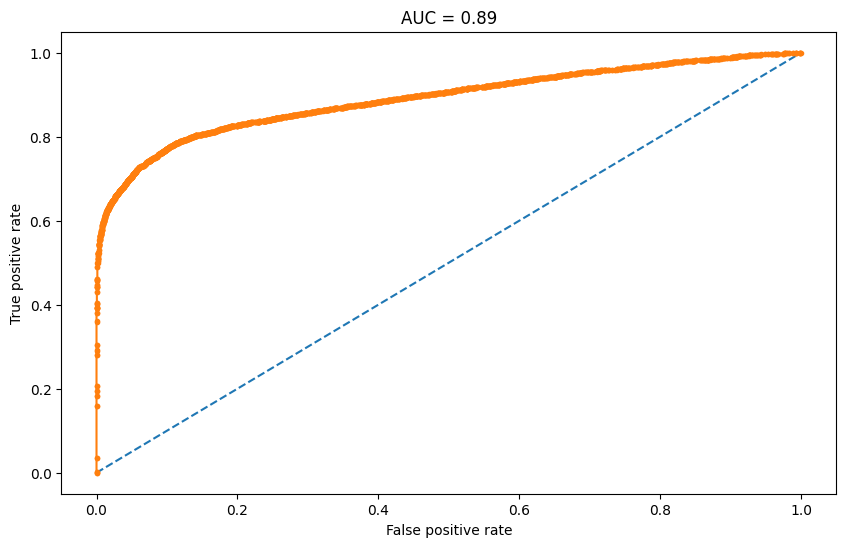

KS statistic: 0.6671010763407831


In [ ]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs_LR_gs)
# plot curve

plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(auc_gs_LR,3)}")
plt.show()

#KS (Kolmogorov-Smirnov) Statistic:
from sklearn import metrics
def ks_statistic_gs_LR(y_true, y_score):
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score)
    return max(tpr - fpr)

ks_gs_LR = ks_statistic_gs_LR(y_test, gs_LR.predict_proba(x_test)[:, 1])

print("KS statistic:", ks_gs_LR)


In [ ]:
metric['LR_Tuned'] = [train_recall_gs_LR,test_recall_gs_LR, train_precision_gs_LR,test_precision_gs_LR, train_accuracy_gs_LR,test_accuracy_gs_LR, f1_gs_LR, auc_gs_LR,ks_gs_LR]
metric

Metric  Logistic_Regession  LR_Tuned
0     Recall_train            0.739843  0.753785
1           Recall            0.736312  0.748934
2  Precision_train            0.740000  0.754000
3        Precision            0.736000  0.749000
4   Accuracy_train            0.834731  0.832877
5         Accuracy            0.832734  0.829738
6         F1_score            0.815451  0.815337
7    ROC_AUC_score            0.890300  0.890300
8     KS_statistic            0.673062  0.667101

### ML Model -2

#Support Vector Machine

A Support Vector Machine (SVM) is a type of machine learning model that is commonly used for classification and regression analysis.SVM aims to find the optimal hyperplane that best separates the two classes (defaulters and non-defaulters) in our feature space. By maximizing the margin between the classes, SVM effectively handles non-linear decision boundaries and works well with high-dimensional data. It is especially useful when dealing with imbalanced datasets, like ours, as it focuses on correctly classifying positive instances (defaulters). SVM's ability to generalize well to new data makes it a valuable model for predicting credit card defaulters with high accuracy and recall.

In [ ]:
# ML Model - 3 Implementation


#Defining svm object
svm = SVC(kernel='rbf',probability=True)

# Fit the Algorithm
svm.fit(x_train, y_train)

# Predict on the model
y_train_pred_svm = svm.predict(x_train)
y_test_pred_svm=svm.predict(x_test)

recall for train data is 0.78
recall for test data is 0.769
precision for train data is 0.78
precision for test data is 0.769
accuracy for train data is 0.85
accuracu for test data is 0.842
The f1 score is 0.831
The AUC score is 0.9011286141544882.

classification_report
              precision    recall  f1-score   support

           0       0.80      0.92      0.85      5819
           1       0.90      0.77      0.83      5863

    accuracy                           0.84     11682
   macro avg       0.85      0.84      0.84     11682
weighted avg       0.85      0.84      0.84     11682


[[5331  488]
 [1352 4511]]


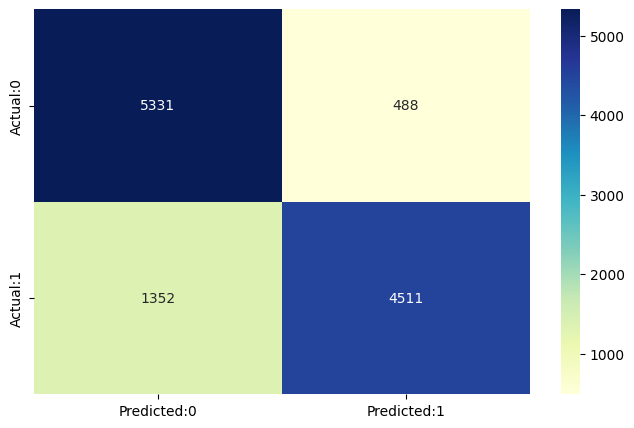

In [ ]:
# Visualizing evaluation Metric Score chart

#Recall Score for train and test
train_recall_svm = recall_score(y_train, y_train_pred_svm)
test_recall_svm = recall_score(y_test, y_test_pred_svm)
print(f"recall for train data is {round(train_recall_svm,3)}")
print(f"recall for test data is {round(test_recall_svm,3)}")

#Printing the precision of the model
train_precision_svm = round(precision_score(y_train_pred_svm,y_train), 3)
test_precision_svm= round(precision_score(y_test_pred_svm,y_test), 3)
print(f"precision for train data is {round(train_precision_svm,3)}")
print(f"precision for test data is {round(test_precision_svm,3)}")


#Printing the accuracy of the model
train_accuracy_svm = accuracy_score(y_train,y_train_pred_svm)
test_accuracy_svm= accuracy_score(y_test,y_test_pred_svm)
print(f"accuracy for train data is {round(train_accuracy_svm,3)}")
print(f"accuracu for test data is {round(test_accuracy_svm,3)}")




#f1 score for logistic regression
f1_svm = f1_score(y_test, y_test_pred_svm)
print(f'The f1 score is {round(f1_svm,3)}')


# ROC curve and AUC
probs_svm= svm.predict_proba(x_test)

# keep probabilities for the positive outcome only
probs_svm =probs_svm[:, 1]

# calculate AUC

auc_svm = roc_auc_score(y_test, probs_svm)
print(f"The AUC score is {auc_svm}.")


#Displaying the Classification Report
print()
print("classification_report")
print(classification_report(y_test,y_test_pred_svm))




#Plotting the Confusion Matrix
cm=confusion_matrix(y_test,y_test_pred_svm)
conf_matrix_svm=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix_svm, annot=True,fmt='d',cmap="YlGnBu")

print()
print(cm)


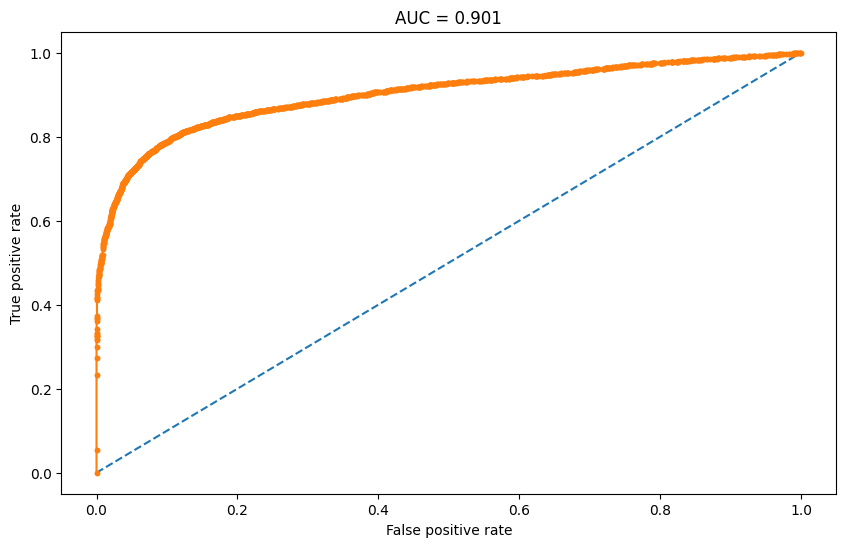

KS statistic: 0.689966587426129


In [ ]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs_svm)
# plot curve

plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(auc_svm,3)}")
plt.show()

#KS (Kolmogorov-Smirnov) Statistic:
from sklearn import metrics
def ks_statistic_svm(y_true, y_score):
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score)
    return max(tpr - fpr)

ks_svm = ks_statistic_svm(y_test, svm.predict_proba(x_test)[:, 1])

print("KS statistic:", ks_svm)


In [ ]:
metric['SVM'] = [train_recall_svm,test_recall_svm,train_precision_svm, test_precision_svm, train_accuracy_svm,test_accuracy_svm, f1_svm, auc_svm,ks_svm]
metric

Metric  Logistic_Regession  LR_Tuned  Random_forest  RF_Tuned  \
0     Recall_train            0.739843  0.753785       0.997372  0.854408   
1           Recall            0.736312  0.748934       0.828415  0.812894   
2  Precision_train            0.740000  0.754000       0.997000  0.854000   
3        Precision            0.736000  0.749000       0.828000  0.813000   
4   Accuracy_train            0.834731  0.832877       0.996918  0.891971   
5         Accuracy            0.832734  0.829738       0.867745  0.852594   
6         F1_score            0.815451  0.815337       0.862776  0.846988   
7    ROC_AUC_score            0.890300  0.890300       0.928998  0.922627   
8     KS_statistic            0.673062  0.667101       0.736743  0.708607   

        SVM  
0  0.779955  
1  0.769401  
2  0.780000  
3  0.769000  
4  0.850197  
5  0.842493  
6  0.830602  
7  0.901129  
8  0.689967

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
Cs = [ 0.1, 1, 10]
gammas = [0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
svm_clf = RandomizedSearchCV(svm, param_grid, cv=2,verbose=1,n_jobs=-1)

# Fit the Algorithm
svm_clf.fit(x_train,y_train)




Fitting 2 folds for each of 6 candidates, totalling 12 fits


RandomizedSearchCV(cv=2, estimator=SVC(probability=True), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10], 'gamma': [0.1, 1]},
                   verbose=1)

In [ ]:
#filename = '/content/drive/MyDrive/Colab Notebooks/capstone_project/capstone3_classification/SVM_Predictor.pkl'
#svm_clf = pickle.load(open(filename, 'rb'))

In [ ]:
print("Best Hyperparameters:")
print(svm_clf.best_params_)
print("Best Score:", svm_clf.best_score_)

Best Hyperparameters:
{'gamma': 0.1, 'C': 1}
Best Score: 0.8443759630200308


In [ ]:
# predictions
y_train_pred_svm_clf = svm_clf.predict(x_train)
y_test_pred_svm_clf = svm_clf.predict(x_test)

recall for train data is 0.796
recall for test data is 0.776
precision for train data is 0.796
precision for test data is 0.776
accuracy for train data is 0.861
accuracu for test data is 0.845
The f1 score is 0.834
The AUC score is 0.905590052899749.

classification_report
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      5819
           1       0.90      0.78      0.83      5863

    accuracy                           0.84     11682
   macro avg       0.85      0.84      0.84     11682
weighted avg       0.85      0.84      0.84     11682


[[5315  504]
 [1311 4552]]


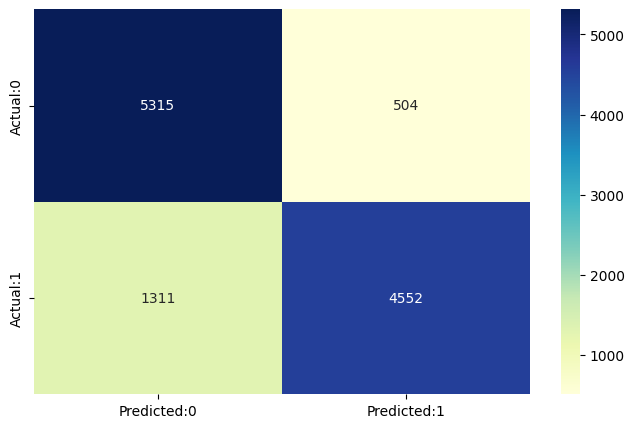

In [ ]:
# Visualizing evaluation Metric Score chart

#Recall Score for train and test
train_recall_svm_clf = recall_score(y_train, y_train_pred_svm_clf)
test_recall_svm_clf = recall_score(y_test, y_test_pred_svm_clf)
print(f"recall for train data is {round(train_recall_svm_clf,3)}")
print(f"recall for test data is {round(test_recall_svm_clf,3)}")

#Printing the precision of the model
train_precision_svm_clf = round(precision_score(y_train_pred_svm_clf,y_train), 3)
test_precision_svm_clf = round(precision_score(y_test_pred_svm_clf,y_test), 3)
print(f"precision for train data is {round(train_precision_svm_clf,3)}")
print(f"precision for test data is {round(test_precision_svm_clf,3)}")


#Printing the accuracy of the model
train_accuracy_svm_clf = accuracy_score(y_train,y_train_pred_svm_clf)
test_accuracy_svm_clf = accuracy_score(y_test,y_test_pred_svm_clf)
print(f"accuracy for train data is {round(train_accuracy_svm_clf,3)}")
print(f"accuracu for test data is {round(test_accuracy_svm_clf,3)}")




#f1 score for logistic regression
f1_svm_clf = f1_score(y_test, y_test_pred_svm_clf)
print(f'The f1 score is {round(f1_svm_clf,3)}')


# ROC curve and AUC
probs_svm_clf= svm_clf.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs_svm_clf = probs_svm_clf[:, 1]

# calculate AUC
auc_svm_clf = roc_auc_score(y_test, probs_svm_clf)
print(f"The AUC score is {auc_svm_clf}.")


#Displaying the Classification Report
print()
print("classification_report")
print(classification_report(y_test,y_test_pred_svm_clf))




#Plotting the Confusion Matrix
cm=confusion_matrix(y_test,y_test_pred_svm_clf)
conf_matrix_svm_clf=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix_svm_clf, annot=True,fmt='d',cmap="YlGnBu")

print()
print(cm)


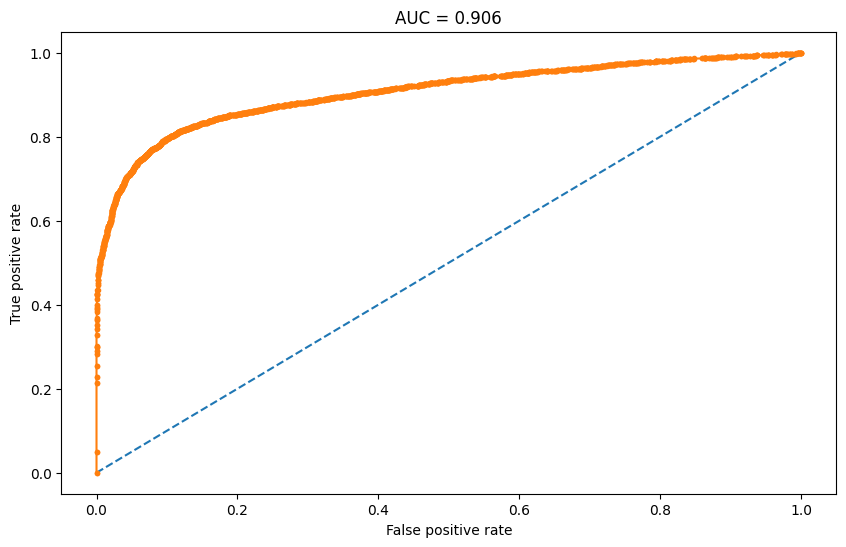

KS statistic: 0.6956673277388847


In [ ]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs_svm_clf)
# plot curve

plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(auc_svm_clf,3)}")
plt.show()

#KS (Kolmogorov-Smirnov) Statistic:
from sklearn import metrics
def ks_statistic_svm_clf(y_true, y_score):
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score)
    return max(tpr - fpr)

ks_svm_clf = ks_statistic_svm_clf(y_test, svm_clf.predict_proba(x_test)[:, 1])

print("KS statistic:", ks_svm_clf)


In [ ]:
#import pickle
#filename = '/content/drive/MyDrive/Colab Notebooks/capstone_project/capstone3_classification/SVM_Predictor.pkl'
#pickle.dump(svm_clf, open(filename, 'wb'))

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
# commenting the code for executing the entire notebook in one go.

#import pickle

#filename = '/content/drive/MyDrive/Colab Notebooks/capstone_project/capstone3_classification/Randomforest_bestmodel.pkl'
#pickle.dump(rs_rf, open(filename, 'wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.


#filename = '/content/drive/MyDrive/Colab Notebooks/capstone_project/capstone3_classification/Randomforest_bestmodel.pkl'
#rs_rf = pickle.load(open(filename, 'rb'))

# **Conclusion**